In [1]:
import csep
from csep.core import poisson_evaluations as poisson
from csep.utils import datasets, time_utils, plots, stats
from csep.core import regions, catalog_evaluations
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime
import pandas as pd
#import seaborn as sns

start_date = time_utils.strptime_to_utc_datetime('2011-01-01 00:00:00.0')
end_date = time_utils.strptime_to_utc_datetime('2012-01-01 00:00:00.0')

min_mw = 4.0
max_mw = 8.95
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = regions.magnitude_bins(min_mw, max_mw, dmw)

region = regions.italy_csep_region()

# Bind region information to the forecast (this will be used for binning of the catalogs)
space_magnitude_region = regions.create_space_magnitude_region(region, magnitudes)

forecast = csep.load_catalog_forecast("../forecasts/Originals_Feb22/SRMaIFD_b_decvar.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)
                                    
#italy_test_catalog = csep.load_catalog("C:\\Users\\kirst\\Documents\\pycsep_workshop_rise21-main\\workshop_data\\catalogs\\europe_rcmt_2010-2015.csv", type="ingv_emrcmt")
italy_test_catalog = csep.load_catalog("../testing/europe_rcmt_2010-2015.csv", type="ingv_emrcmt")


Removed 1 badly formatted events
Removed 0 repeated events


In [2]:
start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch('2012-01-01 00:00:00.0')
end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch('2013-01-01 00:00:00.0')

filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
italy_cat_2012 = italy_test_catalog
italy_cat_2012 = italy_cat_2012.filter(filters)
italy_cat_2012 = italy_cat_2012.filter_spatial(forecast.region)
italy_cat_2012.filter(f'magnitude >= {min_mw}')
italy_cat_2012.get_magnitudes()

array([ 4.1,  5. ,  5. ,  4.4,  4.5,  4.3,  4. ,  4.5,  4.3,  6.1,  5.1,
        5.2,  4.5,  4.1,  4.1,  4.5,  6. ,  4.7,  5.5,  4.9,  4.2,  4.2,
        4.2,  4.6,  4.3,  4.1,  4.2,  4.6,  4.5,  4. ,  4.5,  4.8,  5.3,
        4.4,  4.1,  4.2])

<GeoAxesSubplot:>

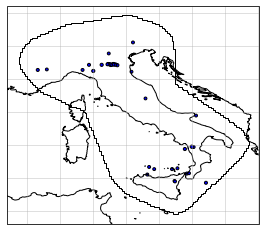

In [3]:
fig, ax1 = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
#italy_cat_2012.plot(extent=None, ax=axs[0,0])

csep.utils.plots.plot_catalog(italy_cat_2012, ax=ax1)

In [4]:
#### - Use FMD Mmax= 8
SRMaIFD_bdecvar = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/SRMAIFD_6010_1yr_mm8_m4.txt",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

histInv_bdecvar = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/histInv_6010_1yr_mm8_m4.txt",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

SRIFD_bdecvar = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/SRInv_6010_1yr_mm8_m4.txt",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

srhistma_bdecvar = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/SRhistMA_6010_1yr_mm8_m4.txt",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)


In [5]:
### MMax = 6.9 (Better for Italy according to Mark's magnitude code)
### Added DEM

srhistDEM_MM6 = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/SRhistDEM_6010_1yr_v2.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

InvDEMMa_MM6 = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/IvDMMa_6010_1yr.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

## Compare with SRIFD_bdecvar
SRIFD_MM6 = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/SRInv_6010_1yr_fixed.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

## Compare with histInv_bdecvar
histInv_MM6 = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/histInv_6010_1yr.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

## Compare with SRhistMa_bdecvar
SRhistMa_MM6 = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/SRhistMA_m69.txt",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

SRMaInv_MM6 = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/SRMAIFD_6010_1yr.dat", start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)


In [7]:
def alphabet_tests_catalog(forecast_list, catalog):
    LTests = []
    MTests = []
    NTests = []
    STests = []
    
    for i in range(len(forecast_list)):

        Lresult = catalog_evaluations.pseudolikelihood_test(forecast_list[i], catalog, verbose=False)
        LTests.append(Lresult)
        Sresult = catalog_evaluations.spatial_test(forecast_list[i], catalog, verbose=False)
        STests.append(Sresult)
        Mresult = catalog_evaluations.magnitude_test(forecast_list[i], catalog, verbose=False)
        MTests.append(Mresult)
        Nresult = catalog_evaluations.number_test(forecast_list[i], catalog, verbose=False)
        NTests.append(Nresult)
    
    return LTests, MTests, NTests, STests

## Make a list of forecasts
forecast_cats = [SRMaInv_MM6, histInv_MM6, SRIFD_MM6, SRhistMa_MM6, srhistDEM_MM6, InvDEMMa_MM6, SRMaIFD_bdecvar, histInv_bdecvar, SRIFD_bdecvar, srhistma_bdecvar]

## Then run all the tests
LTestCat, MTestCat, NTestCat, STestCat = alphabet_tests_catalog(forecast_cats, italy_cat_2012)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


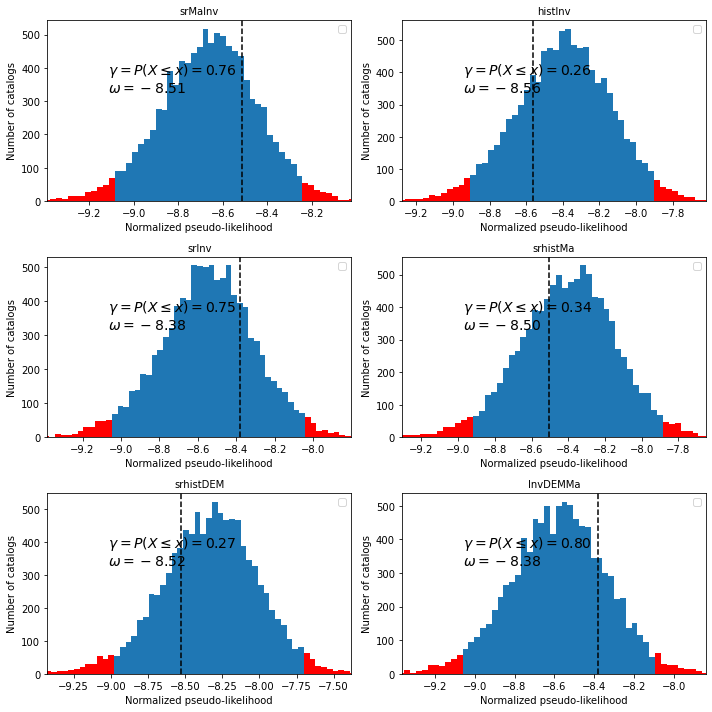

In [8]:
import csep.utils.plots as csep_plots

fig, axs = plt.subplots(3,2, figsize=(10,10))

csep_plots.plot_spatial_test(STestCat[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_spatial_test(STestCat[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False)
csep_plots.plot_spatial_test(STestCat[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_spatial_test(STestCat[3],  plot_args={"title": "srhistMa"}, axes=axs[1,1], show=False)
csep_plots.plot_spatial_test(STestCat[4],  plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_spatial_test(STestCat[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)

#plt.show()
plt.savefig("Spatial_results_2012.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


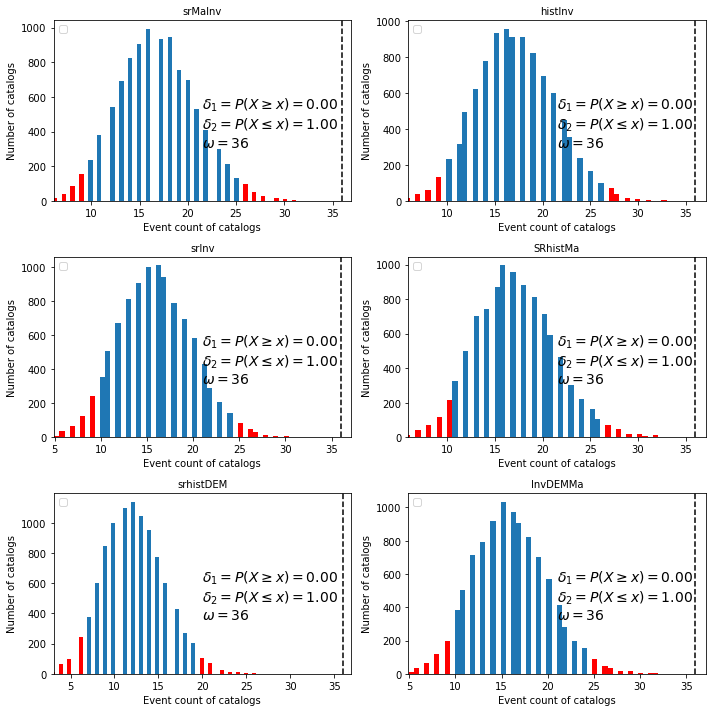

In [9]:
fig, axs = plt.subplots(3,2, figsize=(10,10))

csep_plots.plot_number_test(NTestCat[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_number_test(NTestCat[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False)
csep_plots.plot_number_test(NTestCat[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_number_test(NTestCat[3],  plot_args={"title": "SRhistMa"}, axes=axs[1,1], show=False)
csep_plots.plot_number_test(NTestCat[4],  plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_number_test(NTestCat[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


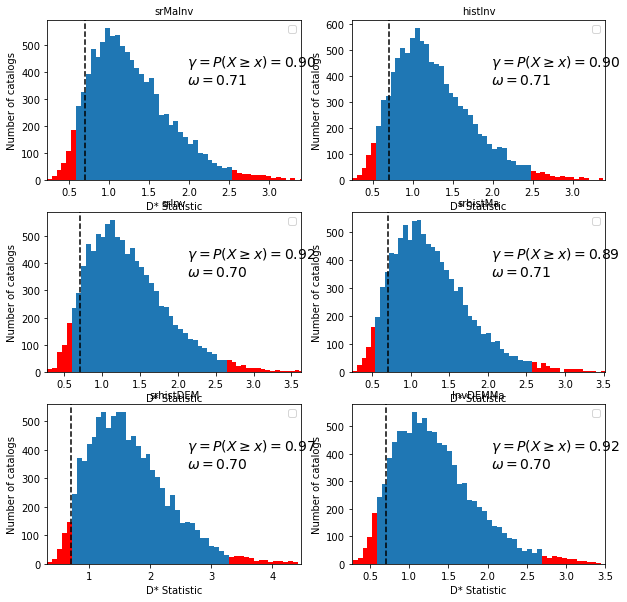

In [10]:
fig, axs = plt.subplots(3,2, figsize=(10,10))

csep_plots.plot_magnitude_test(MTestCat[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[1], plot_args={"title": "histInv" }, axes=axs[0,1], show=False)
csep_plots.plot_magnitude_test(MTestCat[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[3],  plot_args={"title": "srhistMa"}, axes=axs[1,1], show=False)
csep_plots.plot_magnitude_test(MTestCat[4],  plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)

plt.show()


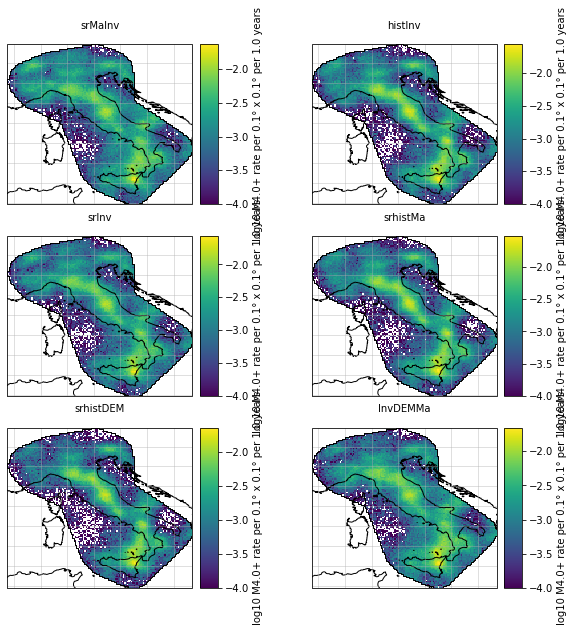

In [11]:
import cartopy
# Still need cartopy equivalent of plt.tight_layout()

fig, axs = plt.subplots(ncols=2, nrows=3, subplot_kw={'projection': ccrs.PlateCarree()},  figsize=(10,10))

SRMaIFD_bdecvar.expected_rates.plot(plot_args={"title": "srMaInv" }, ax=axs[0,0])

srhistma_bdecvar.expected_rates.plot(plot_args={"title": "srhistMa" }, ax=axs[1,1])

SRIFD_bdecvar.expected_rates.plot(plot_args={"title": "srInv" }, ax=axs[1,0])

histInv_bdecvar.expected_rates.plot(plot_args={"title": "histInv" }, ax=axs[0,1])

srhistDEM_MM6.expected_rates.plot(plot_args = {"title":"srhistDEM"}, ax=axs[2,0])

InvDEMMa_MM6.expected_rates.plot(plot_args = {"title":"InvDEMMa"}, ax = axs[2,1])

plt.savefig("Forecast_plots.pdf")

<GeoAxesSubplot:>

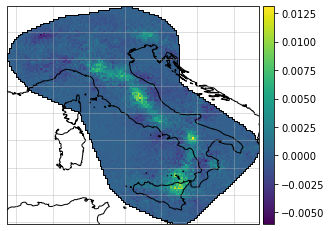

In [12]:
##ToDo
## Plot that compares these forecasts - think I can use expected rates for this, possibly...
import cartopy.crs as ccrs

srhistma_er = srhistma_bdecvar.spatial_counts(cartesian=True)
srmaInv_er = SRMaIFD_bdecvar.spatial_counts(cartesian=True)
rate_diff = srhistma_er - srmaInv_er

plots.plot_spatial_dataset(rate_diff, region = srhistma_bdecvar.region)
#forecast_mids_df = pd.DataFrame(histInv_bdecvar.region.midpoints())
#forecast_mids_df['rate_diff'] = srhistma_er - srmaInv_er

#csep.utils.plots.plot_spatial_dataset(rate_diff, histInv_bdecvar.region)
#Diff_test = csep.core.forecasts.GriddedForecast(histInv_bdecvar.start_time, histInv_bdecvar.end_time, data=rate_diff, region=histInv_bdecvar.region,
#                                                  magnitudes=histInv_bdecvar.magnitudes, name="rate_diff")
#ax= Diff_test.plot()
#plt.show()

#vars(Diff_test)

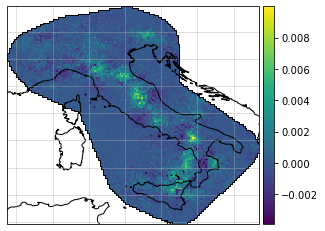

In [13]:
def plot_forecast_diffs(forecast1, forecast2):
    rate_diff = forecast1.spatial_counts(cartesian=True) - forecast2.spatial_counts(cartesian=True)
    plots.plot_spatial_dataset(rate_diff, region = forecast1.region)
    
plot_forecast_diffs(histInv_bdecvar, SRIFD_bdecvar)
plt.savefig("histInv_SRInv_diff.pdf")

In [14]:
def pw_forecast(forecast_list, names_list, size,  savename):
    n = len(forecast_list)
    
    cols = ['forecast {}'.format(forecast_name) for forecast_name in [names_list]]
    rows = ['forecast {}'.format(forecast_name) for forecast_name in [names_list]]

    
    fig, axs = plt.subplots(n, n, figsize=size, subplot_kw={'projection': ccrs.PlateCarree()})
    for i in range(n):
        for j in range(n):
            if i > j:
                rate_diff = forecast_list[i].spatial_counts(cartesian=True) - forecast_list[j].spatial_counts(cartesian=True)
                plots.plot_spatial_dataset(rate_diff, region = forecast_list[0].region, ax= axs[i, j])
                
    #fig.tight_layout()
    plt.savefig(savename)
    plt.show()


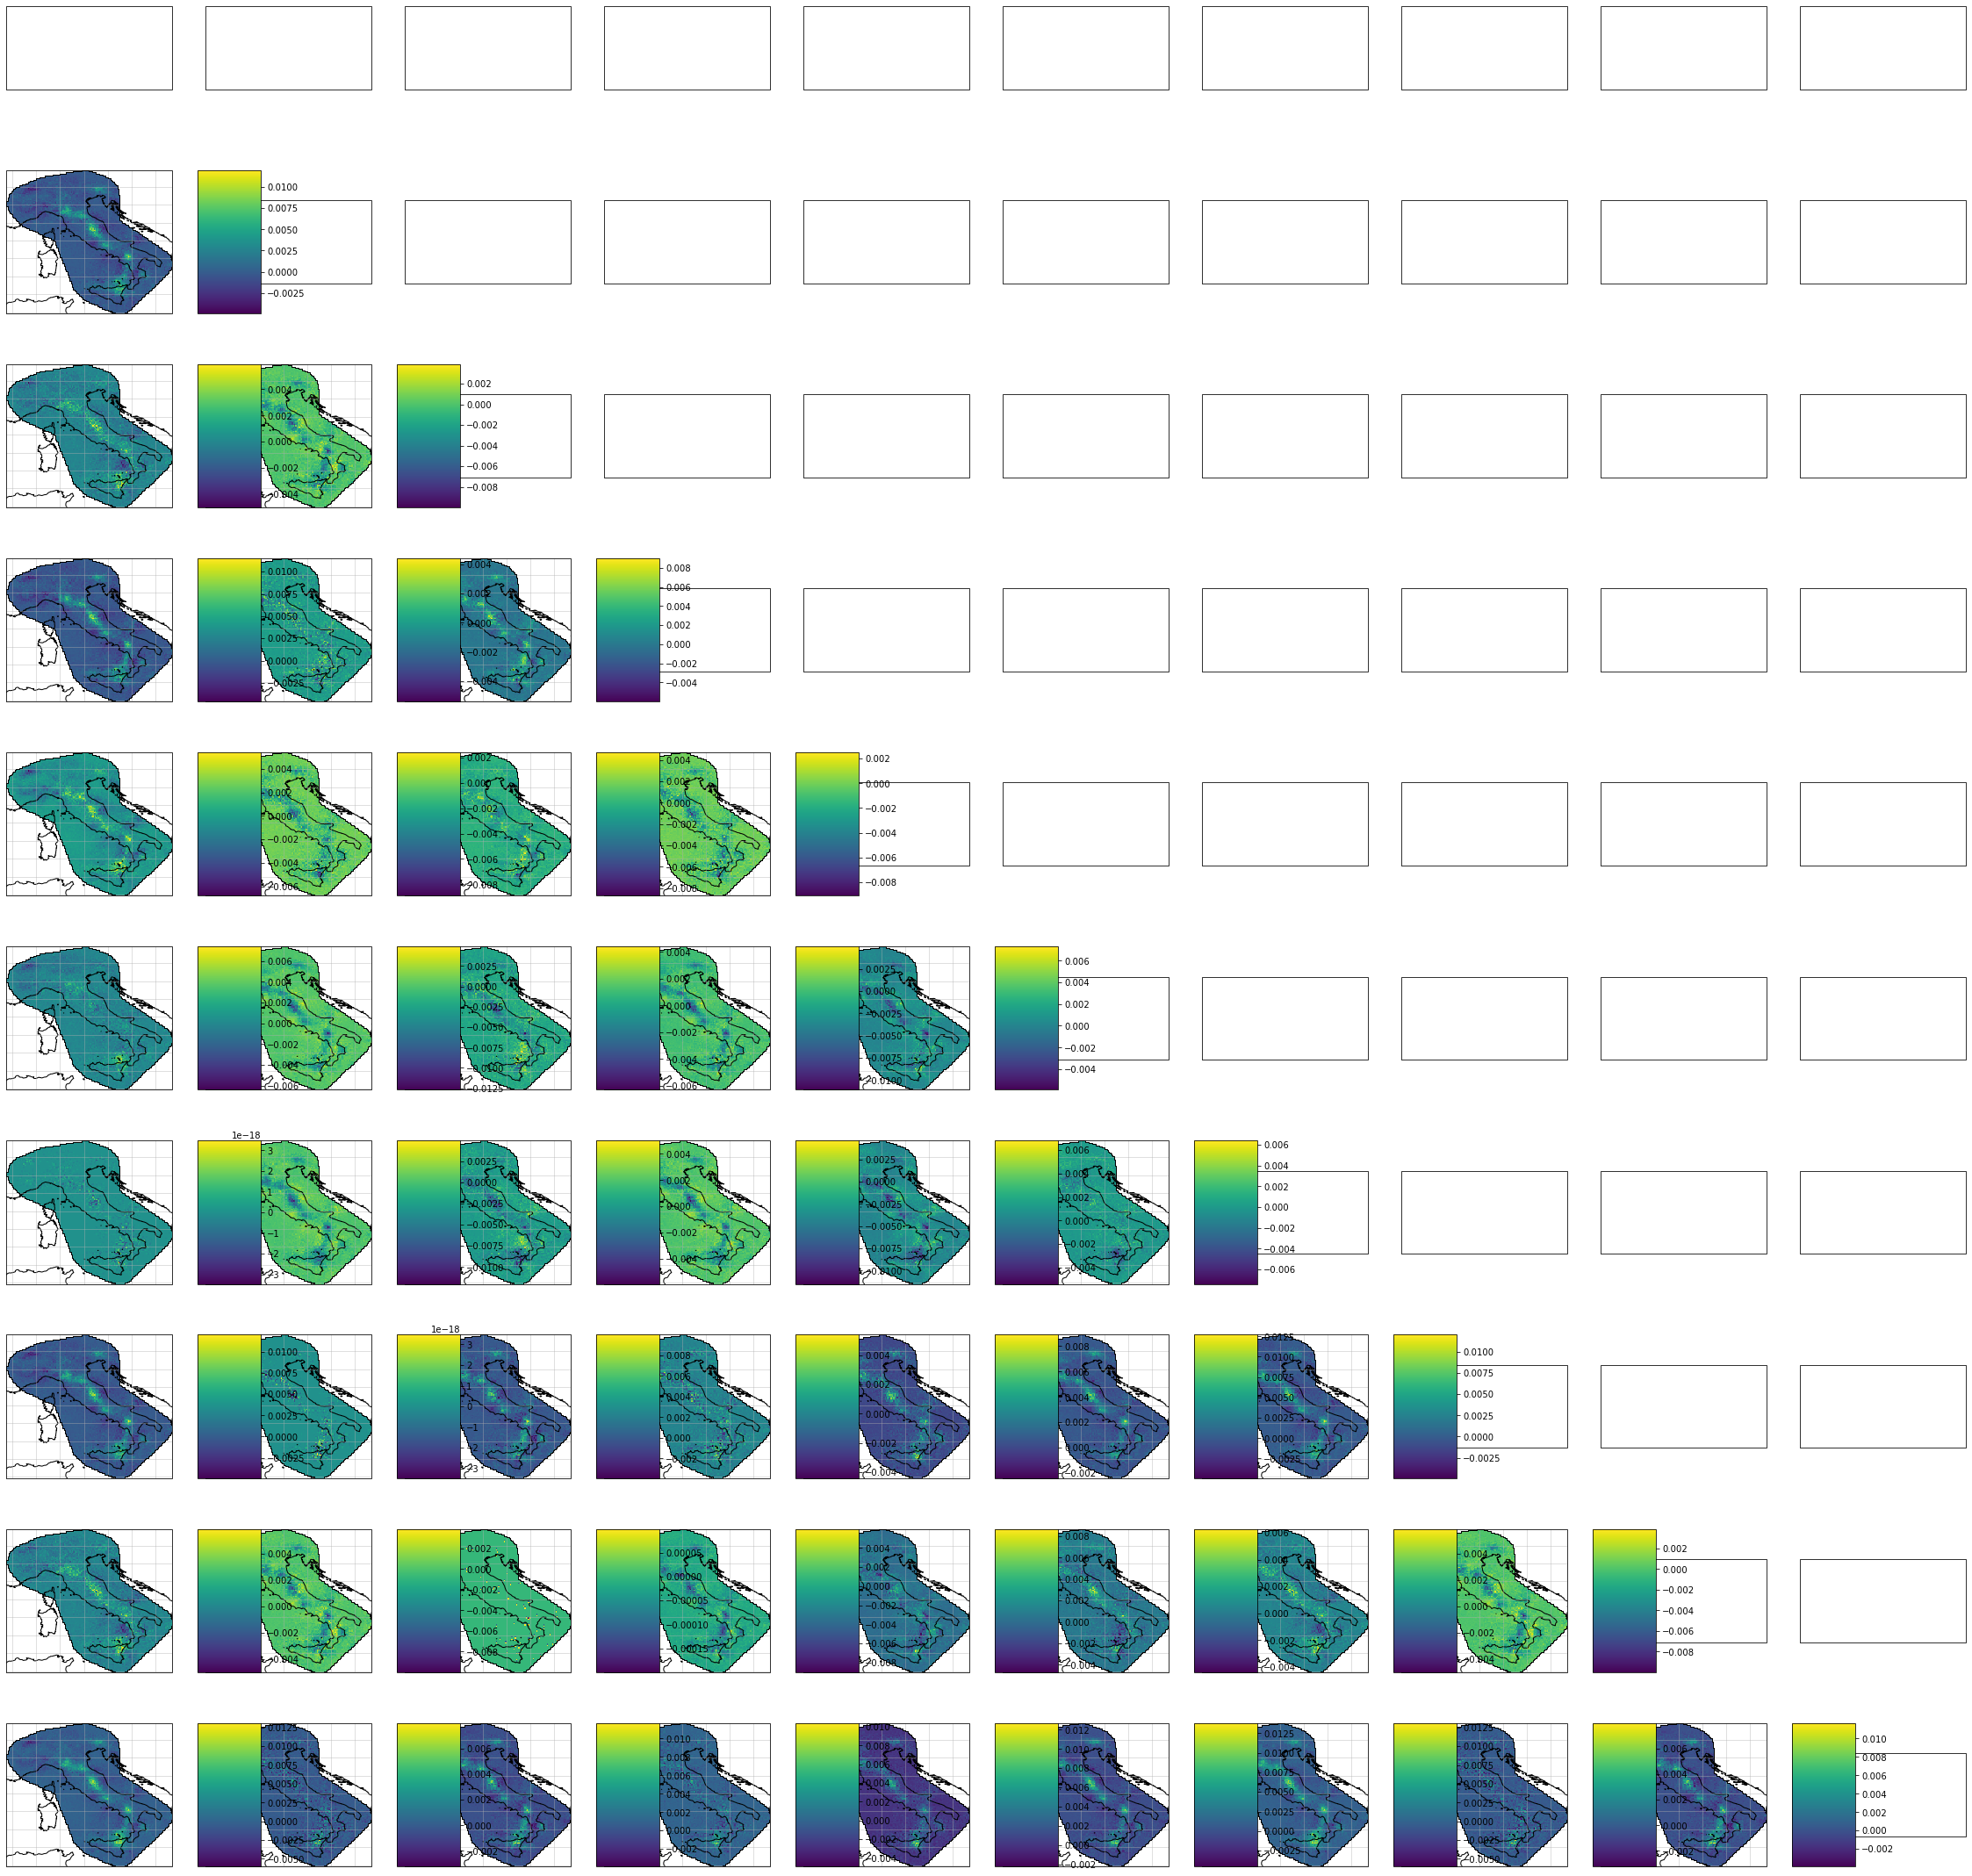

In [15]:
names_list = ["srMaInv", "srhistMa", "srInv", "histInv", "srhistDEM", "InvDEMMa", "srhistMaM6", "srInvM6", "histInvM6"]
pw_forecast(forecast_cats, names_list, (40, 40),  'Mod_comp.pdf')
#plt.savefig('Mod_comp.pdf')

Actual rate differences in forecasts are very small! Lack of labels makes further interpretation difficult!!

In [16]:
spatial_rates_df = pd.DataFrame(data = {"srhistma":srhistma_bdecvar.spatial_counts(), "histInv":histInv_bdecvar.spatial_counts(), "srInv": SRIFD_bdecvar.spatial_counts(), "srmaInv":SRMaIFD_bdecvar.spatial_counts()})
spatial_rates_df

srhistma  histInv   srInv  srmaInv
0       0.0001   0.0001  0.0002   0.0000
1       0.0000   0.0001  0.0000   0.0003
2       0.0002   0.0001  0.0002   0.0000
3       0.0000   0.0000  0.0001   0.0002
4       0.0000   0.0004  0.0001   0.0001
...        ...      ...     ...      ...
8988    0.0026   0.0027  0.0018   0.0016
8989    0.0024   0.0020  0.0018   0.0018
8990    0.0012   0.0031  0.0021   0.0026
8991    0.0024   0.0029  0.0028   0.0018
8992    0.0024   0.0033  0.0026   0.0018

[8993 rows x 4 columns]

In [17]:
sp_test = spatial_rates_df.multiply(10000)
b = sp_test.astype(int)

<AxesSubplot:ylabel='Count'>

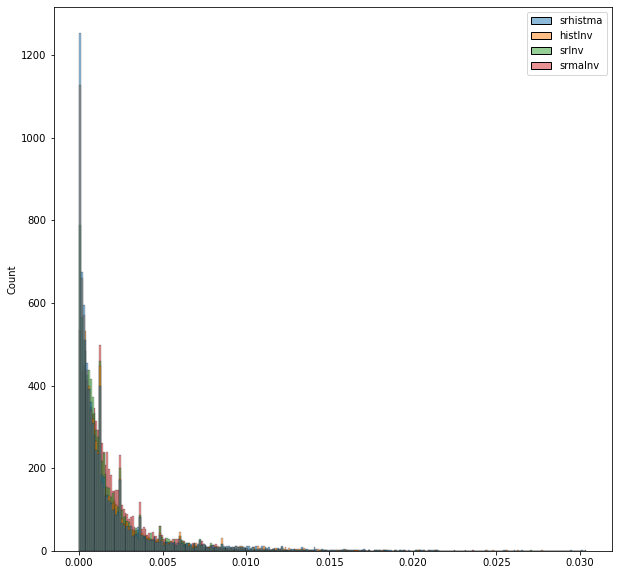

In [18]:
import seaborn as sns
spatial_rates_df = pd.DataFrame(data = {"srhistma":srhistma_bdecvar.spatial_counts(), "histInv":histInv_bdecvar.spatial_counts(), "srInv": SRIFD_bdecvar.spatial_counts(), "srmaInv":SRMaIFD_bdecvar.spatial_counts()})

fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data=spatial_rates_df)


## FMD stuff

UPDATE: August 2022 - Magnitude test is faulty! So this is not good.

We have three versions of the srhistma forecast with different b-value distro: The first uses b-values from a Gardner and Knopoff declustering algorithm and the second uses the full horus catalog, while the third uses a fixed b-value = 1. The b-value distribution is the only difference between these catalogs, so their spatial, number and pseudo-likelihood performance is the same (or very close, because we only have 10,000 catalogs, so there's still some uncertainty here).

Running M-tests
Running M-tests
Running M-tests
Running M-tests


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


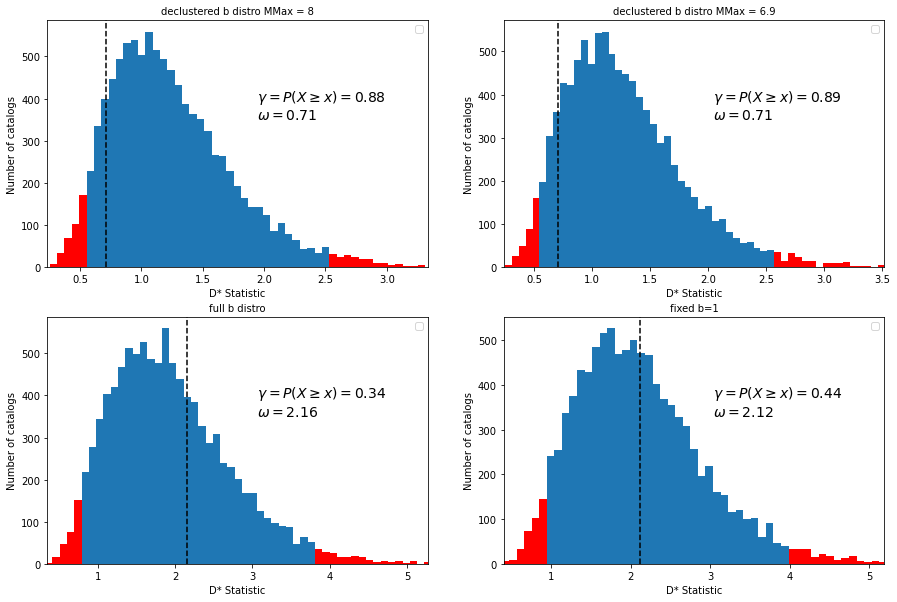

In [19]:
srhistma_bvar = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/SRhistMa_bvar.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

srhistma_bfix = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/SRhistMa_b_fixed1.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)


forecast_list2 = [srhistma_bdecvar, srhistma_bvar, srhistma_bfix, SRhistMa_MM6]
Magtests = []

for i in range(len(forecast_list2)):
        print("Running M-tests")
        result = catalog_evaluations.magnitude_test(forecast_list2[i],  italy_cat_2012, verbose=False)
        Magtests.append(result)
        
fig, axs = plt.subplots(2,2, figsize=(15,10))

csep_plots.plot_magnitude_test(Magtests[0], plot_args={"title": "declustered b distro MMax = 8" }, axes=axs[0,0], show=False)
csep_plots.plot_magnitude_test(Magtests[1], plot_args={"title": "full b distro"}, axes=axs[1,0], show=False)
csep_plots.plot_magnitude_test(Magtests[2], plot_args={"title": "fixed b=1"}, axes=axs[1,1], show=False)
csep_plots.plot_magnitude_test(Magtests[3], plot_args={"title": "declustered b distro MMax = 6.9"}, axes=axs[0,1], show=False)
#plt.show()

plt.savefig("Magnitude_comps_2012.pdf")

All three models perform similarly - it seems likely that over a 1 year testing period, the choice of b-value (or even b-value distribiution) is actually not very important, but this is likely to be more important over longer timescales.
Is it worth testing this with some synthetic data?
How much is the magnitude test affected by the raw number of events? Check Bill's paper again

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


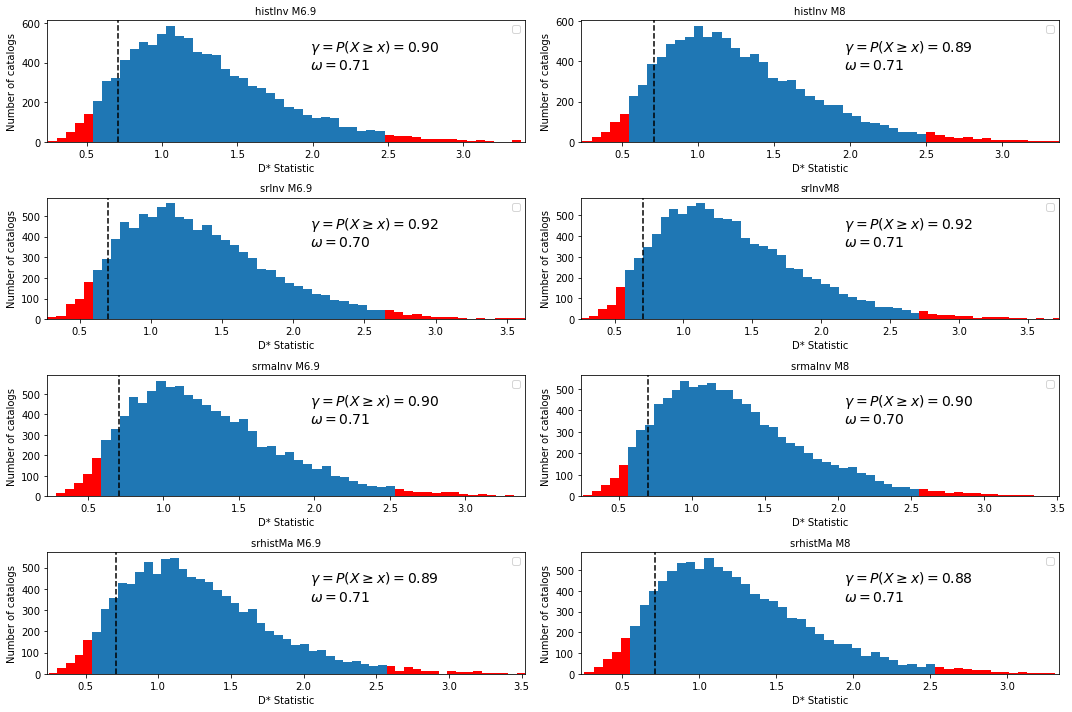

In [20]:
fig, axs = plt.subplots(4,2, figsize=(15,10))

csep_plots.plot_magnitude_test(MTestCat[1], plot_args={"title": "histInv M6.9" }, axes=axs[0,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[7],  plot_args={"title": "histInv M8"}, axes=axs[0,1], show=False)


csep_plots.plot_magnitude_test(MTestCat[2], plot_args={"title": "srInv M6.9"}, axes=axs[1,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[8],  plot_args={"title": "srInvM8"}, axes=axs[1,1], show=False)

csep_plots.plot_magnitude_test(MTestCat[0],  plot_args={"title": "srmaInv M6.9"}, axes=axs[2,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[6], plot_args={"title": "srmaInv M8"}, axes=axs[2,1], show=False)

csep_plots.plot_magnitude_test(MTestCat[3],  plot_args={"title": "srhistMa M6.9"}, axes=axs[3,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[9], plot_args={"title": "srhistMa M8"}, axes=axs[3,1], show=False)

fig.tight_layout()

#plt.show()
plt.savefig("mag_comps_all_2012.pdf")

So now that the minimum magnitude on these is fixed so they all start at M4, the M8 mmax models don't have an advantage. Which is weird, because it suggests that the M8 models were benefitting from starting at M4.3 - did they have more events in M4.3-M5? Yes. See old mag-comps figures.

Removed 1 badly formatted events
Removed 0 repeated events
Running M-tests
Running M-tests
Running M-tests
Running M-tests


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


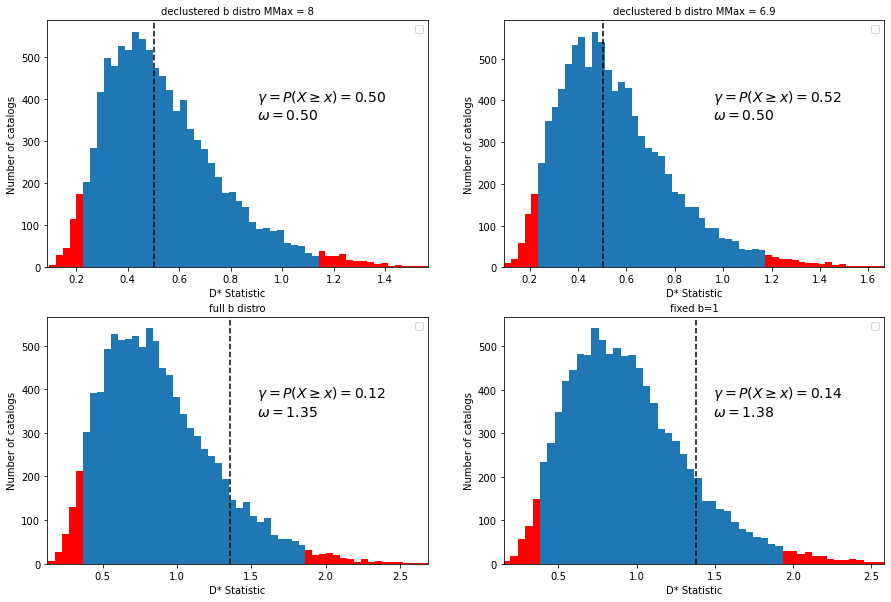

In [21]:
import copy

italy_10yr_catalog = csep.load_catalog("/home/kbayliss/Downloads/Italy_forecasts_Feb2022/EuroMedCentrMomTensors-1645023259641.csv", type="ingv_emrcmt")

start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch('2011-01-01 00:00:00.0')
end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch('2021-01-01 00:00:00.0')

filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
italy_cat_1121 = italy_10yr_catalog.filter(filters)
italy_cat_1121 = italy_cat_1121.filter_spatial(forecast.region)
italy_cat_1121.filter('magnitude >= 4')
italy_cat_1121.get_magnitudes()

cat_copy = copy.deepcopy(italy_cat_1121)
## Update time
start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch('2014-01-01 00:00:00.0')
end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch('2015-01-01 00:00:00.0')
## filter catalog
filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
test_cat = cat_copy.filter(filters)
cat_copy = cat_copy.filter_spatial(forecast.region)
cat_copy.filter('magnitude >= 4')

Magtests14 = []

for i in range(len(forecast_list2)):
        print("Running M-tests")
        result = catalog_evaluations.magnitude_test(forecast_list2[i],  cat_copy, verbose=False)
        Magtests14.append(result)
        
fig, axs = plt.subplots(2,2, figsize=(15,10))

csep_plots.plot_magnitude_test(Magtests14[0], plot_args={"title": "declustered b distro MMax = 8" }, axes=axs[0,0], show=False)
csep_plots.plot_magnitude_test(Magtests14[1], plot_args={"title": "full b distro"}, axes=axs[1,0], show=False)
csep_plots.plot_magnitude_test(Magtests14[2], plot_args={"title": "fixed b=1"}, axes=axs[1,1], show=False)
csep_plots.plot_magnitude_test(Magtests14[3], plot_args={"title": "declustered b distro MMax = 6.9"}, axes=axs[0,1], show=False)
#plt.show()

plt.savefig("Magnitude_comps_2014.pdf")
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


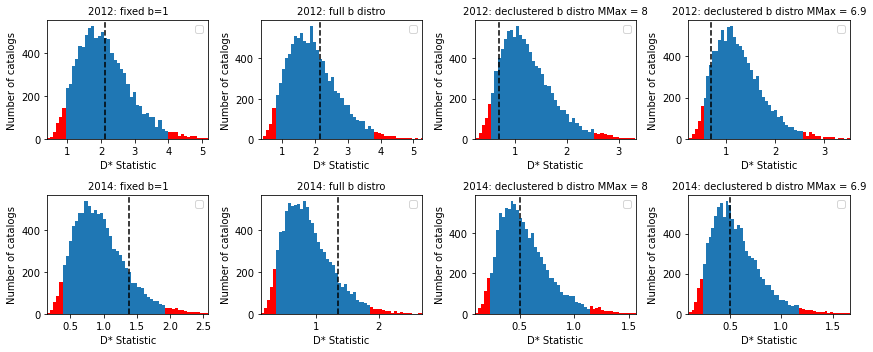

In [22]:
fig, axs = plt.subplots(2,4, figsize=(12,5))

csep_plots.plot_magnitude_test(Magtests[2], plot_args={"title": "2012: fixed b=1"}, axes=axs[0,0], show=False, label=False)
csep_plots.plot_magnitude_test(Magtests[1], plot_args={"title": "2012: full b distro"}, axes=axs[0,1], show=False, label=False)
csep_plots.plot_magnitude_test(Magtests[0], plot_args={"title": "2012: declustered b distro MMax = 8" }, axes=axs[0,2], show=False, label=False)
csep_plots.plot_magnitude_test(Magtests[3], plot_args={"title": "2012: declustered b distro MMax = 6.9"}, axes=axs[0,3], show=False, label=False)
#plt.show()

csep_plots.plot_magnitude_test(Magtests14[2], plot_args={"title": "2014: fixed b=1"}, axes=axs[1,0], show=False, label=False)
csep_plots.plot_magnitude_test(Magtests14[1], plot_args={"title": "2014: full b distro"}, axes=axs[1,1], show=False, label=False)
csep_plots.plot_magnitude_test(Magtests14[0], plot_args={"title": "2014: declustered b distro MMax = 8" }, axes=axs[1,2], show=False, label=False)
csep_plots.plot_magnitude_test(Magtests14[3], plot_args={"title": "2014: declustered b distro MMax = 6.9"}, axes=axs[1,3], show=False, label=False)

fig.tight_layout()
plt.savefig("Magnitude_comps_2012_2014.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


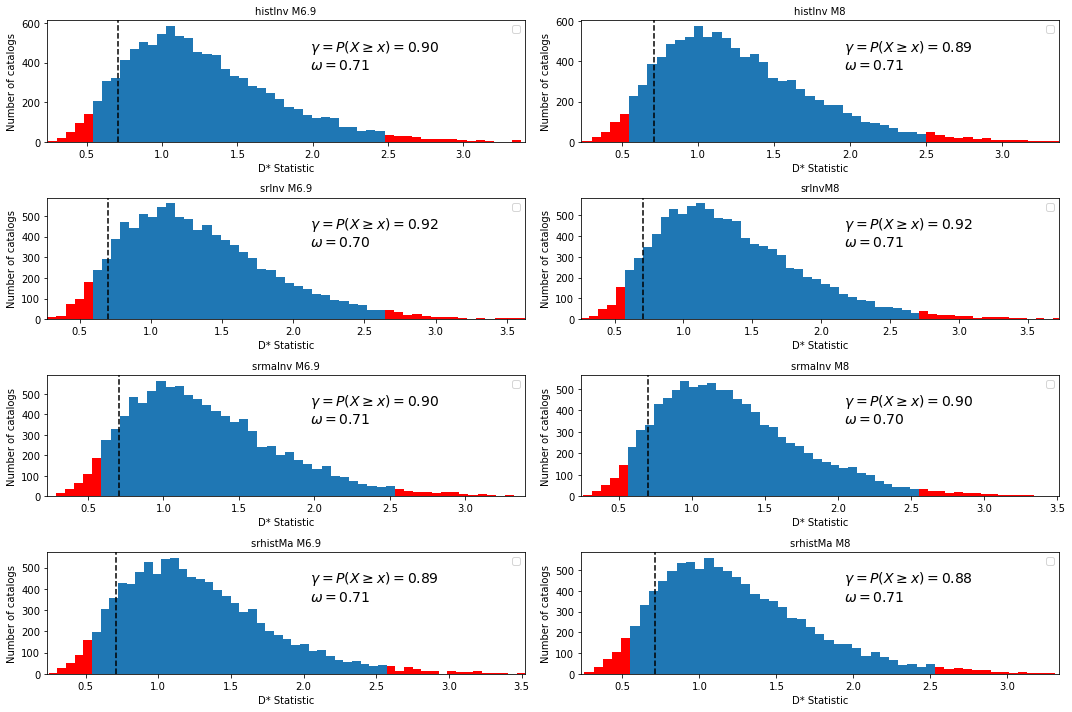

In [23]:
LTestCat14, MTestCat14, NTestCat14, STestCat14 = alphabet_tests_catalog(forecast_cats, cat_copy)

fig, axs = plt.subplots(4,2, figsize=(15,10))

csep_plots.plot_magnitude_test(MTestCat[1], plot_args={"title": "histInv M6.9" }, axes=axs[0,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[7],  plot_args={"title": "histInv M8"}, axes=axs[0,1], show=False)


csep_plots.plot_magnitude_test(MTestCat[2], plot_args={"title": "srInv M6.9"}, axes=axs[1,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[8],  plot_args={"title": "srInvM8"}, axes=axs[1,1], show=False)

csep_plots.plot_magnitude_test(MTestCat[0],  plot_args={"title": "srmaInv M6.9"}, axes=axs[2,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[6], plot_args={"title": "srmaInv M8"}, axes=axs[2,1], show=False)

csep_plots.plot_magnitude_test(MTestCat[3],  plot_args={"title": "srhistMa M6.9"}, axes=axs[3,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[9], plot_args={"title": "srhistMa M8"}, axes=axs[3,1], show=False)

fig.tight_layout()

#plt.show()
plt.savefig("mag_comps_all_2014.pdf")

Now all our forecasts do similarly (Mmin might be more important than MMax?)

Running M-tests
Running M-tests
Running M-tests
Running M-tests


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


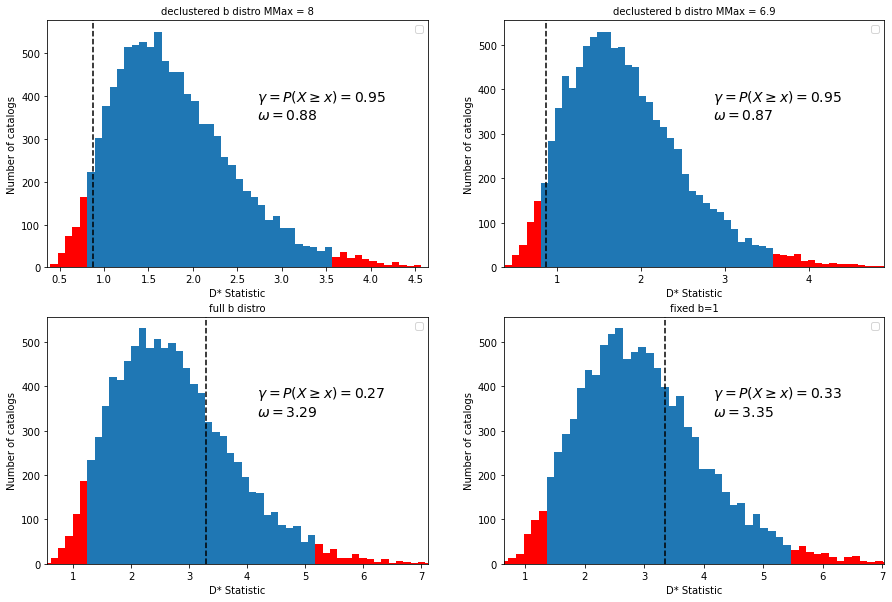

In [24]:
cat_copy16 = copy.deepcopy(italy_cat_1121)
## Update time
start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch('2016-01-01 00:00:00.0')
end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch('2017-01-01 00:00:00.0')
## filter catalog
filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
test_cat = cat_copy16.filter(filters)
cat_copy16 = cat_copy16.filter_spatial(forecast.region)
cat_copy16.filter('magnitude >= 4')

Magtests16 = []

for i in range(len(forecast_list2)):
        print("Running M-tests")
        result = catalog_evaluations.magnitude_test(forecast_list2[i],  cat_copy16, verbose=False)
        Magtests16.append(result)
        
        
fig, axs = plt.subplots(2,2, figsize=(15,10))

csep_plots.plot_magnitude_test(Magtests16[0], plot_args={"title": "declustered b distro MMax = 8" }, axes=axs[0,0], show=False)
csep_plots.plot_magnitude_test(Magtests16[1], plot_args={"title": "full b distro"}, axes=axs[1,0], show=False)
csep_plots.plot_magnitude_test(Magtests16[2], plot_args={"title": "fixed b=1"}, axes=axs[1,1], show=False)
csep_plots.plot_magnitude_test(Magtests16[3], plot_args={"title": "declustered b distro MMax = 6.9"}, axes=axs[0,1], show=False)
#plt.show()

plt.savefig("Magnitude_comps_2016.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


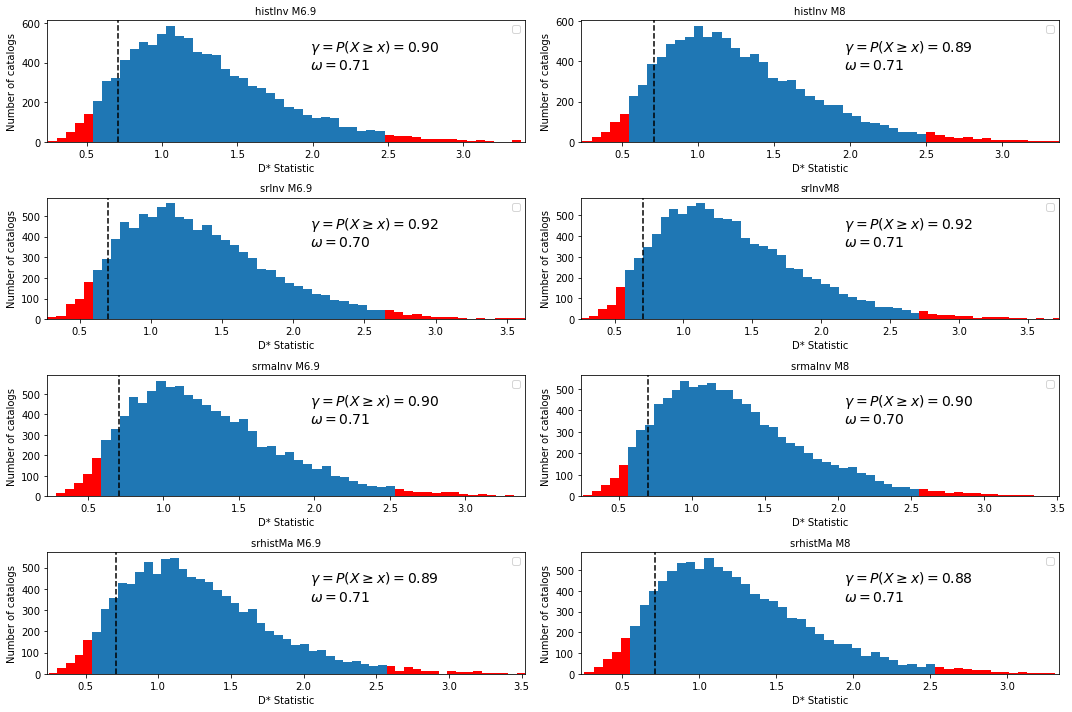

In [80]:
LTestCat16, MTestCat16, NTestCat16, STestCat16 = alphabet_tests_catalog(forecast_cats, cat_copy16)

fig, axs = plt.subplots(4,2, figsize=(15,10))

csep_plots.plot_magnitude_test(MTestCat[1], plot_args={"title": "histInv M6.9" }, axes=axs[0,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[7],  plot_args={"title": "histInv M8"}, axes=axs[0,1], show=False)


csep_plots.plot_magnitude_test(MTestCat[2], plot_args={"title": "srInv M6.9"}, axes=axs[1,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[8],  plot_args={"title": "srInvM8"}, axes=axs[1,1], show=False)

csep_plots.plot_magnitude_test(MTestCat[0],  plot_args={"title": "srmaInv M6.9"}, axes=axs[2,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[6], plot_args={"title": "srmaInv M8"}, axes=axs[2,1], show=False)

csep_plots.plot_magnitude_test(MTestCat[3],  plot_args={"title": "srhistMa M6.9"}, axes=axs[3,0], show=False)
csep_plots.plot_magnitude_test(MTestCat[9], plot_args={"title": "srhistMa M8"}, axes=axs[3,1], show=False)

fig.tight_layout()

#plt.show()
plt.savefig("mag_comps_all_2016.pdf")

So tapered bad in 2012 and 2016, but good in 2014 - very much depends on what year we're looking at and individual fmd

In [81]:
union_histogram = srhistma_bdecvar.expected_rates.magnitude_counts()
obs_histogram = cat_copy.magnitude_counts()

n_union_events = np.sum(union_histogram)
n_obs = np.sum(obs_histogram)
union_scale = n_obs / n_union_events
scaled_union_histogram = union_histogram * union_scale

In [82]:
obs_histogram

array([ 1.,  4.,  2.,  3.,  3.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [83]:
union_histogram

array([  3.73412659e+00,   2.90070993e+00,   2.27147285e+00,
         1.78842116e+00,   1.39476052e+00,   1.11598840e+00,
         8.64013599e-01,   6.79332067e-01,   5.33246675e-01,
         4.21557844e-01,   3.19068093e-01,   2.58974103e-01,
         2.01679832e-01,   1.55984402e-01,   1.21887811e-01,
         9.39906009e-02,   7.99920008e-02,   6.11938806e-02,
         4.45955404e-02,   3.84961504e-02,   3.32966703e-02,
         2.44975502e-02,   1.64983502e-02,   1.30986901e-02,
         1.27987201e-02,   9.39906009e-03,   7.89921008e-03,
         5.39946005e-03,   5.69943006e-03,   3.69963004e-03,
         3.39966003e-03,   2.29977002e-03,   1.49985001e-03,
         1.59984002e-03,   8.99910009e-04,   7.99920008e-04,
         6.99930007e-04,   8.99910009e-04,   1.99980002e-04,
         3.99960004e-04,   9.99900010e-05,   1.99980002e-04,
         0.00000000e+00,   9.99900010e-05,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

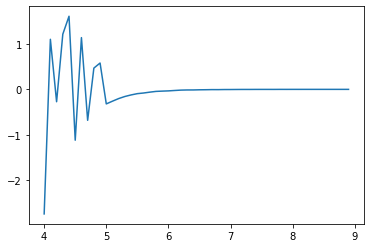

In [86]:
mags = srhistma_bdecvar.expected_rates.get_magnitudes()
diff = obs_histogram - union_histogram
plt.plot(mags, diff)

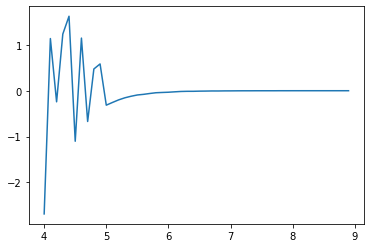

In [85]:
diff_scaled = obs_histogram - scaled_union_histogram
plt.plot(mags, diff_scaled)

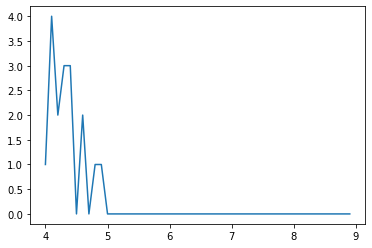

In [87]:
plt.plot(mags, obs_histogram)

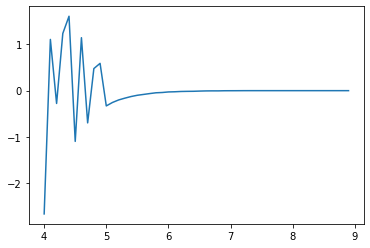

In [88]:
diff_m6 = obs_histogram - SRhistMa_MM6.expected_rates.magnitude_counts()
plt.plot(mags, diff_m6)


<BarContainer object of 50 artists>

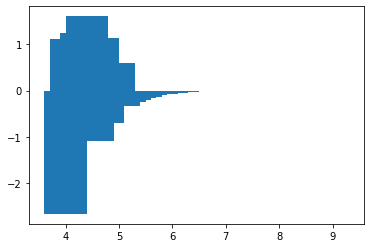

In [89]:
## Alternatively we could plot this as a bar chart, but it looks... weird
plt.bar(mags, diff_m6)

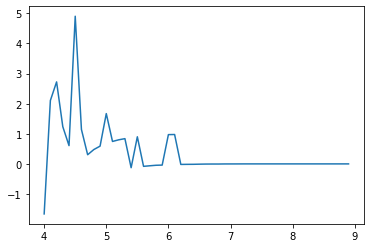

In [90]:
diff_m6 = italy_cat_2012.magnitude_counts() - SRhistMa_MM6.expected_rates.magnitude_counts()
plt.plot(mags, diff_m6)

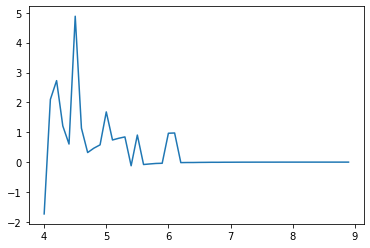

In [91]:
diff_m6 = italy_cat_2012.magnitude_counts() - srhistma_bdecvar.expected_rates.magnitude_counts()
plt.plot(mags, diff_m6)

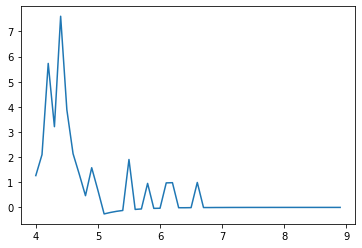

In [92]:
diff = cat_copy16.magnitude_counts() - srhistma_bdecvar.expected_rates.magnitude_counts()
plt.plot(mags, diff)

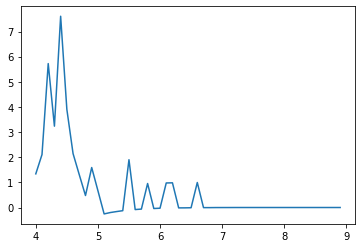

In [93]:
diff_m6 = cat_copy16.magnitude_counts() - SRhistMa_MM6.expected_rates.magnitude_counts()
plt.plot(mags, diff_m6)

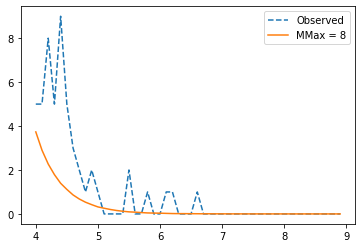

In [95]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(mags, cat_copy16.magnitude_counts(), ls="--", label ="Observed")
ax1.plot(mags, srhistma_bdecvar.expected_rates.magnitude_counts() , label = "MMax = 8")
#ax1.plot(mags, SRhistMa_MM6.expected_rates.magnitude_counts(), label = "MMax = 6.9")
plt.legend(loc="upper right")
#plt.show()
plt.savefig("MagComp_lines_2016_fixed.pdf")

<Figure size 432x288 with 0 Axes>

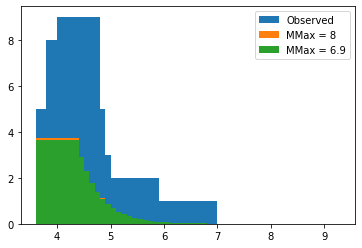

In [99]:
fig = plt.figure()
fig, axs = plt.subplots(1,1)

#ax1 = fig.add_subplot(111)

plt.bar(mags, cat_copy16.magnitude_counts(), ls="--", label ="Observed")
plt.bar(mags, srhistma_bdecvar.expected_rates.magnitude_counts() , label = "MMax = 8")
plt.bar(mags, SRhistMa_MM6.expected_rates.magnitude_counts(), label = "MMax = 6.9")
plt.legend(loc="upper right")
plt.savefig("magcomp_bar_2016_fixed.pdf")


Now we need to test these with declustered catalogues - strongly suspect we still do badly on large events.
Should we be weighting overestimating and underestimating events differently??

## ETAS - declustered models

Let's compare the models built with an GK-declsutered catalogue with those from an ETAS-declustered catalogue.

In [26]:
SRMaIFD_etas = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/ETAS_dec_cats/SRMAIFDe_6010_1yr.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

SRhistMa_etas = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/ETAS_dec_cats/SRhistMaSle_6010_1yr.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

In [27]:
forecast_cats_etas = [SRMaIFD_etas,SRhistMa_etas ]

## Then run all the tests
LTestCate, MTestCate, NTestCate, STestCate = alphabet_tests_catalog(forecast_cats_etas, italy_cat_2012)

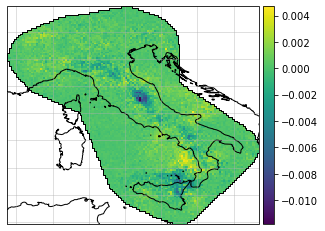

In [28]:
plot_forecast_diffs(SRMaIFD_bdecvar, SRMaIFD_etas)

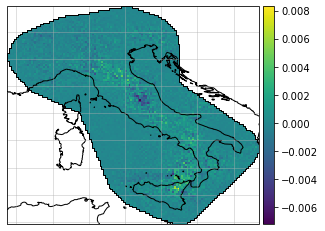

In [29]:
plot_forecast_diffs(srhistma_bdecvar, SRhistMa_etas)
plt.savefig("srhistma_norm_vs_etas.pdf")

Now you need to quantify how different these two models actually are - is -0.0175 significant at all?? Scale normally log from -2 (0.01) to -4 (0.0001) so a difference of 0.017 is definitely not insignificant!

<ipython-input-27-58a877973a1c>:2: RuntimeWarning: invalid value encountered in true_divide
  rate_diff = ((forecast1.spatial_counts(cartesian=True) - forecast2.spatial_counts(cartesian=True))/((forecast1.spatial_counts(cartesian=True) + forecast2.spatial_counts(cartesian=True))/2))*100


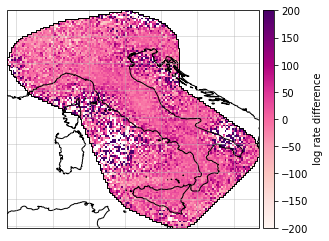

In [27]:
def plot_forecast_diffs_percent(forecast1, forecast2):
    rate_diff = ((forecast1.spatial_counts(cartesian=True) - forecast2.spatial_counts(cartesian=True))/((forecast1.spatial_counts(cartesian=True) + forecast2.spatial_counts(cartesian=True))/2))*100
    plots.plot_spatial_dataset(rate_diff, region = forecast1.region, plot_args={"cmap":"RdPu", "clabel":" log rate difference"})
    
plot_forecast_diffs_percent(srhistma_bdecvar, SRhistMa_etas)

<ipython-input-104-58a877973a1c>:2: RuntimeWarning: invalid value encountered in true_divide
  rate_diff = ((forecast1.spatial_counts(cartesian=True) - forecast2.spatial_counts(cartesian=True))/((forecast1.spatial_counts(cartesian=True) + forecast2.spatial_counts(cartesian=True))/2))*100


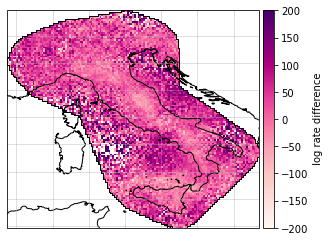

In [105]:
plot_forecast_diffs_percent(SRMaIFD_bdecvar, SRMaIFD_etas)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


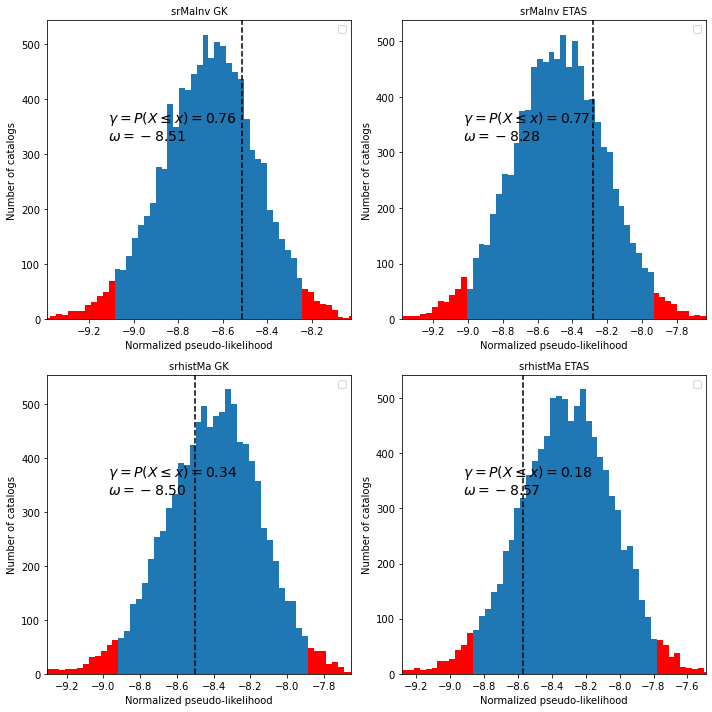

In [108]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_spatial_test(STestCat[0], plot_args={"title": "srMaInv GK" }, axes=axs[0,0], show=False)
csep_plots.plot_spatial_test(STestCate[0], plot_args={"title": "srMaInv ETAS"}, axes=axs[0,1], show=False)
csep_plots.plot_spatial_test(STestCat[3], plot_args={"title": "srhistMa GK"}, axes=axs[1,0], show=False)
csep_plots.plot_spatial_test(STestCate[1],  plot_args={"title": "srhistMa ETAS"}, axes=axs[1,1], show=False)

#plt.show()
plt.savefig("Etas_spat_comps.pdf")

Differences are marginal: Not enough data to comment on either performance. It might be possible to say that the forecast distributions are slightly different, but I'm not sure how confident I would/should be on that statement!

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


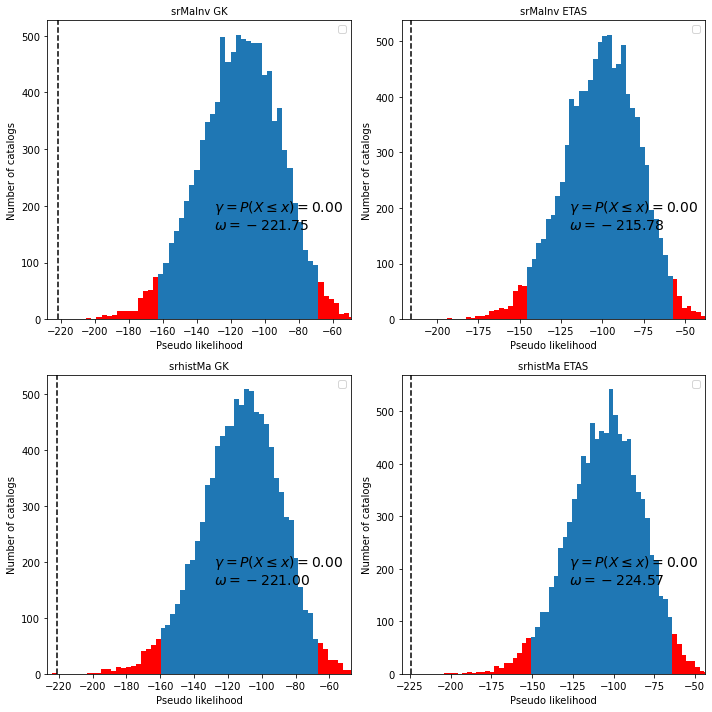

In [30]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_likelihood_test(LTestCat[0], plot_args={"title": "srMaInv GK" }, axes=axs[0,0], show=False)
csep_plots.plot_likelihood_test(LTestCate[0], plot_args={"title": "srMaInv ETAS"}, axes=axs[0,1], show=False)
csep_plots.plot_likelihood_test(LTestCat[3], plot_args={"title": "srhistMa GK"}, axes=axs[1,0], show=False)
csep_plots.plot_likelihood_test(LTestCate[1],  plot_args={"title": "srhistMa ETAS"}, axes=axs[1,1], show=False)

plt.show()

BAD likelihoods, but ournumbers are bad and these test cats are not declustered so this at least makes some sense!

### Declustered catalogues

In [31]:
from pyproj import Geod

def gardner_knopoff_decluster(self, param = "GK"):
    ### 3 options for parameterisation: original GK params, Gruenthal and Uhrhammer.
    ### See CORSSA paper (van Stiphout, T., J. Zhuang, and D. Marsan (2012), Seismicity declustering,
    ### Community Online Resource for Statistical Seismicity Analysis, doi:10.5078/corssa-
    ### 52382934. Available at http://www.corssa.org.) for descriptions of these and differences
    ### Usually US uses GK, Europe prefers Gruenthal/Uhrhammer
    ###
    ### Returns dataframe of events with event number, cluster number (clusters are numbered sequentially in time from start of catalogue)
    ### and a 'cluster_ref' column, which states whether an events should be considered independent or part of a cluster. 
    ### 'cluster_ref' is 0 for clustered events and 1 for independent (maybe backwards?)
    ### Mainshocks are retained (cluster_ref = 1) as in Gardner and Knopoff 1974
    ###
    g = 'WGS84'
    g1 = Geod(ellps=str(g))

    cat = pd.DataFrame(self.data)
    #clustered_ref = np.zeros(len(cat))
    cluster_number = np.zeros(len(cat))
    largest_magnitude = np.zeros(len(cat))
    mainshock = np.zeros(len(cat))

    cat['event_id'] = np.arange(len(cat))

    nclust = 0

    for i in range(len(cat)):
        for j in range(len(cat) - 1):
            j = j + 1
            if j > i:
                ## Calculate time difference in days
                tdif = ((cat['origin_time'].values)[j] - (cat['origin_time'].values)[i])/(1000*3600*24)
                # time is in milliseconds in pycsep, so this is right

                g3 = Geod.inv(g1, (cat['longitude'].values)[i], (cat['latitude'].values)[i], (cat['longitude'].values)[j],
                              (cat['latitude'].values)[j], radians=False)
                rdif = (g3[2]) / 1000

                if param == 'GK':
                    d = 10 ** (0.1238 * (cat['magnitude'].values)[i] + 0.983)
                    if (cat['magnitude'].values)[i] >= 6.5:
                        t = 10 ** (0.032 * (cat['magnitude'].values)[i] + 2.7389)

                    else:
                        t = 10 ** (0.5409 * (cat['magnitude'].values)[i] - 0.547)

                elif param == 'Gruenthal':
                    d = math.exp(1.77 + (0.037 + 1.02 * (cat['magnitude'].values)[i]) ** 2)
                    if (cat['magnitude'].values)[i] >= 6.5:
                        t = np.abs(math.exp(-3.95 + (0.62 + 17.32 * (cat['magnitude'].values)[i]) ** 2))
                    else:
                        t = 10 ** (2.8 + 0.024 * (cat['magnitude'].values)[i])

                elif param == "Uhrhammer":
                    t = math.exp(-2.87 + 1.234 * (cat['magnitude'].values)[i])
                    d = math.exp(-1.024 + 0.804 * (cat['magnitude'].values)[i])

                if tdif <= t and rdif <= d:
                    if cluster_number[j] != 0 and cluster_number[i] != 0:
                        k = cluster_number[i]
                        l = cluster_number[j]
                        if k >= l:
                            k = cluster_number[j]
                            l = cluster_number[i]
                        for ii in range(len(cat)):
                            if cluster_number[ii] == l:
                                cluster_number[ii] = k
                    elif cluster_number[i] != 0:
                        cluster_number[j] = cluster_number[i]
                    elif cluster_number[j] != 0:
                        cluster_number[i] = cluster_number[j]
                    else:
                        nclust = nclust + 1
                        cluster_number[i] = nclust
                        cluster_number[j] = nclust
                        ###############

    # %%

    cat_clustered = pd.DataFrame({'Cluster_Number': pd.Series(cluster_number)})
    catcat = pd.concat([cat, cat_clustered], axis=1)
    catcat['cluster_ref'] = 0
    clusters = np.arange(1, (np.max(catcat['Cluster_Number'] + 1)))
    ms_ref = np.zeros(len(clusters) +1, dtype=float)
    
    for i in clusters:
        #print(i)
        clust = catcat[catcat["Cluster_Number"].isin([i])]
        if len(clust) == 0: break
        ms = np.argmax(clust['magnitude'])
        ms_ref = clust['event_id'].iloc[ms]
        catcat['cluster_ref'][ms_ref] = 1
        #catcat.loc[:, ('cluster_ref', 'ms_ref')] = 1

    catcat.loc[catcat['Cluster_Number'] == 0, 'cluster_ref'] = 1

    return(catcat)

In [32]:
import pandas as pd
import numpy

italy_test_dec = gardner_knopoff_decluster(italy_cat_2012, param="GK")
italy_dec = italy_test_dec[italy_test_dec["cluster_ref"] == 1]
italy_dec
### This is clearly not working correctly - we should only keep 1 event from cluster 1!

<ipython-input-31-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


id    origin_time  latitude  longitude  depth  magnitude  event_id  \
0   b'165'  1327449286000     45.54      10.97   15.0        4.1         0   
2   b'169'  1327675994000     44.48      10.03   50.0        5.0         2   
3   b'178'  1330202074000     38.65      13.42   43.0        4.4         3   
4   b'179'  1330295875000     44.54       6.66    2.0        4.5         4   
5   b'182'  1330960500000     44.54       9.38   10.5        4.3         5   
6   b'183'  1331782140000     42.81      13.20    6.0        4.0         6   
7   b'188'  1334298095000     38.19      13.31   20.0        4.5         7   
9   b'200'  1337479433000     44.89      11.25   10.0        6.1         9   
15  b'211'  1338167187000     39.86      16.12    3.0        4.5        15   
20  b'219'  1338955711000     44.43      12.35   25.6        4.2        20   
21  b'222'  1339207496000     46.21      12.44    7.1        4.2        21   
23  b'236'  1341400332000     37.69      16.87   40.0        4.6        23   
24  b'237'  1341408432000     38.57      15.14  178.0        4.3        24   
25  b'250'  1344734496000     41.77      16.27    8.4        4.1        25   
26  b'251'  1344843051000     38.52      13.73   26.5        4.2        26   
28  b'262'  1348879184000     38.52      14.81  249.0        4.5        28   
29  b'264'  1349256043000     44.57       7.21   10.0        4.0        29   
30  b'265'  1349275290000     44.85       9.77   30.0        4.5        30   
31  b'271'  1350400259000     39.74      15.59  270.0        4.8        31   
32  b'274'  1351206324000     39.88      16.01   15.0        5.3        32   

    Cluster_Number  cluster_ref  
0              0.0            1  
2              0.0            1  
3              0.0            1  
4              0.0            1  
5              0.0            1  
6              0.0            1  
7              0.0            1  
9              1.0            1  
15             0.0            1  
20             0.0            1  
21             0.0            1  
23             0.0            1  
24             0.0            1  
25             0.0            1  
26             0.0            1  
28             0.0            1  
29             0.0            1  
30             0.0            1  
31             0.0            1  
32             0.0            1

In [33]:
## Now we need to change this back into a catalog object...
#cat = csep.core.catalogs.CSEPCatalog()
dec_cat = csep.core.catalogs.CSEPCatalog.from_dataframe(italy_dec, region=space_magnitude_region)
#dec_cat.write_ascii("italy_GK_dec.txt")


In [34]:
forecast_cats = [SRMaInv_MM6, histInv_MM6, SRIFD_MM6,  SRhistMa_MM6, srhistDEM_MM6, InvDEMMa_MM6, SRMaIFD_etas,SRhistMa_etas]

LTestCatD, MTestCatD, NTestCatD, STestCatD = alphabet_tests_catalog(forecast_cats, dec_cat)

In [35]:
forecastD_names = ["SRMaInv_M8", "SRhistMa_M8",  "SRInv_M8",  "histInv_M8", "SRhistDEM_M6.9", "InvDEM_M6.9", "SRhistMa_M6.9", "SRInv_M6.9", "histInv_M6.9", "SRMaInv_Etas_M6.9", "SRhistMa_etas_M6.9"]
magnitude_comps(forecast_cats, forecastD_names, dec_cat, "1yr_tests_dec_mag_aug.pdf")

NameError: name 'magnitude_comps' is not defined

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


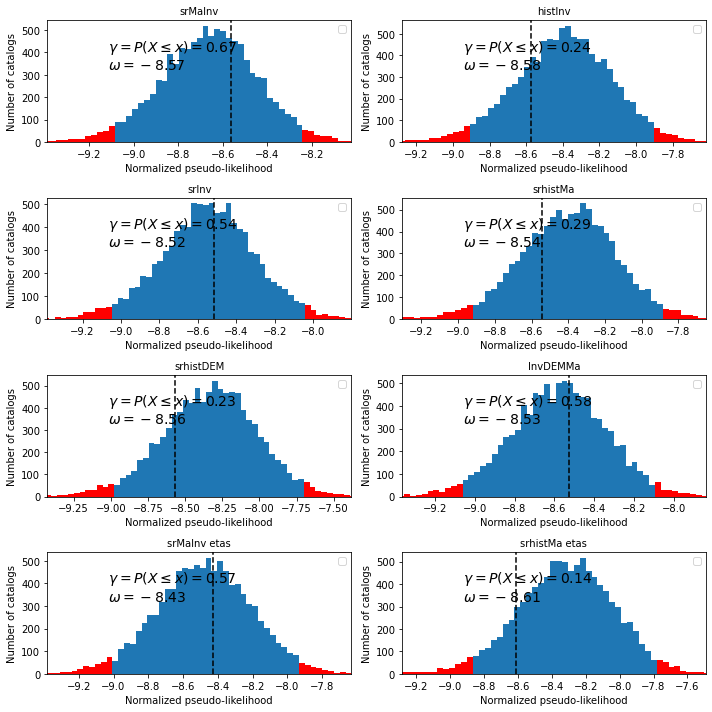

In [125]:
fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_spatial_test(STestCatD[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_spatial_test(STestCatD[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False)
csep_plots.plot_spatial_test(STestCatD[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_spatial_test(STestCatD[3],  plot_args={"title": "srhistMa"}, axes=axs[1,1], show=False)
csep_plots.plot_spatial_test(STestCatD[4], plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_spatial_test(STestCatD[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)
csep_plots.plot_spatial_test(STestCatD[6], plot_args={"title": "srMaInv etas"}, axes=axs[3,0], show=False)
csep_plots.plot_spatial_test(STestCatD[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False)

fig.tight_layout()
#plt.show()
plt.savefig("spatial_2012_dec_comp.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


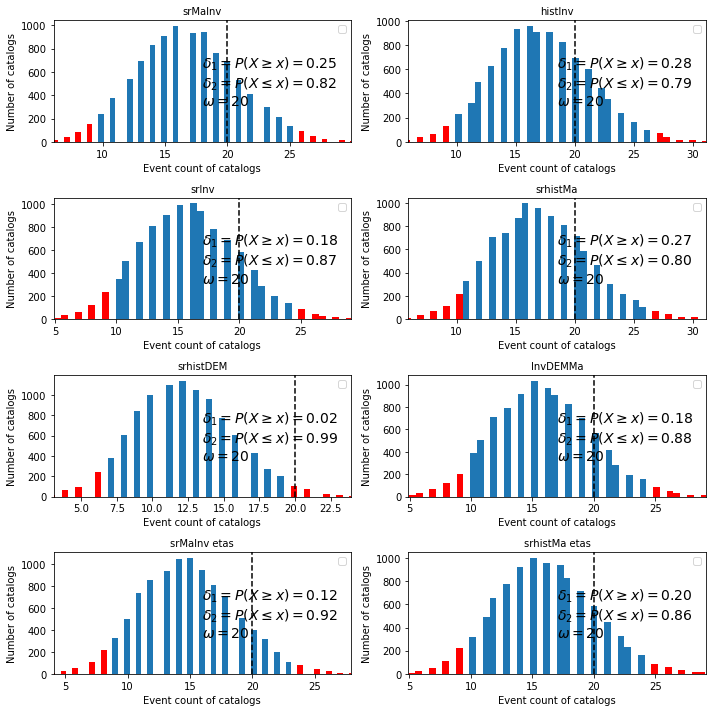

In [126]:
fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_number_test(NTestCatD[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_number_test(NTestCatD[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False)
csep_plots.plot_number_test(NTestCatD[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_number_test(NTestCatD[3],  plot_args={"title": "srhistMa"}, axes=axs[1,1], show=False)
csep_plots.plot_number_test(NTestCatD[4], plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_number_test(NTestCatD[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)
csep_plots.plot_number_test(NTestCatD[6], plot_args={"title": "srMaInv etas"}, axes=axs[3,0], show=False)
csep_plots.plot_number_test(NTestCatD[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False)

fig.tight_layout()
#plt.savefig("Dec2012_Ntest.pdf")


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


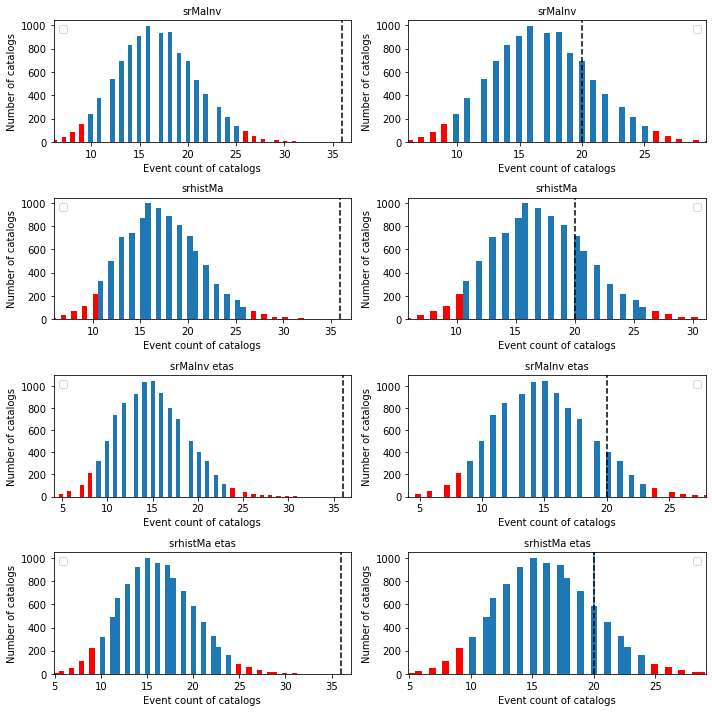

In [130]:
LTestCatde, MTestCatde, NTestCatde, STestCatde = alphabet_tests_catalog(forecast_cats, italy_cat_2012)

fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_number_test(NTestCatde[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False, label=False)
plt.axvline(x=NTestCatD[0].observed_statistic)
csep_plots.plot_number_test(NTestCatde[3],  plot_args={"title": "srhistMa"}, axes=axs[1,0], show=False, label=False)
csep_plots.plot_number_test(NTestCatde[6], plot_args={"title": "srMaInv etas"}, axes=axs[2,0], show=False, label=False)
csep_plots.plot_number_test(NTestCatde[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,0], show=False, label=False)


csep_plots.plot_number_test(NTestCatD[0], plot_args={"title": "srMaInv" }, axes=axs[0,1], show=False, label=False)
csep_plots.plot_number_test(NTestCatD[3],  plot_args={"title": "srhistMa"}, axes=axs[1,1], show=False, label=False)
csep_plots.plot_number_test(NTestCatD[6], plot_args={"title": "srMaInv etas"}, axes=axs[2,1], show=False, label=False)
csep_plots.plot_number_test(NTestCatD[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False, label=False)

fig.tight_layout()
plt.savefig("Number_tests_2012_dec.pdf")


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


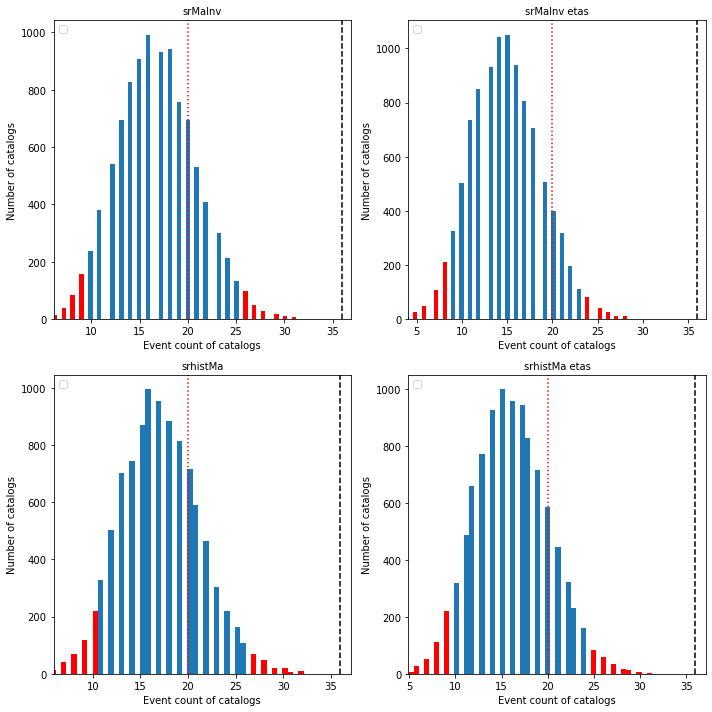

In [152]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_number_test(NTestCatde[0], plot_args={"title": "srMaInv"}, axes=axs[0,0], show=False, label=False)
axs[0,0].axvline(x=NTestCatD[0].observed_statistic,  color='r',  ls=':')
csep_plots.plot_number_test(NTestCatde[3],  plot_args={"title": "srhistMa"}, axes=axs[1,0], show=False, label=False)
axs[1,0].axvline(x=NTestCatD[3].observed_statistic,  color='r',  ls=':')
csep_plots.plot_number_test(NTestCatde[6], plot_args={"title": "srMaInv etas"}, axes=axs[0,1], show=False, label=False)
axs[0,1].axvline(x=NTestCatD[6].observed_statistic,  color='r',  ls=':')
csep_plots.plot_number_test(NTestCatde[7],  plot_args={"title": "srhistMa etas"}, axes=axs[1,1], show=False, label=False)
axs[1,1].axvline(x=NTestCatD[7].observed_statistic, color='r',  ls=':')

fig.tight_layout()
plt.savefig("Number_tests_2012_decred.pdf")


(array([   1.,    0.,    0.,    0.,    0.,    6.,   16.,   38.,   84.,
         156.,  239.,  380.,  540.,  693.,  827.,  907.,  992.,  932.,
         943.,  758.,  695.,  531.,  408.,  299.,  212.,  133.,   97.,
          50.,   27.,   17.,   10.,    7.,    1.,    1.,    1.]),
 array([  0.        ,   0.97142857,   1.94285714,   2.91428571,
          3.88571429,   4.85714286,   5.82857143,   6.8       ,
          7.77142857,   8.74285714,   9.71428571,  10.68571429,
         11.65714286,  12.62857143,  13.6       ,  14.57142857,
         15.54285714,  16.51428571,  17.48571429,  18.45714286,
         19.42857143,  20.4       ,  21.37142857,  22.34285714,
         23.31428571,  24.28571429,  25.25714286,  26.22857143,
         27.2       ,  28.17142857,  29.14285714,  30.11428571,
         31.08571429,  32.05714286,  33.02857143,  34.        ]),
 <BarContainer object of 35 artists>)

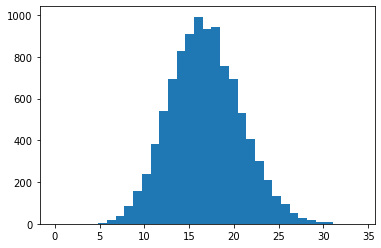

In [146]:
plt.hist(NTestCatD[0].test_distribution, bins=35)

ETAS catalogues did better on the number of events, but now that we've fixed these forecasts (start at M4, use Mmax=6.9) we get a better number overall for all forecasts when testing declustered catalogues.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


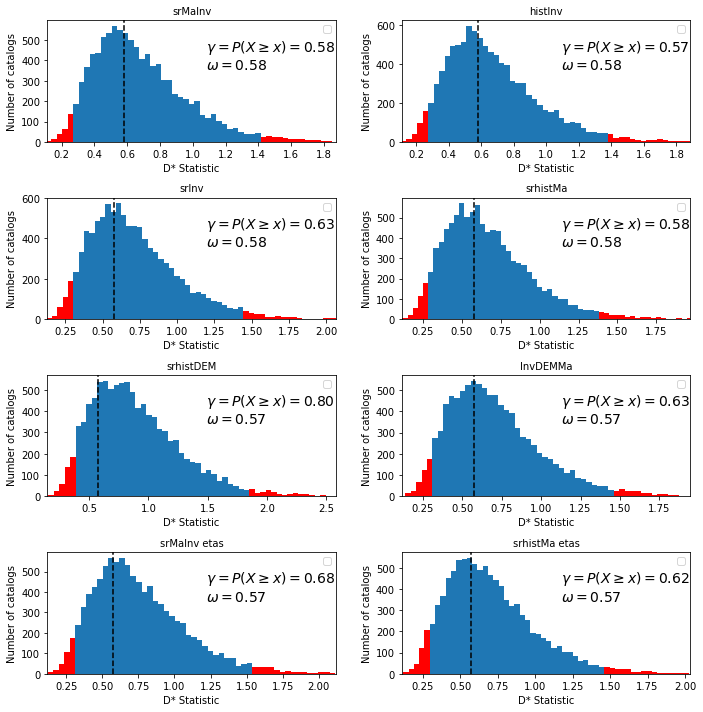

In [124]:
fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_magnitude_test(MTestCatD[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_magnitude_test(MTestCatD[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False)
csep_plots.plot_magnitude_test(MTestCatD[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_magnitude_test(MTestCatD[3],  plot_args={"title": "srhistMa"}, axes=axs[1,1], show=False)
csep_plots.plot_magnitude_test(MTestCatD[4], plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_magnitude_test(MTestCatD[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)
csep_plots.plot_magnitude_test(MTestCatD[6], plot_args={"title": "srMaInv etas"}, axes=axs[3,0], show=False)
csep_plots.plot_magnitude_test(MTestCatD[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False)

fig.tight_layout()
plt.savefig("Dec2012_magnitude_tests.pdf")


Again these are all looking pretty good now :)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


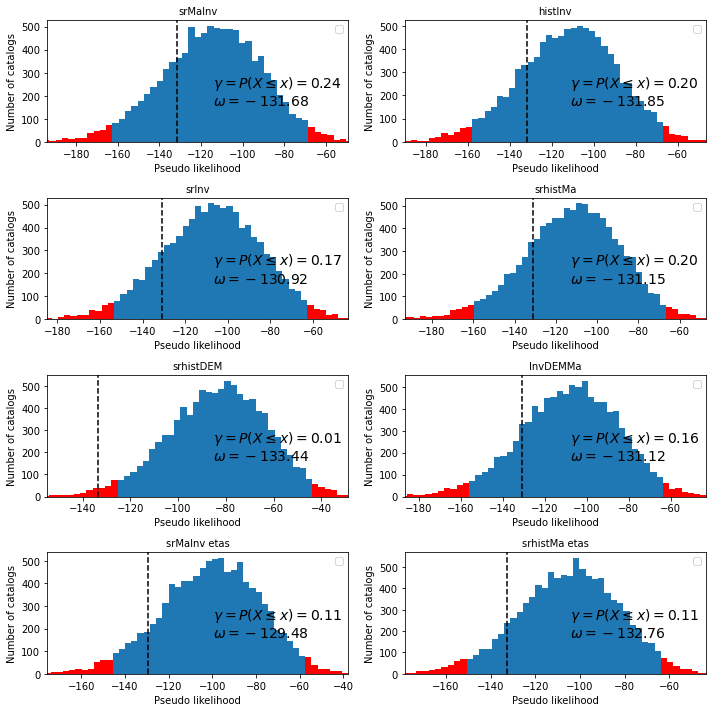

In [126]:
fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_likelihood_test(LTestCatD[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_likelihood_test(LTestCatD[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False)
csep_plots.plot_likelihood_test(LTestCatD[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_likelihood_test(LTestCatD[3],  plot_args={"title": "srhistMa"}, axes=axs[1,1], show=False)
csep_plots.plot_likelihood_test(LTestCatD[4], plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_likelihood_test(LTestCatD[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)
csep_plots.plot_likelihood_test(LTestCatD[6], plot_args={"title": "srMaInv etas"}, axes=axs[3,0], show=False)
csep_plots.plot_likelihood_test(LTestCatD[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False)

fig.tight_layout()
plt.savefig("Dec2012_likelihood.pdf")



ETAS declustered srmainv and srhistma do much better in terms of number and magnitude than the GK alternatives, so do better in the likelihood tests. Of course, we should compare the model with adjusted MMag to check how that compares, but we only have that for srhistma:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


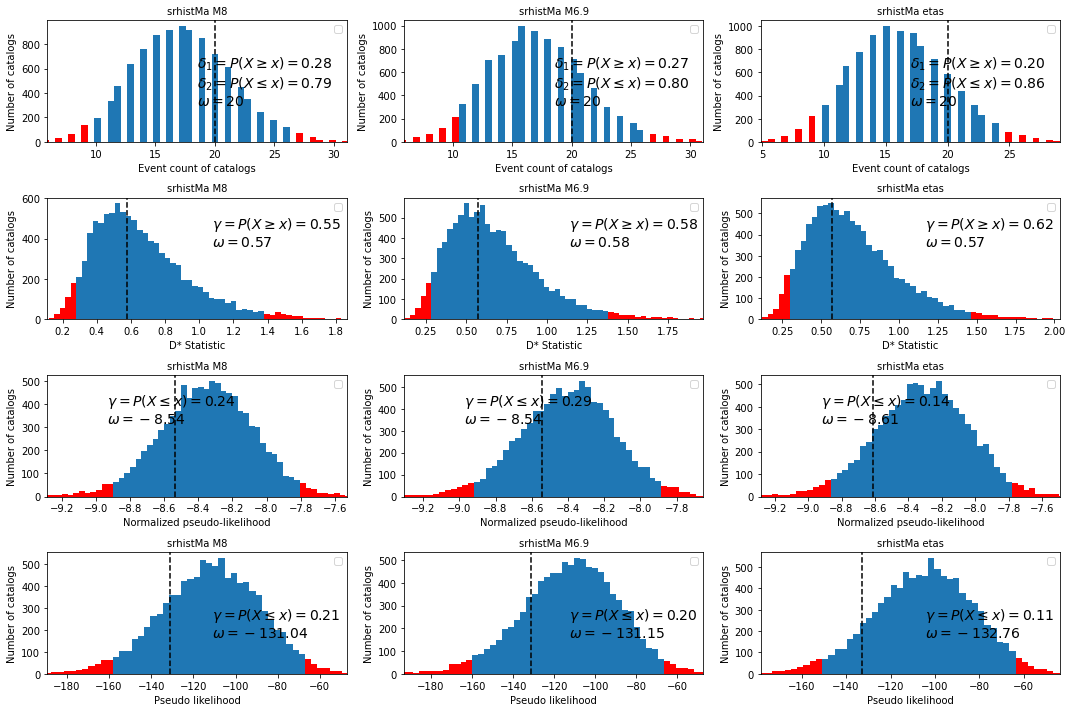

In [36]:
forecast_cats_M8 = [srhistma_bdecvar]

LTestCatDM8, MTestCatDM8, NTestCatDM8, STestCatDM8 = alphabet_tests_catalog(forecast_cats_M8, dec_cat)

fig, axs = plt.subplots(4,3, figsize=(15,10))

csep_plots.plot_number_test(NTestCatDM8[0], plot_args={"title": "srhistMa M8" }, axes=axs[0, 0], show=False)
csep_plots.plot_number_test(NTestCatD[3], plot_args={"title": "srhistMa M6.9"}, axes=axs[0,1], show=False)
csep_plots.plot_number_test(NTestCatD[7], plot_args={"title": "srhistMa etas"}, axes=axs[0, 2], show=False)

csep_plots.plot_magnitude_test(MTestCatDM8[0], plot_args={"title": "srhistMa M8" }, axes=axs[1, 0], show=False)
csep_plots.plot_magnitude_test(MTestCatD[3], plot_args={"title": "srhistMa M6.9"}, axes=axs[1,1], show=False)
csep_plots.plot_magnitude_test(MTestCatD[7], plot_args={"title": "srhistMa etas"}, axes=axs[1, 2], show=False)

csep_plots.plot_spatial_test(STestCatDM8[0], plot_args={"title": "srhistMa M8" }, axes=axs[2, 0], show=False)
csep_plots.plot_spatial_test(STestCatD[3], plot_args={"title": "srhistMa M6.9"}, axes=axs[2,1], show=False)
csep_plots.plot_spatial_test(STestCatD[7], plot_args={"title": "srhistMa etas"}, axes=axs[2, 2], show=False)

csep_plots.plot_likelihood_test(LTestCatDM8[0], plot_args={"title": "srhistMa M8" }, axes=axs[3, 0], show=False)
csep_plots.plot_likelihood_test(LTestCatD[3], plot_args={"title": "srhistMa M6.9"}, axes=axs[3, 1], show=False)
csep_plots.plot_likelihood_test(LTestCatD[7], plot_args={"title": "srhistMa etas"}, axes=axs[3, 2], show=False)

fig.tight_layout()
#plt.savefig("srhistma_mag_comps_declustered.pdf")

So more improved performance is coming from the MMax = 6 than the spatial distro (expected). Reminder that the spatial model differences look like this:

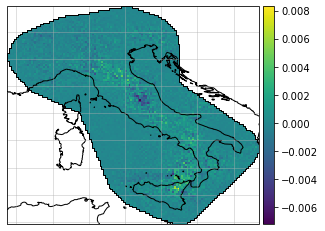

In [37]:
plot_forecast_diffs(srhistma_bdecvar, SRhistMa_etas)
#plt.savefig("srhistma_etas_forecastcomp.pdf")

# 5 year forecasts

In [30]:
srmaInv_bdecvar_5 = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/SRMaIFD_bvar_5yrs.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

histInv_bdecvar_5 = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/HistInv_b_decvar_5yrs.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

SRIFD_bdecvar_5 = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/SRIFD_b_decvar2_5yrs.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

srhistma_bdecvar_5 = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/SRhistMa_b_decvar2_5yrs.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)


In [31]:
italy_test_catalog = csep.load_catalog("/home/kbayliss/PycharmProjects/pycsep_workshop_rise21/workshop_data/catalogs/europe_rcmt_2010-2015.csv", type="ingv_emrcmt")
italy_test_catalog = italy_test_catalog.filter_spatial(forecast.region)
## These are all M>4.3, so use this as testing catalogue
italy_test_catalog.filter('magnitude >= 4.3')
italy_test_catalog.get_magnitudes()

Removed 1 badly formatted events
Removed 0 repeated events


array([ 4.3,  4.7,  4.3,  4.4,  5.2,  4.3,  4.8,  4.7,  4.3,  4.8,  4.7,
        5. ,  5. ,  4.4,  4.5,  4.3,  4.5,  4.3,  6.1,  5.1,  5.2,  4.5,
        4.5,  6. ,  4.7,  5.5,  4.9,  4.6,  4.3,  4.6,  4.5,  4.5,  4.8,
        5.3,  4.4,  4.4,  5. ,  4.4,  4.9,  4.6,  5.4,  4.3,  4.7,  4.8,
        5.2,  4.5,  4.5,  4.3,  5.2,  4.4,  4.8,  4.9,  4.6,  4.3,  4.4,
        4.3,  4.4,  4.3,  4.6])

<GeoAxesSubplot:>

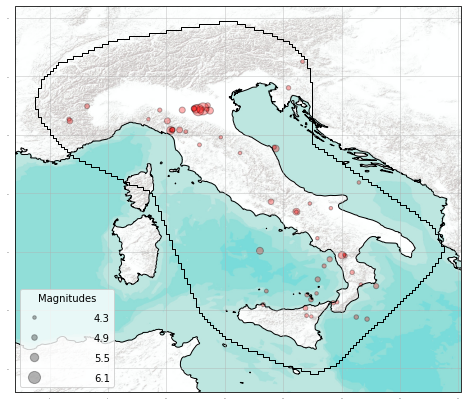

In [32]:
italy_test_catalog.plot()

In [33]:
forecast_cats5 = [srmaInv_bdecvar_5, histInv_bdecvar_5, SRIFD_bdecvar_5, srhistma_bdecvar_5]

## Then run all the tests
LTestCat5, MTestCat5, NTestCat5, STestCat5 = alphabet_tests_catalog(forecast_cats5, italy_test_catalog)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


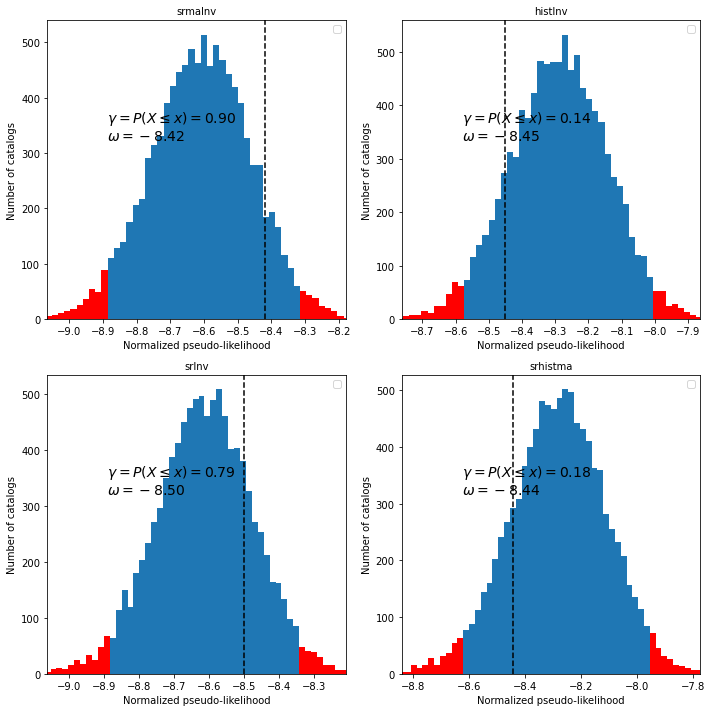

In [135]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_spatial_test(STestCat5[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_spatial_test(STestCat5[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_spatial_test(STestCat5[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_spatial_test(STestCat5[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


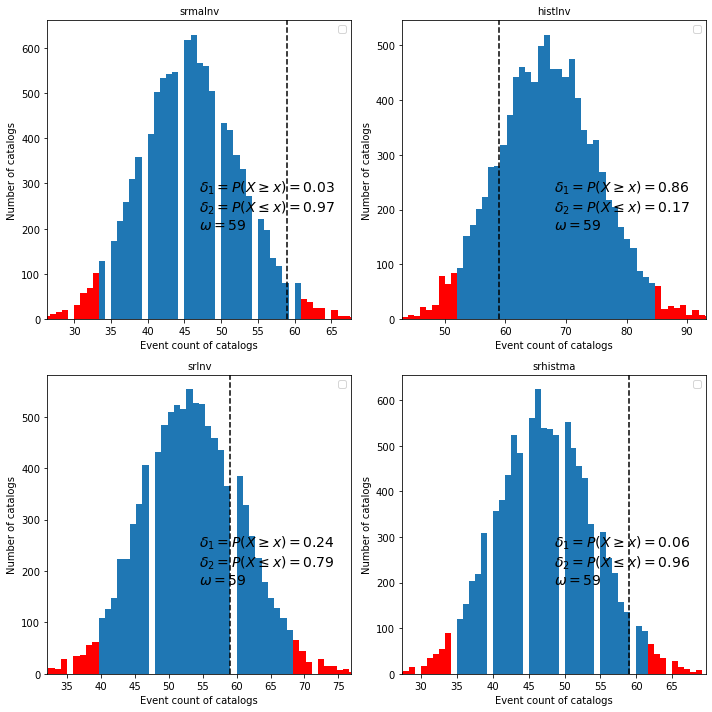

In [136]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_number_test(NTestCat5[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_number_test(NTestCat5[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_number_test(NTestCat5[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_number_test(NTestCat5[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


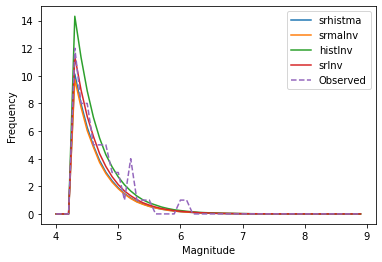

In [138]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(mags, srhistma_bdecvar_5.expected_rates.magnitude_counts() , label = "srhistma")
ax1.plot(mags, srmaInv_bdecvar_5.expected_rates.magnitude_counts(), label = "srmaInv")
ax1.plot(mags, histInv_bdecvar_5.expected_rates.magnitude_counts(), label = "histInv")
ax1.plot(mags, SRIFD_bdecvar_5.expected_rates.magnitude_counts(), label = "srInv")
ax1.plot(mags, italy_test_catalog.magnitude_counts(), ls="--", label ="Observed")

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Frequency')
plt.legend(loc="upper right")
plt.savefig("M8mods_5yrs_M43.pdf")

<Figure size 432x288 with 0 Axes>

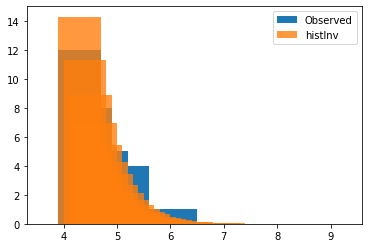

In [147]:
fig = plt.figure()
fig, axs = plt.subplots(1,1)

#ax1 = fig.add_subplot(111)

plt.bar(mags, italy_test_catalog.magnitude_counts(), alpha=1, ls="--", label ="Observed")
#plt.bar(mags, srmaInv_bdecvar_5.expected_rates.magnitude_counts(), alpha=0.8, label = "srmaInv")
plt.bar(mags, histInv_bdecvar_5.expected_rates.magnitude_counts(), alpha=0.8, label = "histInv")
#plt.bar(mags, SRIFD_bdecvar_5.expected_rates.magnitude_counts(), alpha=0.8, label = "srInv")
#plt.bar(mags, srhistma_bdecvar_5.expected_rates.magnitude_counts(), alpha=0.8, label = "srhistma")

plt.legend(loc="upper right")
#plt.savefig("magcomp_bar_5years_fixed.pdf")


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


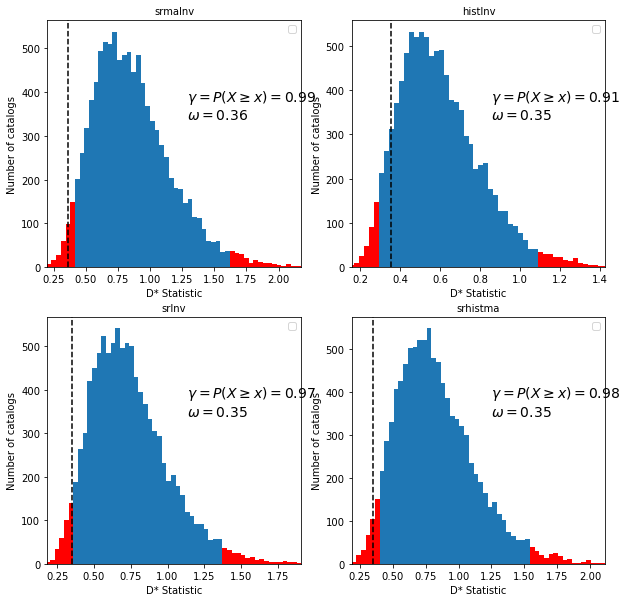

In [148]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_magnitude_test(MTestCat5[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_magnitude_test(MTestCat5[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_magnitude_test(MTestCat5[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_magnitude_test(MTestCat5[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


histInv does best because it captures the M<5 seismicity better than the other models, but still does poorly for M>5, underestimating the number of large events. HistInv does better at the smaller magnitudes because it assumes more events: the FMD is just rescaled rather than exceptionally different from the other models.

* Would be interesting to see how tapered GR model does here

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


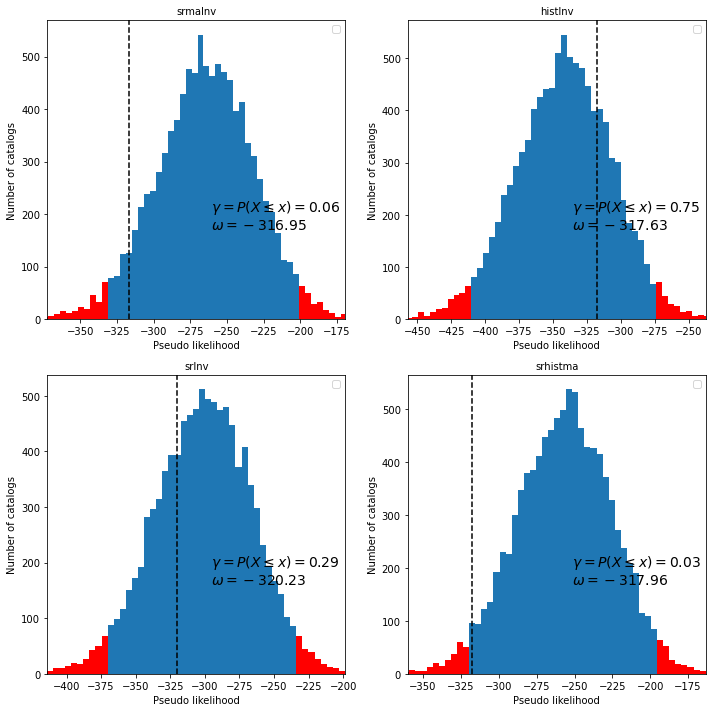

In [149]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_likelihood_test(LTestCat5[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_likelihood_test(LTestCat5[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_likelihood_test(LTestCat5[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_likelihood_test(LTestCat5[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


Behvaiur here as expected: models with better number/magnitude do better in the likelihood tests - do we need a conditional pseudo-likelihood??

In [150]:
italy_test_dec5 = gardner_knopoff_decluster(italy_test_catalog, param="GK")
italy_dec5 = italy_test_dec5[italy_test_dec5["cluster_ref"] == 1]
dec_cat5 = csep.core.catalogs.CSEPCatalog.from_dataframe(italy_dec5, region=space_magnitude_region)

LTestCatD5, MTestCatD5, NTestCatD5, STestCatD5 = alphabet_tests_catalog(forecast_cats5, dec_cat5)

<ipython-input-110-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


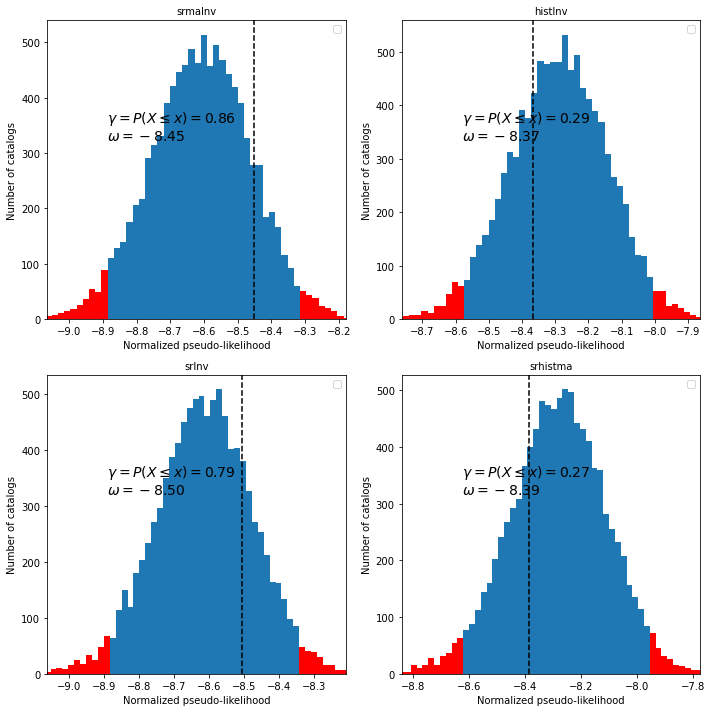

In [151]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_spatial_test(STestCatD5[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_spatial_test(STestCatD5[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_spatial_test(STestCatD5[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_spatial_test(STestCatD5[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()

Spatial test results are good, but these were also good with full cat ;)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


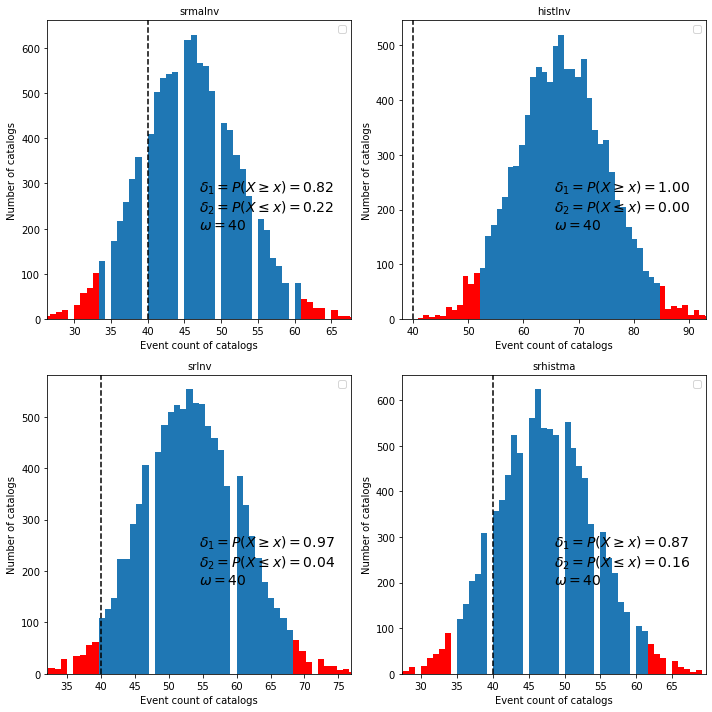

In [152]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_number_test(NTestCatD5[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_number_test(NTestCatD5[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_number_test(NTestCatD5[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_number_test(NTestCatD5[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


Now histInv is massively overestimating the number of events - check code for this, I suspect there's a bug

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


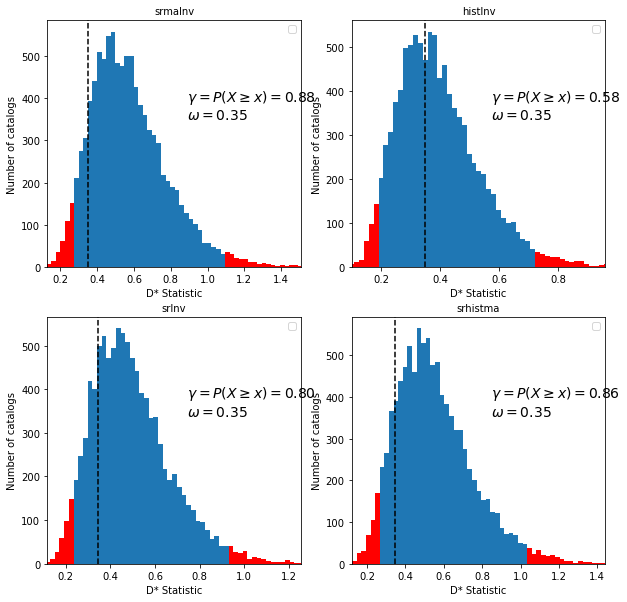

In [153]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_magnitude_test(MTestCatD5[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_magnitude_test(MTestCatD5[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_magnitude_test(MTestCatD5[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_magnitude_test(MTestCatD5[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


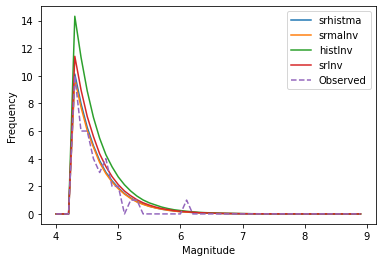

In [155]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(mags, srhistma_bdecvar_5.expected_rates.magnitude_counts() , label = "srhistma")
ax1.plot(mags, srmaInv_bdecvar_5.expected_rates.magnitude_counts(), label = "srmaInv")
ax1.plot(mags, histInv_bdecvar_5.expected_rates.magnitude_counts(), label = "histInv")
ax1.plot(mags, SRIFD_bdecvar_5.expected_rates.magnitude_counts(), label = "srInv")
ax1.plot(mags, dec_cat5.magnitude_counts(), ls="--", label ="Observed")

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Frequency')
plt.legend(loc="upper right")
#plt.show()
plt.savefig("magnitudes_declustered_5yrs.pdf")

Magnitude performance is better, because we've smoothed out some of the observed catalogue and lowered the number of events.

In [38]:
### Write magnitude plots as a function

def magnitude_comps(forecast_list, forecast_names, test_cat, savename):
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    
    mags = forecast_list[0].magnitudes

    for i in range(len(forecast_list)):
        forecast = forecast_list[i]
        ax1.plot(mags, forecast.expected_rates.magnitude_counts() , label = forecast_names[i])

    ax1.plot(mags,test_cat.magnitude_counts(), ls="--", label ="Observed")

    ax1.set_xlabel('Magnitude')
    ax1.set_ylabel('Frequency')
    plt.legend(loc="upper right")
    plt.savefig(savename)
    plt.show()

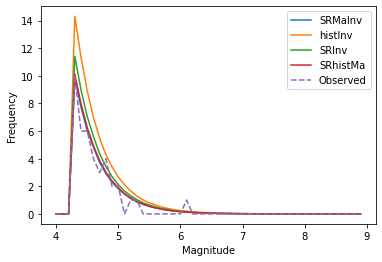

In [128]:
## forecast_cats5 = [srmaInv_bdecvar_5, histInv_bdecvar_5, SRIFD_bdecvar_5, srhistma_bdecvar_5]
forecast5_names = ["SRMaInv", "histInv", "SRInv", "SRhistMa"]
magnitude_comps(forecast_cats5, forecast5_names, dec_cat5, "5yr_tests_dec_mag.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


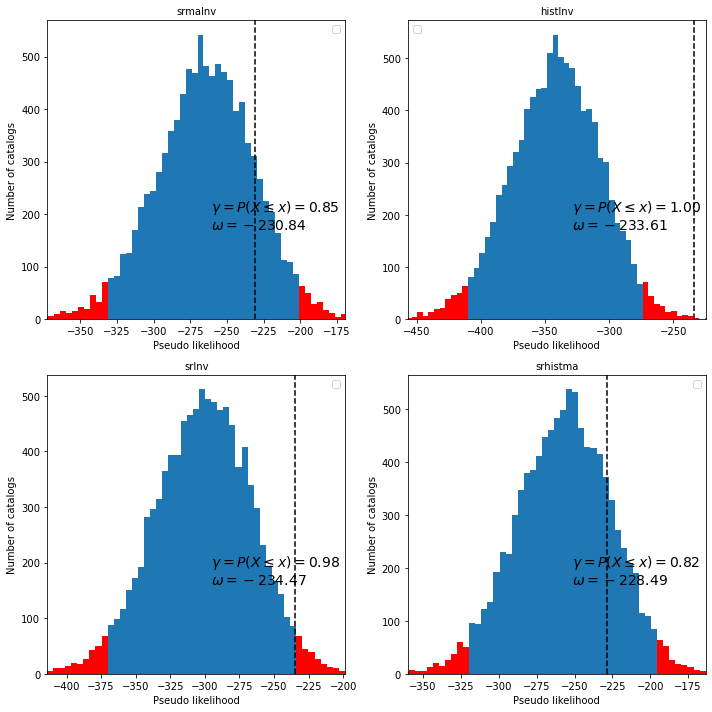

In [156]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_likelihood_test(LTestCatD5[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_likelihood_test(LTestCatD5[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_likelihood_test(LTestCatD5[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_likelihood_test(LTestCatD5[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


# 10 year forecasts
Need a ten year testing cat ;)

In [35]:
srmaInv_bdecvar_10 = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/SRMaIFD_bvar_10yrs.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

histInv_bdecvar_10 = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/HistInv_b_decvar_10yrs.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

SRIFD_bdecvar_10 = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/SRIFD_b_decvar2_10yrs.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

srhistma_bdecvar_10 = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_bk_forecasts/Italy_bk_forecasts/Originals_Feb22/SRhistMa_b_decvar2_10yrs.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)


In [36]:
italy_10yr_catalog = csep.load_catalog("/home/kbayliss/Downloads/Italy_forecasts_Feb2022/EuroMedCentrMomTensors-1645023259641.csv", type="ingv_emrcmt")

start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch('2011-01-01 00:00:00.0')
end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch('2021-01-01 00:00:00.0')

filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
italy_cat_1121 = italy_10yr_catalog.filter(filters)
italy_cat_1121 = italy_cat_1121.filter_spatial(forecast.region)
italy_cat_1121.filter('magnitude >= 4.3')
italy_cat_1121.get_magnitudes()

Removed 1 badly formatted events
Removed 0 repeated events


array([ 4.3 ,  4.8 ,  4.7 ,  4.3 ,  4.8 ,  4.7 ,  5.  ,  5.  ,  4.4 ,
        4.5 ,  4.3 ,  4.5 ,  4.3 ,  6.1 ,  5.1 ,  5.2 ,  4.5 ,  4.5 ,
        6.  ,  4.7 ,  5.5 ,  4.9 ,  4.6 ,  4.3 ,  4.6 ,  4.5 ,  4.5 ,
        4.8 ,  5.3 ,  4.4 ,  4.4 ,  5.  ,  4.4 ,  4.9 ,  4.6 ,  5.4 ,
        4.3 ,  4.7 ,  4.8 ,  5.2 ,  4.5 ,  4.5 ,  4.3 ,  5.2 ,  4.4 ,
        4.8 ,  4.9 ,  4.6 ,  4.3 ,  4.4 ,  4.3 ,  4.4 ,  4.3 ,  4.6 ,
        4.8 ,  4.4 ,  4.3 ,  4.6 ,  4.5 ,  4.6 ,  4.3 ,  4.4 ,  4.4 ,
        4.4 ,  4.4 ,  4.4 ,  4.6 ,  4.4 ,  4.4 ,  4.4 ,  4.5 ,  4.4 ,
        6.2 ,  5.5 ,  4.7 ,  4.5 ,  4.6 ,  4.6 ,  4.9 ,  4.3 ,  4.3 ,
        4.4 ,  4.5 ,  5.5 ,  6.1 ,  4.8 ,  4.3 ,  4.5 ,  4.4 ,  5.8 ,
        4.4 ,  4.4 ,  6.6 ,  4.6 ,  4.7 ,  4.4 ,  4.4 ,  5.  ,  4.9 ,
        4.3 ,  4.3 ,  4.5 ,  5.3 ,  5.7 ,  5.6 ,  4.4 ,  5.2 ,  4.6 ,
        4.4 ,  4.3 ,  4.5 ,  4.3 ,  4.4 ,  4.6 ,  4.3 ,  4.7 ,  4.4 ,
        4.4 ,  4.3 ,  4.7 ,  5.3 ,  4.7 ,  4.7 ,  4.3 ,  4.49,  5.  ,
        4.33,  4.5 ,

In [159]:
forecast_cats10 = [srmaInv_bdecvar_10, histInv_bdecvar_10, SRIFD_bdecvar_10, srhistma_bdecvar_10]

## Then run all the tests
LTestCat10, MTestCat10, NTestCat10, STestCat10 = alphabet_tests_catalog(forecast_cats10, italy_cat_1121)

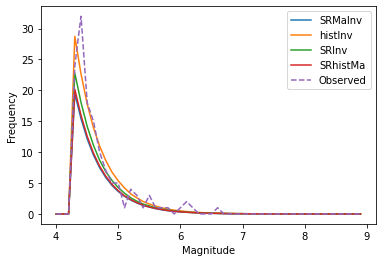

In [160]:
forecast10_names = ["SRMaInv", "histInv", "SRInv", "SRhistMa"]
magnitude_comps(forecast_cats10, forecast10_names, italy_cat_1121, "10yrMag_full.pdf")

After ten years, our FMD is approaching what our forecasts think it should - the sample is large enough that we actually start to approach GR
* Should we test how close we get to large events? How many forecasts get the largest events right? What's the difference in magnitude between the largest event in our forecasts and the largest observed event?

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


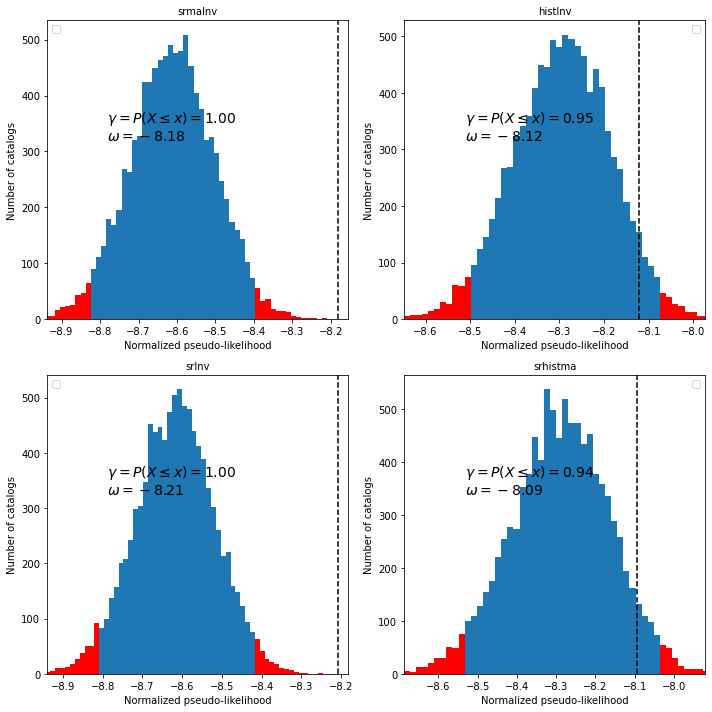

<Figure size 432x288 with 0 Axes>

In [163]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_spatial_test(STestCat10[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_spatial_test(STestCat10[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_spatial_test(STestCat10[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_spatial_test(STestCat10[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()
plt.savefig("10year_spat_models.pdf")

The historical models are once again doing better in the 10 year tests, but why?
These is the full (undeclustered) catalogue - are we seeing the hist models do well because they expect more clustering than our models made only with declustered catalogues?

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


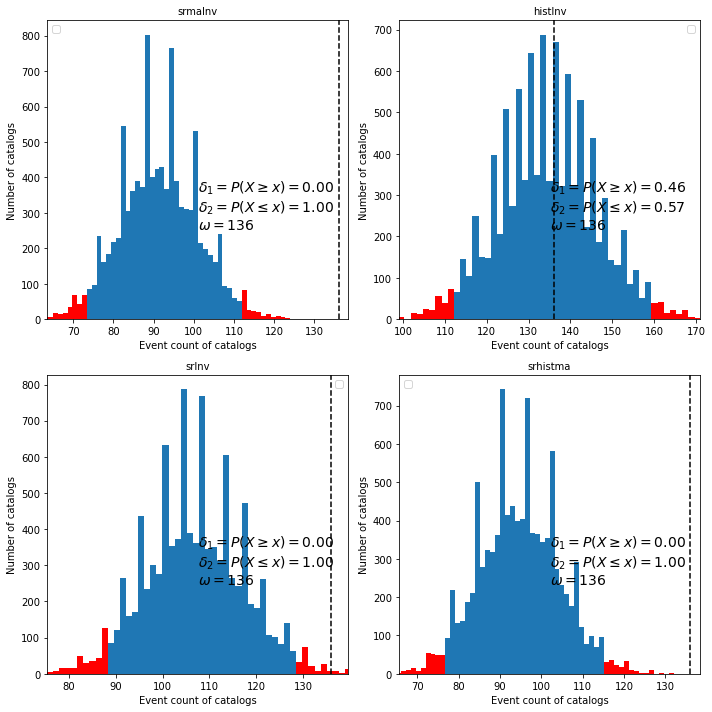

In [164]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_number_test(NTestCat10[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_number_test(NTestCat10[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_number_test(NTestCat10[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_number_test(NTestCat10[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


Only histInv does well on N-test here, but that's only because it has too many events!

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


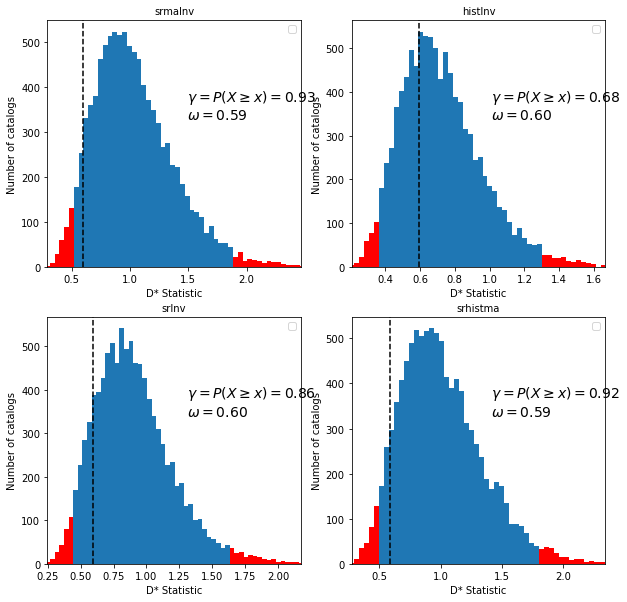

In [165]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_magnitude_test(MTestCat10[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_magnitude_test(MTestCat10[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_magnitude_test(MTestCat10[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_magnitude_test(MTestCat10[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


Now all the models do better in magnitude - this makes sense if we look at the mag_comp earlier. Over longer time periods, magnitudes approach GR better than on 1 year cats

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


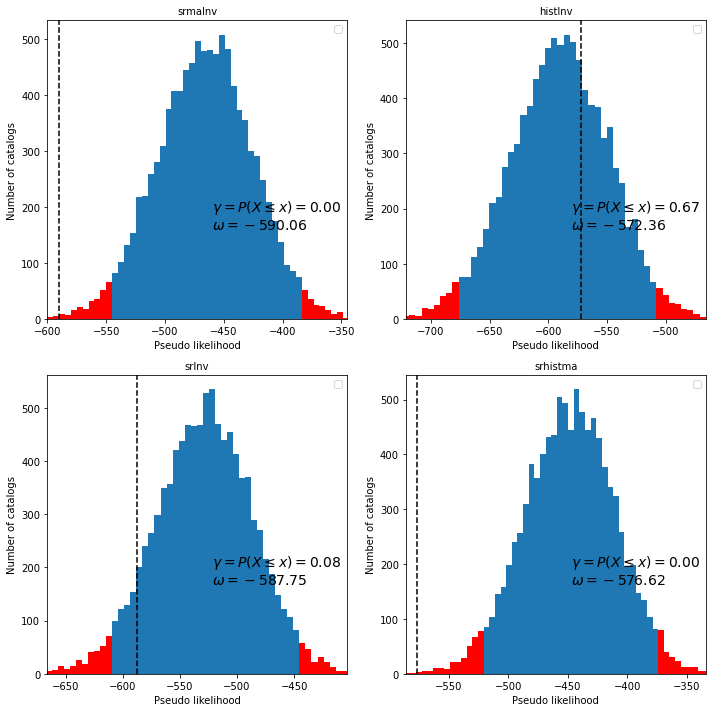

In [166]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_likelihood_test(LTestCat10[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_likelihood_test(LTestCat10[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_likelihood_test(LTestCat10[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_likelihood_test(LTestCat10[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


SRInv does much better than it really has any right to - the number, spatial and magnitude tests are all bad for this model, but the likelihood is somehow acceptable - what is it seeing that I am not?

In [167]:
italy_test_dec10 = gardner_knopoff_decluster(italy_cat_1121, param="GK")
italy_dec10 = italy_test_dec10[italy_test_dec10["cluster_ref"] == 1]
dec_cat10 = csep.core.catalogs.CSEPCatalog.from_dataframe(italy_dec10, region=space_magnitude_region)

LTestCatD10, MTestCatD10, NTestCatD10, STestCatD10 = alphabet_tests_catalog(forecast_cats10, dec_cat10)

<ipython-input-110-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


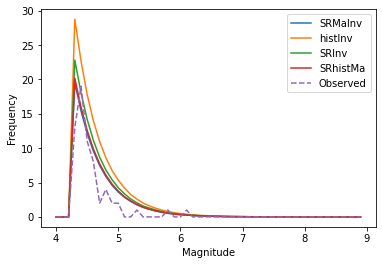

In [168]:
magnitude_comps(forecast_cats10, forecast10_names, dec_cat10, "10yrMag_dec.pdf")

Magnitude test performance should be much better for SRhistMa, SRMaInv and worse for histInv, which is now massively overestimating what's going on...

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


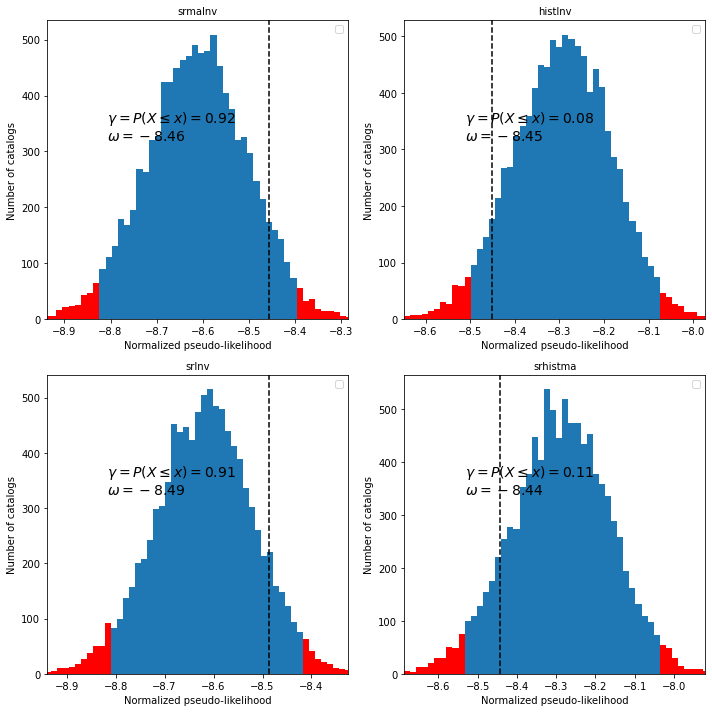

In [170]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_spatial_test(STestCatD10[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_spatial_test(STestCatD10[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_spatial_test(STestCatD10[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_spatial_test(STestCatD10[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

#plt.show()
plt.savefig("10year_dec_res.pdf")

Spatial tests are much better now that we've declustered, but the hist models now do worse, maybe because they anticipate more clustered seismicity?

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


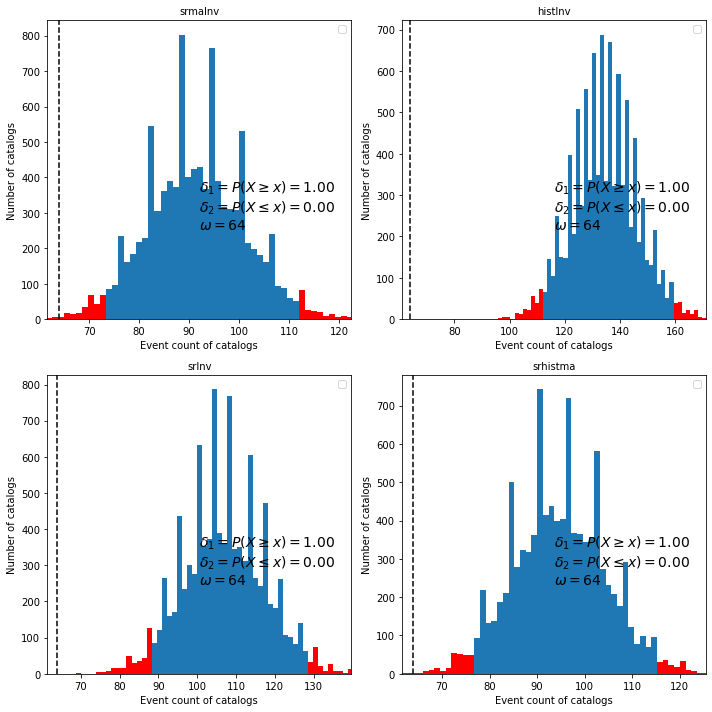

In [171]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_number_test(NTestCatD10[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_number_test(NTestCatD10[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_number_test(NTestCatD10[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_number_test(NTestCatD10[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


BUT now that we've declustered we expect many more events than we have actually observed. 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


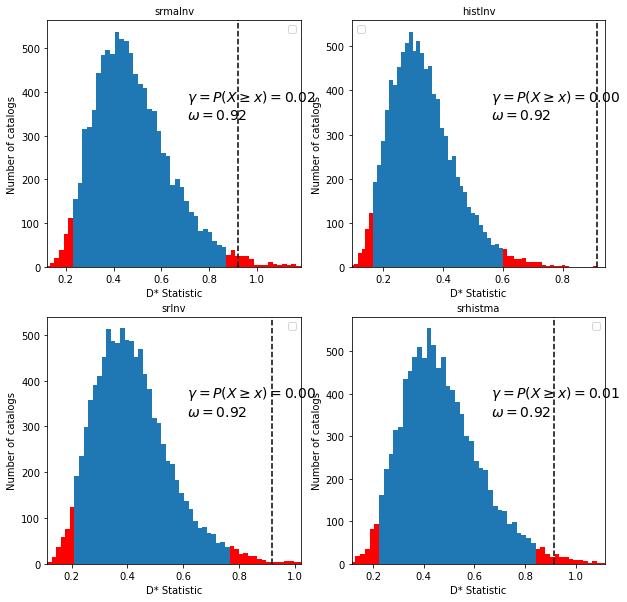

In [172]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_magnitude_test(MTestCatD10[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_magnitude_test(MTestCatD10[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_magnitude_test(MTestCatD10[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_magnitude_test(MTestCatD10[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


As expected histInv is bad, others are in tails - true for M6.9?

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


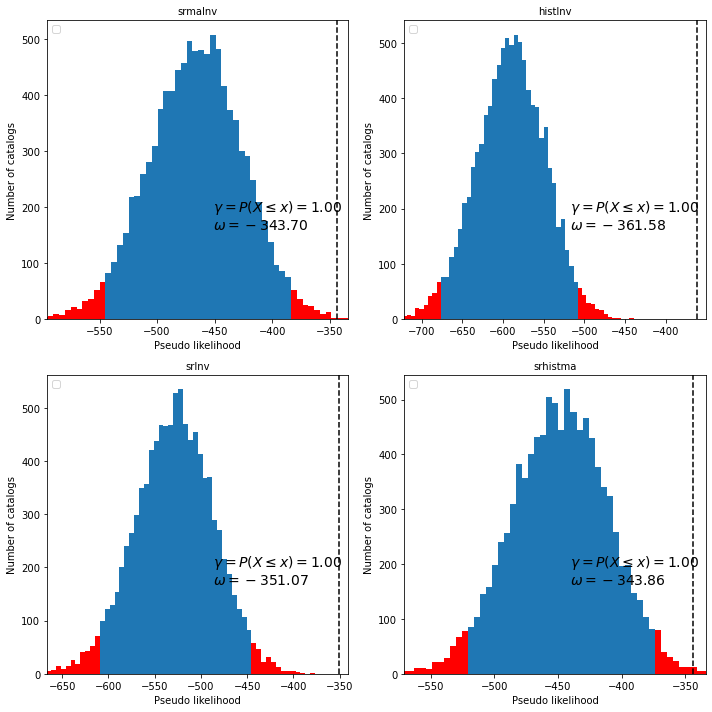

In [173]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_likelihood_test(LTestCatD10[0], plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False, label = True)
csep_plots.plot_likelihood_test(LTestCatD10[1], plot_args={"title": "histInv"}, axes=axs[0,1], show=False, label= True)
csep_plots.plot_likelihood_test(LTestCatD10[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label= True)
csep_plots.plot_likelihood_test(LTestCatD10[3],  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False, label= True)

plt.show()


In [ ]:
So poor likelihood results over ten years

# Multiple 1-year tests

In [39]:
import copy

italy_10yr_catalog = csep.load_catalog("/home/kbayliss/Downloads/Italy_forecasts_Feb2022/EuroMedCentrMomTensors-1645023259641.csv", type="ingv_emrcmt")

start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch('2011-01-01 00:00:00.0')
end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch('2021-01-01 00:00:00.0')

filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
italy_cat_1121 = italy_10yr_catalog.filter(filters)
italy_cat_1121 = italy_cat_1121.filter_spatial(forecast.region)
italy_cat_1121.filter('magnitude >= 4')
italy_cat_1121.get_magnitudes()

times=['2011-01-01 00:00:00.0', '2012-01-01 00:00:00.0', '2013-01-01 00:00:00.0', '2014-01-01 00:00:00.0', '2015-01-01 00:00:00.0', '2016-01-01 00:00:00.0', '2017-01-01 00:00:00.0', '2018-01-01 00:00:00.0', '2019-01-01 00:00:00.0', '2020-01-01 00:00:00.0', '2021-01-01 00:00:00.0']
pl_res=[]

for i in range(len(times)-1):
    cat_copy = copy.deepcopy(italy_cat_1121)
    ## Update time
    start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch(times[i])
    end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch(times[i+1])
    ## filter catalog
    filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
    test_cat = cat_copy.filter(filters)
    cat_copy = cat_copy.filter_spatial(forecast.region)
    cat_copy.filter('magnitude >= 4')
    ## Test forecast for this year
    
    result = catalog_evaluations.pseudolikelihood_test(srhistma_bdecvar, cat_copy, verbose=False)
    pl_res.append(result)

Removed 1 badly formatted events
Removed 0 repeated events


In [40]:
pl_res=[]

def multi_year_tests(forecast_list, times, test_catalog):
    for i in range(len(times)-1):
        print(i)
        cat_copy = copy.deepcopy(test_catalog)
        ## Update time
        start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch(times[i])
        end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch(times[i+1])
        ## filter catalog
        filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
        test_cat = cat_copy.filter(filters)
        cat_copy = cat_copy.filter_spatial(forecast.region)
        ## Should generalise to take in magnitude - what's python equiv of paste??
        cat_copy.filter('magnitude >= 4')
        ## Test forecast for this year
        result = alphabet_tests_catalog(forecast_list, cat_copy)
        pl_res.append(result)
    return pl_res

hwg = multi_year_tests(forecast_cats, times, italy_cat_1121)

0
1
2
3
4
5
6
7
8
9
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 4.0 events after removing 1.0 events.
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 4.0 events after removing 1.0 events.


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Pseudo-likelihood Test'}, xlabel='Pseudo likelihood', ylabel='Number of catalogs'>

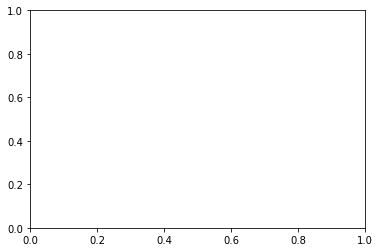

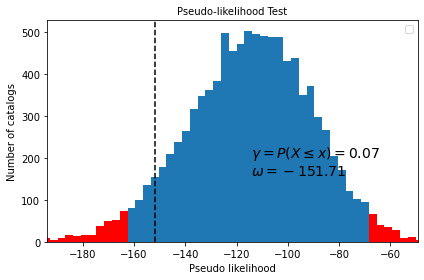

In [176]:
pl_res[4][0][0].plot()
## pl_res[year][test][forecast]
## Also you've just dumped this here... (not hwg?)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


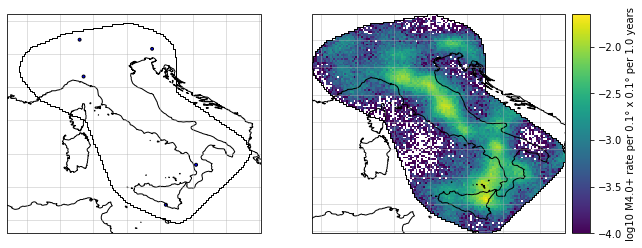

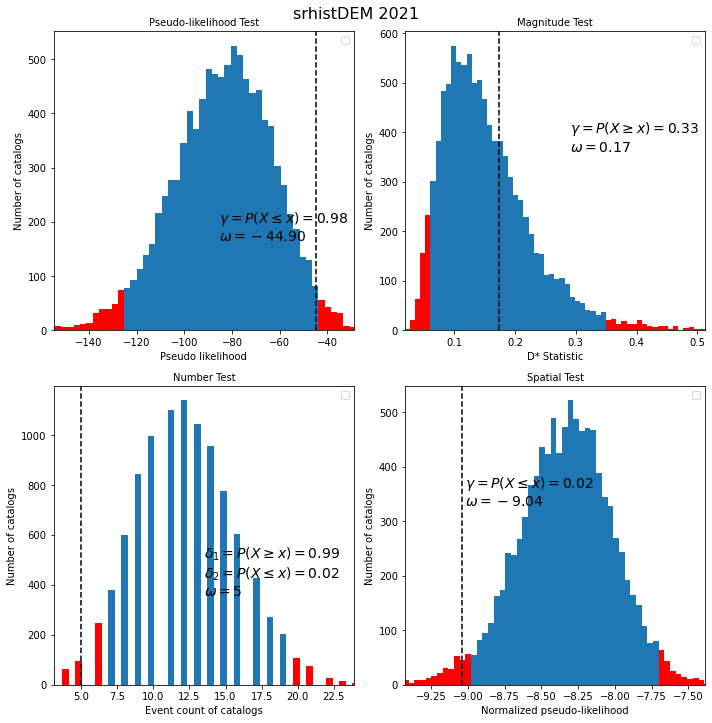

In [41]:
import csep.utils.plots as csep_plots

def plot_forecast_results(year, forecast, forecast_n, test_catalog, fig_title = ""):
        
    italy_cat_year = copy.deepcopy(test_catalog)
    ## Update time
    start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch(times[year])
    end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch(times[year+1])
        ## filter catalog
    filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
    italy_cat_year = italy_cat_year.filter(filters)
    italy_cat_year = italy_cat_year.filter_spatial(forecast.region)
    ## Should generalise to take in magnitude - what's python equiv of paste??
    italy_cat_year.filter('magnitude >= 4')
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()},  figsize=(10,10))
    #italy_cat_2012.plot(extent=None, ax=axs[0,0])
    csep_plots.plot_catalog(italy_cat_year, ax=ax1)
    forecast.expected_rates.plot(ax=ax2)
    
    fig, axs = plt.subplots(2,2, figsize=(10,10))
    csep_plots.plot_likelihood_test(pl_res[year][0][forecast_n], axes=axs[0,0], show=False)
    csep_plots.plot_magnitude_test(pl_res[year][1][forecast_n], axes=axs[0,1], show=False)
    csep_plots.plot_number_test(pl_res[year][2][forecast_n], axes=axs[1,0], show=False)
    csep_plots.plot_spatial_test(pl_res[year][3][forecast_n],  axes=axs[1,1], show=False)
    fig.suptitle(fig_title, fontsize=16, y=1)

## plot results

## This needs to be one figure with all different tests + a plot of the input data

plot_forecast_results(9, srhistDEM_MM6, 4, italy_cat_1121,fig_title = "srhistDEM 2021")


In [42]:
import seaborn as sns
### Now a function that gives me the ten*1 year figures...

def ten_year_test_comp(multiyear_results, forecast_n, plot_title):
    keys= range(10)
    
    pl_dict={}
    m_dict ={}
    n_dict = {}
    s_dict = {}
    
    df_obs_pl = [0]*10
    df_obs_m = [0]*10
    df_obs_n = [0]*10
    df_obs_s = [0]*10
    
    for i in keys:
        pl_dict[i] = multiyear_results[i][0][forecast_n].test_distribution
        m_dict[i] = multiyear_results[i][1][forecast_n].test_distribution
        n_dict[i] = multiyear_results[i][2][forecast_n].test_distribution
        s_dict[i] = multiyear_results[i][3][forecast_n].test_distribution
        
        df_obs_pl[i] = multiyear_results[i][0][forecast_n].observed_statistic
        df_obs_m[i] = multiyear_results[i][1][forecast_n].observed_statistic
        df_obs_n[i] = multiyear_results[i][2][forecast_n].observed_statistic
        df_obs_s[i] = multiyear_results[i][3][forecast_n].observed_statistic
            
    df_pl = pd.DataFrame(pl_dict)
    df_m = pd.DataFrame(m_dict)
    df_n = pd.DataFrame(n_dict)
    df_s = pd.DataFrame(s_dict)
    
    year=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
    pl_obs_df = pd.DataFrame(list(zip(df_obs_pl, year)),
                            columns =['obs', 'year'])
    m_obs_df = pd.DataFrame(list(zip(df_obs_m, year)),
                            columns =['obs', 'year'])
    n_obs_df = pd.DataFrame(list(zip(df_obs_n, year)),
                            columns =['obs', 'year'])
    s_obs_df = pd.DataFrame(list(zip(df_obs_s, year)),
                            columns =['obs', 'year'])
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 5), sharex=True)

    fig.suptitle(plot_title)
   
    sns.boxenplot(ax=axes[0, 0], data=df_pl, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "Pseudolikelihood results")
    sns.stripplot(ax=axes[0, 0], x="year", y="obs", data= pl_obs_df, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')
 
    sns.boxenplot(ax=axes[0,1], data=df_m, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "magnitude results")
    sns.stripplot(ax=axes[0,1], x="year", y="obs", data= m_obs_df, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')
    
    sns.boxenplot(ax=axes[1, 0], data=df_n, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "number results")
    sns.stripplot(ax=axes[1, 0], x="year", y="obs", data= n_obs_df, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

    sns.boxenplot(ax=axes[1,1], data=df_s, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results")
    sns.stripplot(ax=axes[1,1], x="year", y="obs", data= s_obs_df, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')
    
    fig.tight_layout()

    

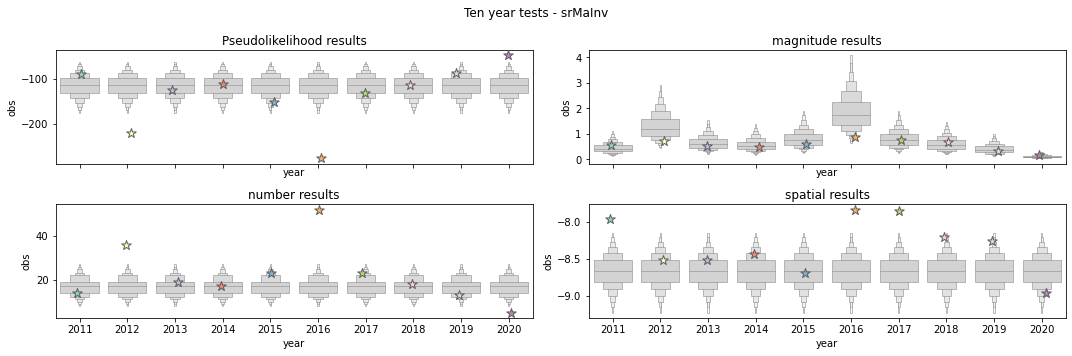

In [68]:
ten_year_test_comp(pl_res,0, "Ten year tests - srMaInv")

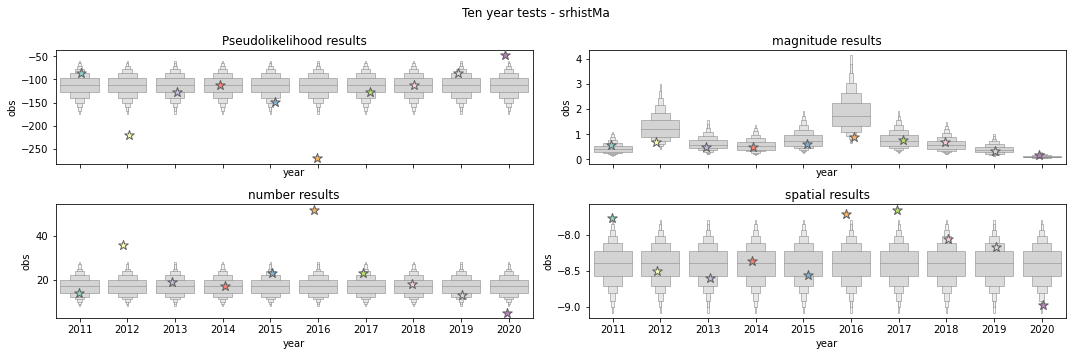

In [180]:
ten_year_test_comp(pl_res,3, "Ten year tests - srhistMa")

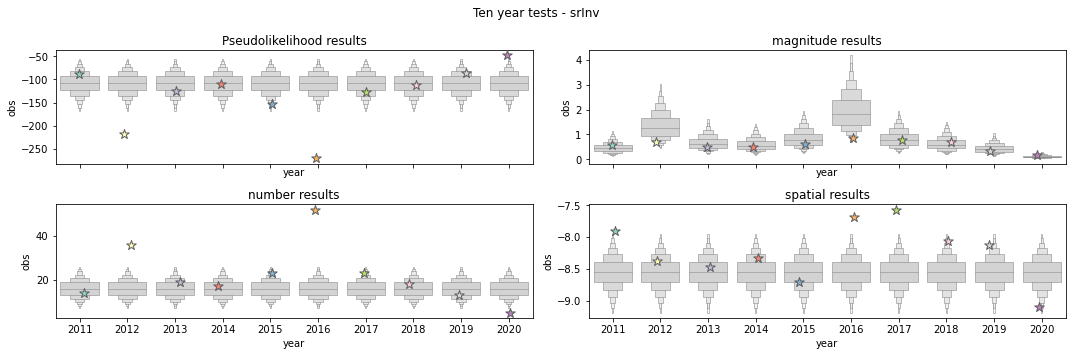

In [181]:
ten_year_test_comp(pl_res,2, "Ten year tests - srInv")

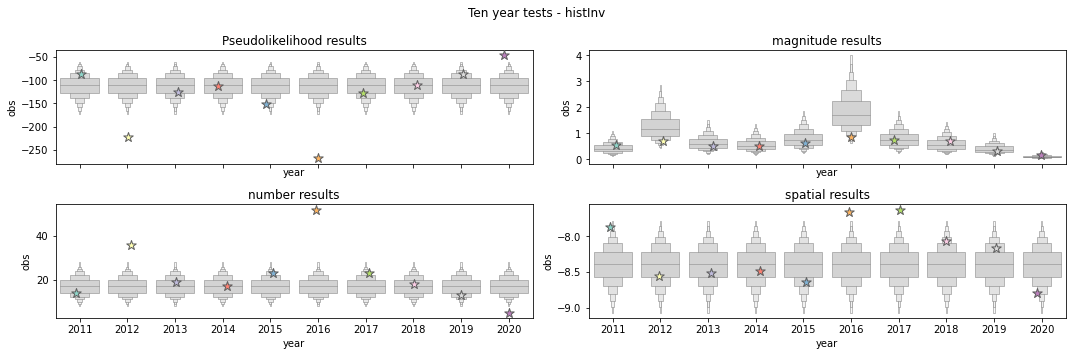

In [182]:
ten_year_test_comp(pl_res,1, "Ten year tests - histInv")

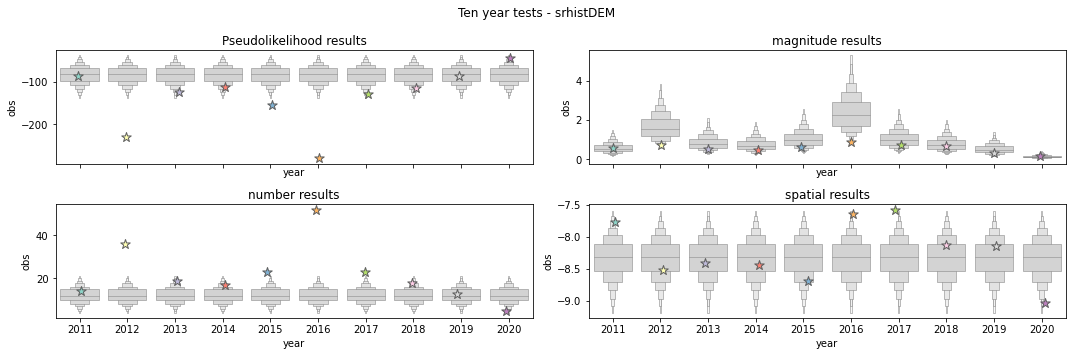

In [183]:
ten_year_test_comp(pl_res,4, "Ten year tests - srhistDEM")

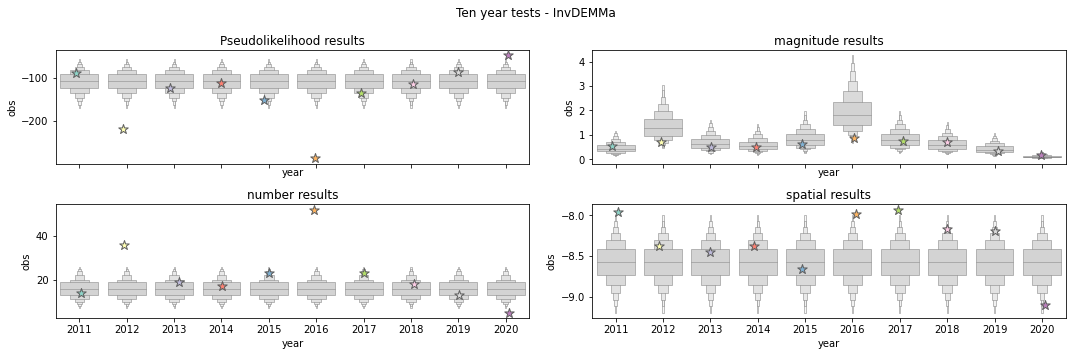

In [184]:
ten_year_test_comp(pl_res,5, "Ten year tests - InvDEMMa")

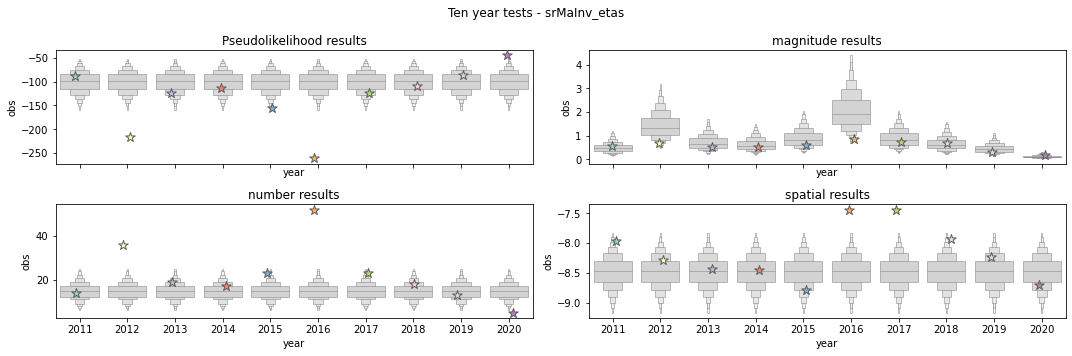

In [185]:
ten_year_test_comp(pl_res,6, "Ten year tests - srMaInv_etas")

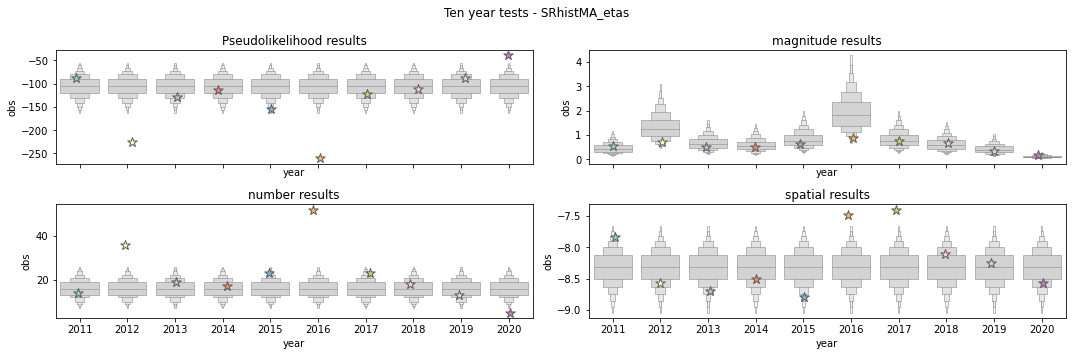

In [186]:
ten_year_test_comp(pl_res,7, "Ten year tests - SRhistMA_etas")

Now figure this out for all data + with yearly updating of input catalogs...

In [43]:


def multi_year_tests_dec(forecast_list, times, test_catalog):
    pl_res=[]
    for i in range(len(times)-1):
        print(i)
        cat_copy = copy.deepcopy(test_catalog)
        ## Update time
        start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch(times[i])
        end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch(times[i+1])
        ## filter catalog
        filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
        test_cat = cat_copy.filter(filters)
        cat_copy = cat_copy.filter_spatial(forecast.region)
        ## Should generalise to take in magnitude - what's python equiv of paste??
        cat_copy.filter('magnitude >= 4')
        italy_test_dec = gardner_knopoff_decluster(cat_copy, param="GK")
        italy_dec = italy_test_dec[italy_test_dec["cluster_ref"] == 1]
        dec_cat = csep.core.catalogs.CSEPCatalog.from_dataframe(italy_dec, region=forecast.region)
        ## Test forecast for this year
        result = alphabet_tests_catalog(forecast_list, dec_cat)
        pl_res.append(result)
    return pl_res

hwg = multi_year_tests_dec(forecast_cats, times, italy_cat_1121)



0


<ipython-input-31-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


1


<ipython-input-31-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


2


<ipython-input-31-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


3


<ipython-input-31-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


4


<ipython-input-31-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


5


<ipython-input-31-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


6


<ipython-input-31-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


7


<ipython-input-31-1ccb23ace63d>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcat['cluster_ref'][ms_ref] = 1


8
9
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 4.0 events after removing 1.0 events.
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 4.0 events after removing 1.0 events.


This takes longer because it's literally running the declustering on every ten year set, but it would be faster (and probably etter from a declustering point of view) to do the long time period and then crop.

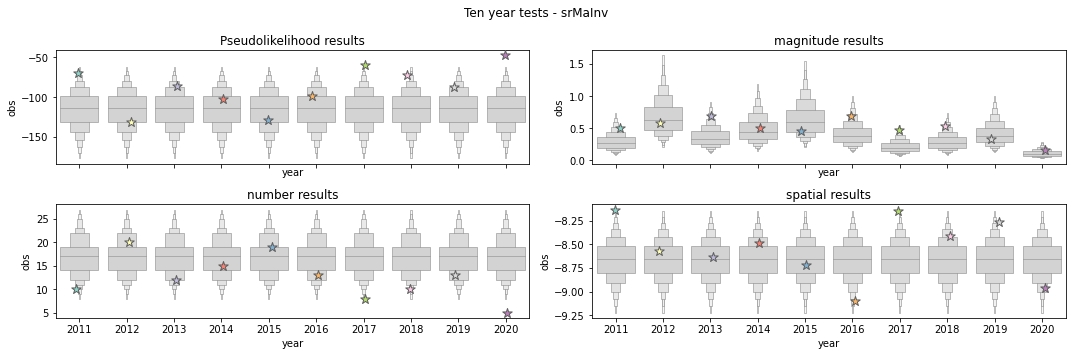

In [72]:
ten_year_test_comp(hwg, 0, "Ten year tests - srMaInv")

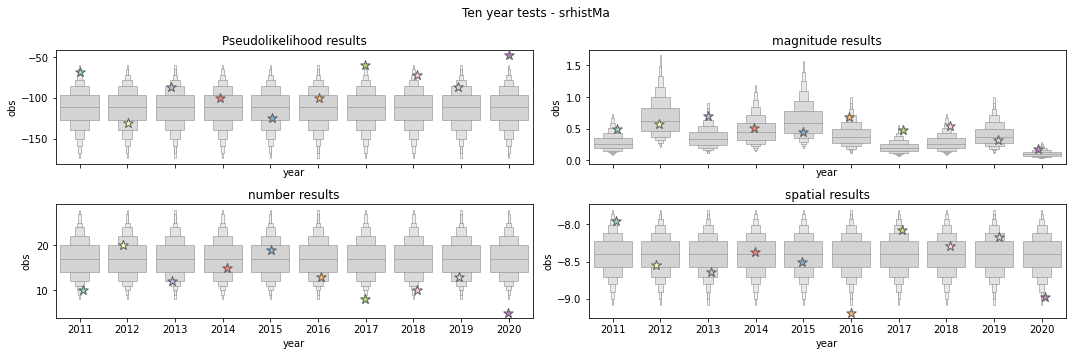

In [201]:
ten_year_test_comp(hwg,3, "Ten year tests - srhistMa")

Spatial performance is quite different for these 2 forecasts in 2013 in particular.
In declustered catalogue tests, the worst years are 2012 and 2015 - years with higher numbers of events.

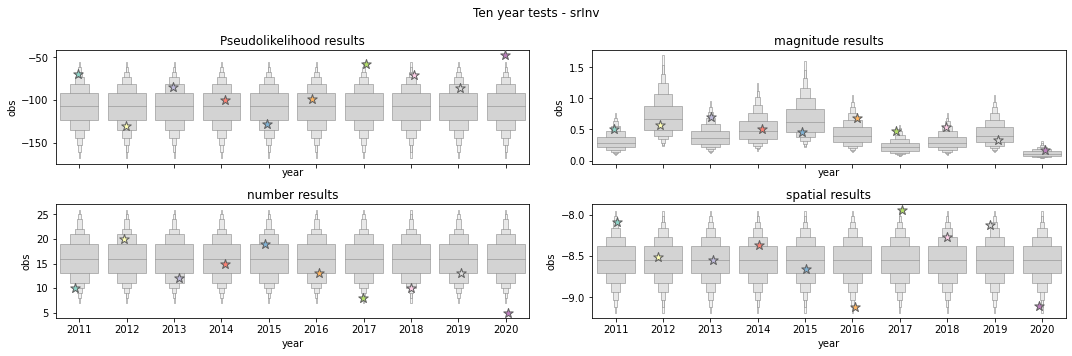

In [202]:
ten_year_test_comp(hwg,2, "Ten year tests - srInv")

SrInv has higher number of expected events -> does better in 2012 and 2015 -> does better in PL test
Spatial results for SRInv are really nice from 2012-2015 and not great after that...

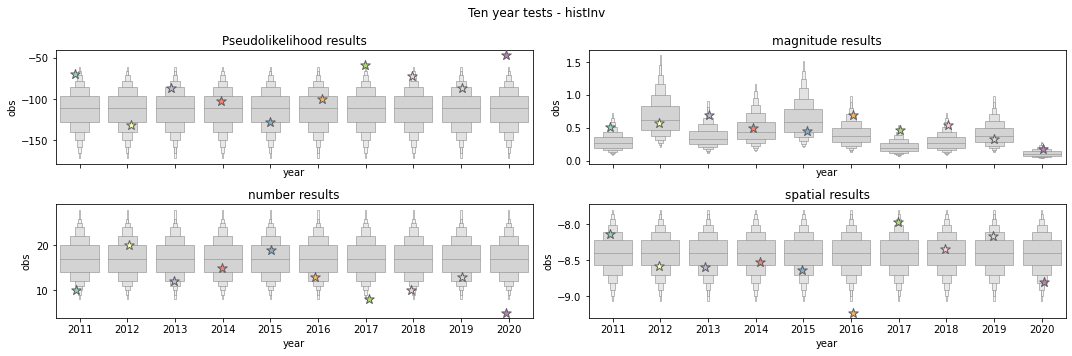

In [203]:
ten_year_test_comp(hwg,1, "Ten year tests - histInv")

histInv kind of all over the place!
Does best spatially in years 2017 and 2018.

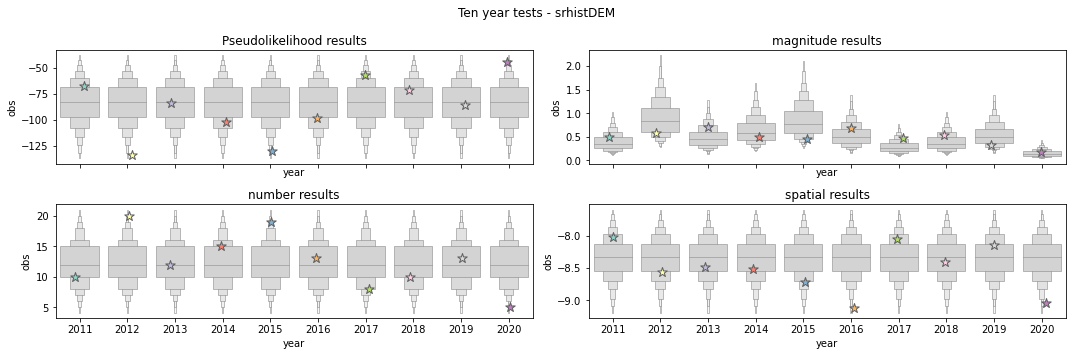

In [204]:
ten_year_test_comp(hwg, 4, "Ten year tests - srhistDEM")

SRhistDem is never really very good spatially - always in tails of likelihood distro

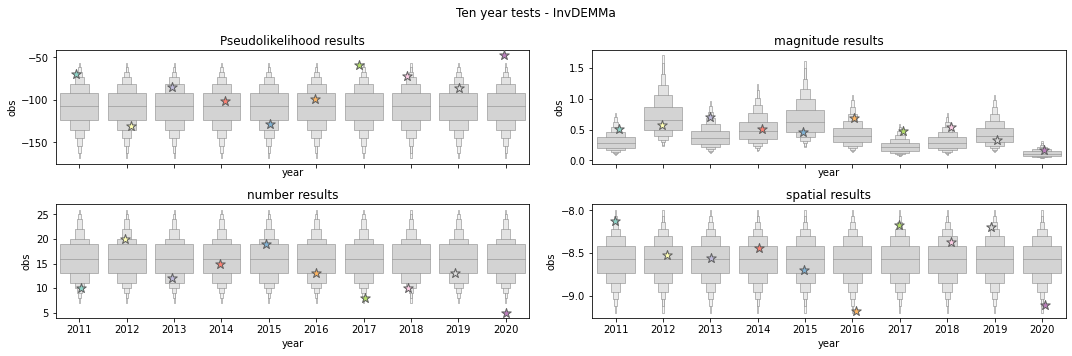

In [205]:
ten_year_test_comp(hwg,5, "Ten year tests - InvDEMMa")

Is it Inv that helps models do well in 2012 and 2013? I want to say that it's not doing it on it's own - clearly some other influence on this (combo of hist + whatever needs to be right?)

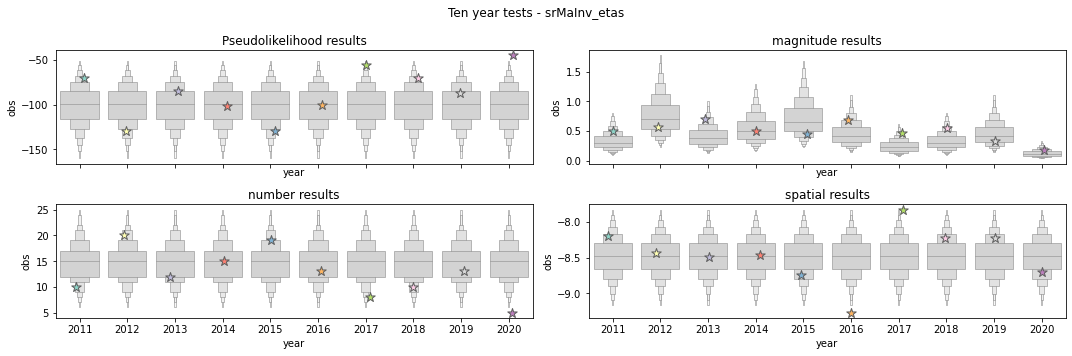

In [206]:
ten_year_test_comp(hwg, 6, "Ten year tests - srMaInv_etas")

srMaInv -etas does well in 2012-2014, badly in 2016 and 2017, otherwise OK
Compared to GK declustering, the ETAS declustering made the spatial pattern worse and the number better (GK underests in 2012, 2015)

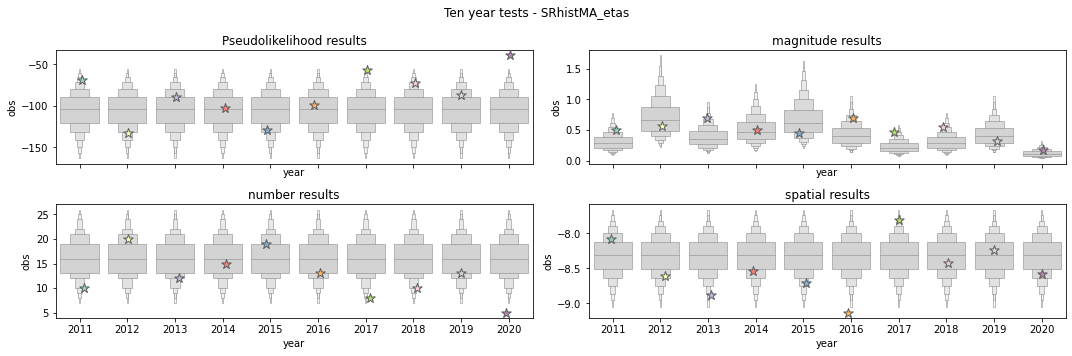

In [208]:
ten_year_test_comp(hwg, 7, "Ten year tests - SRhistMA_etas")

NameError: name 'annotate_axes' is not defined

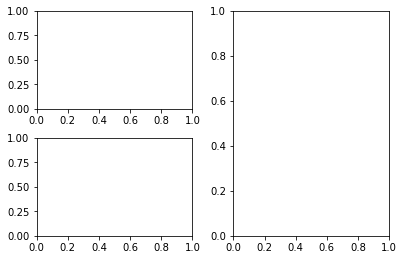

In [44]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(5.5, 3.5), constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')


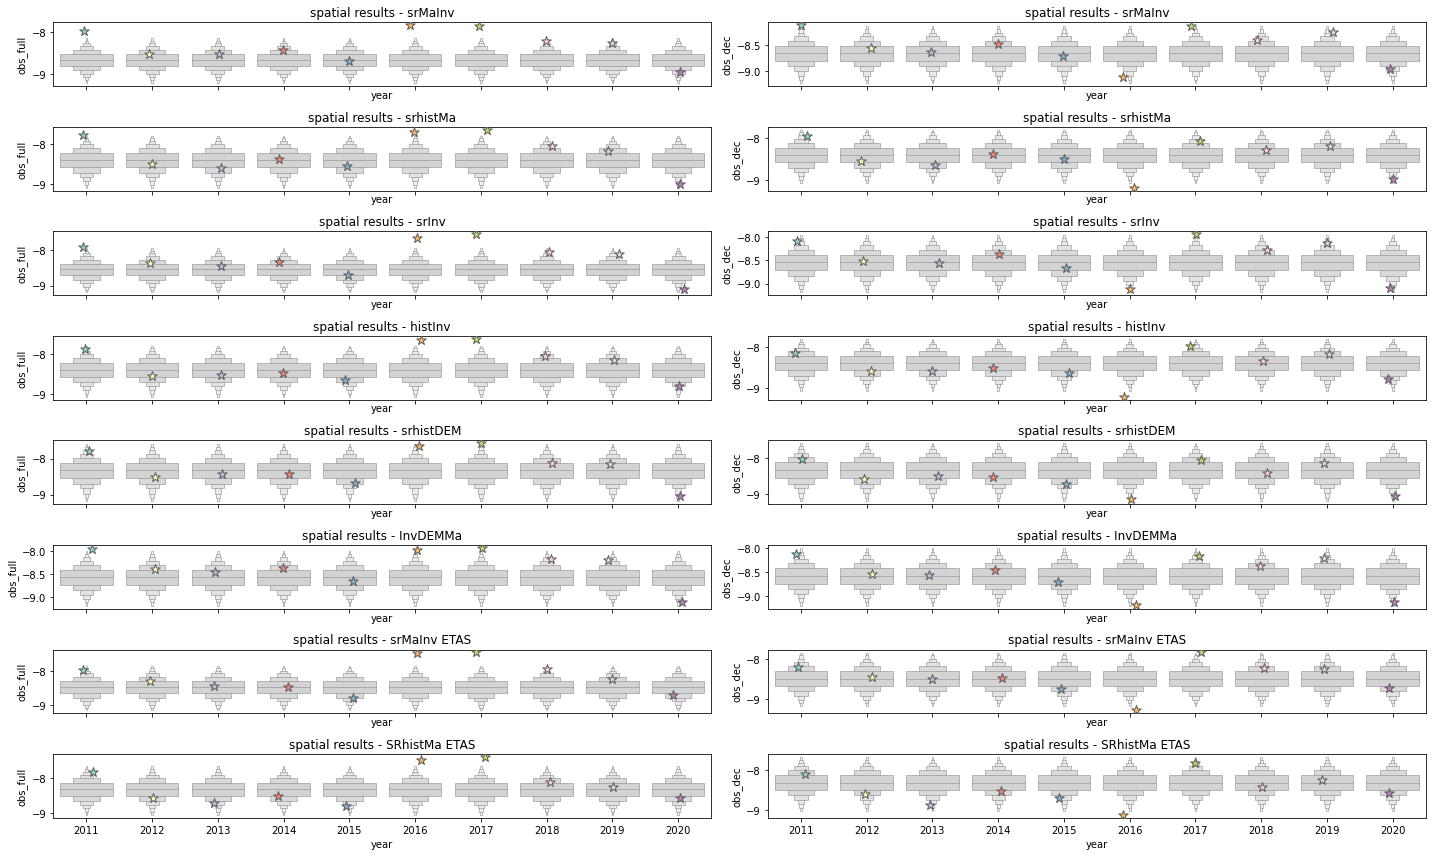

In [45]:
nsamples = 10

    
keys= range(nsamples)
    
s_dict_f1={}
s_dict_f2 ={}
s_dict_f3 = {}
s_dict_f4 = {}
s_dict_f5={}
s_dict_f6 ={}
s_dict_f7 = {}
s_dict_f8 = {}
    
df_obs_f1 = [0]*nsamples
df_obs_f2 = [0]*nsamples
df_obs_f3 = [0]*nsamples
df_obs_f4 = [0]*nsamples
df_obs_f5 = [0]*nsamples
df_obs_f6 = [0]*nsamples
df_obs_f7 = [0]*nsamples
df_obs_f8 = [0]*nsamples


s_dict_df1={}
s_dict_df2 ={}
s_dict_df3 = {}
s_dict_df4 = {}
s_dict_df5={}
s_dict_df6 ={}
s_dict_df7 = {}
s_dict_df8 = {}
    
df_obs_df1 = [0]*nsamples
df_obs_df2 = [0]*nsamples
df_obs_df3 = [0]*nsamples
df_obs_df4 = [0]*nsamples
df_obs_df5 = [0]*nsamples
df_obs_df6 = [0]*nsamples
df_obs_df7 = [0]*nsamples
df_obs_df8 = [0]*nsamples



for i in keys:
    
    s_dict_f1[i] = pl_res[i][3][0].test_distribution
    df_obs_f1[i] = pl_res[i][3][0].observed_statistic

    s_dict_f2[i] = pl_res[i][3][3].test_distribution
    df_obs_f2[i] = pl_res[i][3][3].observed_statistic

    s_dict_f3[i] = pl_res[i][3][2].test_distribution
    df_obs_f3[i] = pl_res[i][3][2].observed_statistic

    s_dict_f4[i] = pl_res[i][3][1].test_distribution
    df_obs_f4[i] = pl_res[i][3][1].observed_statistic
    
    s_dict_f5[i] = pl_res[i][3][4].test_distribution
    df_obs_f5[i] = pl_res[i][3][4].observed_statistic

    s_dict_f6[i] = pl_res[i][3][5].test_distribution
    df_obs_f6[i] = pl_res[i][3][5].observed_statistic

    s_dict_f7[i] = pl_res[i][3][6].test_distribution
    df_obs_f7[i] = pl_res[i][3][6].observed_statistic

    s_dict_f8[i] = pl_res[i][3][7].test_distribution
    df_obs_f8[i] = pl_res[i][3][7].observed_statistic
            

df_s1 = pd.DataFrame(s_dict_f1)
df_s2 = pd.DataFrame(s_dict_f2)
df_s3 = pd.DataFrame(s_dict_f3)
df_s4 = pd.DataFrame(s_dict_f4)
df_s5 = pd.DataFrame(s_dict_f5)
df_s6 = pd.DataFrame(s_dict_f6)
df_s7 = pd.DataFrame(s_dict_f7)
df_s8 = pd.DataFrame(s_dict_f8)

for i in keys:
    
    s_dict_df1[i] = hwg[i][3][0].test_distribution
    df_obs_df1[i] = hwg[i][3][0].observed_statistic

    s_dict_df2[i] = hwg[i][3][3].test_distribution
    df_obs_df2[i] = hwg[i][3][3].observed_statistic

    s_dict_df3[i] = hwg[i][3][2].test_distribution
    df_obs_df3[i] = hwg[i][3][2].observed_statistic

    s_dict_df4[i] = hwg[i][3][1].test_distribution
    df_obs_df4[i] = hwg[i][3][1].observed_statistic
    
    s_dict_df5[i] = hwg[i][3][4].test_distribution
    df_obs_df5[i] = hwg[i][3][4].observed_statistic

    s_dict_df6[i] = hwg[i][3][5].test_distribution
    df_obs_df6[i] = hwg[i][3][5].observed_statistic

    s_dict_df7[i] = hwg[i][3][6].test_distribution
    df_obs_df7[i] = hwg[i][3][6].observed_statistic

    s_dict_df8[i] = hwg[i][3][7].test_distribution
    df_obs_df8[i] = hwg[i][3][7].observed_statistic
            

df_ds1 = pd.DataFrame(s_dict_df1)
df_ds2 = pd.DataFrame(s_dict_df2)
df_ds3 = pd.DataFrame(s_dict_df3)
df_ds4 = pd.DataFrame(s_dict_df4)
df_ds5 = pd.DataFrame(s_dict_df5)
df_ds6 = pd.DataFrame(s_dict_df6)
df_ds7 = pd.DataFrame(s_dict_df7)
df_ds8 = pd.DataFrame(s_dict_df8)

year=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
#sample_no = [str(i) for i in range(1, ns)]
    
s_obs_df1 = pd.DataFrame(list(zip(df_obs_f1,df_obs_df1, year)),
                        columns =['obs_full', 'obs_dec', 'year'])
s_obs_df2 = pd.DataFrame(list(zip(df_obs_f2, df_obs_df2, year)),
                        columns =['obs_full', 'obs_dec', 'year'])
s_obs_df3 = pd.DataFrame(list(zip(df_obs_f3, df_obs_df3, year)),
                        columns =['obs_full', 'obs_dec', 'year'])
s_obs_df4 = pd.DataFrame(list(zip(df_obs_f4, df_obs_df4, year)),
                        columns =['obs_full', 'obs_dec', 'year'])
s_obs_df5 = pd.DataFrame(list(zip(df_obs_f5, df_obs_df5, year)),
                        columns =['obs_full', 'obs_dec', 'year'])
s_obs_df6 = pd.DataFrame(list(zip(df_obs_f6, df_obs_df6, year)),
                        columns =['obs_full', 'obs_dec', 'year'])
s_obs_df7 = pd.DataFrame(list(zip(df_obs_f7, df_obs_df7, year)),
                        columns =['obs_full', 'obs_dec', 'year'])
s_obs_df8 = pd.DataFrame(list(zip(df_obs_f8,df_obs_df8, year)),
                        columns =['obs_full', 'obs_dec', 'year'])
    
fig, axes = plt.subplots(8, 2, figsize=(20, 12), sharex=True)

#fig.suptitle(plot_title)

sns.boxenplot(ax=axes[0, 0], data=df_s1, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srMaInv")
sns.stripplot(ax=axes[0, 0], x="year", y="obs_full", data= s_obs_df1, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[0, 1], data=df_ds1, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srMaInv")
sns.stripplot(ax=axes[0, 1], x="year", y="obs_dec", data= s_obs_df1, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[1, 0], data=df_s2, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srhistMa")
sns.stripplot(ax=axes[1, 0], x="year", y="obs_full", data= s_obs_df2, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[1, 1], data=df_ds2, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srhistMa")
sns.stripplot(ax=axes[1, 1], x="year", y="obs_dec", data= s_obs_df2, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[2, 0], data=df_s3, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srInv")
sns.stripplot(ax=axes[2, 0], x="year", y="obs_full", data= s_obs_df3, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[2, 1], data=df_ds3, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srInv")
sns.stripplot(ax=axes[2, 1], x="year", y="obs_dec", data= s_obs_df3, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[3, 0], data=df_s4, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - histInv")
sns.stripplot(ax=axes[3, 0], x="year", y="obs_full", data= s_obs_df4, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[3, 1], data=df_ds4, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - histInv")
sns.stripplot(ax=axes[3, 1], x="year", y="obs_dec", data= s_obs_df4, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[4, 0], data=df_s5, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srhistDEM")
sns.stripplot(ax=axes[4, 0], x="year", y="obs_full", data= s_obs_df5, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[4, 1], data=df_ds5, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srhistDEM")
sns.stripplot(ax=axes[4, 1], x="year", y="obs_dec", data= s_obs_df5, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[5, 0], data=df_s6, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - InvDEMMa")
sns.stripplot(ax=axes[5, 0], x="year", y="obs_full", data= s_obs_df6, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[5, 1], data=df_ds6, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - InvDEMMa")
sns.stripplot(ax=axes[5, 1], x="year", y="obs_dec", data= s_obs_df6, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[6, 0], data=df_s7, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srMaInv ETAS")
sns.stripplot(ax=axes[6, 0], x="year", y="obs_full", data= s_obs_df7, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[6, 1], data=df_ds7, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srMaInv ETAS")
sns.stripplot(ax=axes[6, 1], x="year", y="obs_dec", data= s_obs_df7, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[7, 0], data=df_s8, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - SRhistMa ETAS")
sns.stripplot(ax=axes[7, 0], x="year", y="obs_full", data= s_obs_df8, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[7, 1], data=df_ds8, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - SRhistMa ETAS")
sns.stripplot(ax=axes[7, 1], x="year", y="obs_dec", data= s_obs_df8, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')


fig.tight_layout()

fig.savefig("10year_spattests_full_dec.pdf")    

## Updated models (2011-2020 data)

In [41]:
start_date = time_utils.strptime_to_utc_datetime('2020-01-01 00:00:00.0')
end_date = time_utils.strptime_to_utc_datetime('2021-01-01 00:00:00.0')


min_mw = 4.0
max_mw = 8.95
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = regions.magnitude_bins(min_mw, max_mw, dmw)

region = regions.italy_csep_region()

# Bind region information to the forecast (this will be used for binning of the catalogs)
space_magnitude_region = regions.create_space_magnitude_region(region, magnitudes)



SRInv_2 = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_forecasts_Feb2022/Forecasts/SRInv_Apr22.txt",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

SlipDEM = csep.load_catalog_forecast("/home/kbayliss/Downloads/Italy_forecasts_Feb2022/Forecasts/SlipDEM_Apr22.txt",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)


In [42]:
italy_10yr_catalog = csep.load_catalog("/home/kbayliss/Downloads/Italy_forecasts_Feb2022/EuroMedCentrMomTensors-1645023259641.csv", type="ingv_emrcmt")

italy_10yr_catalog = italy_10yr_catalog.filter_spatial(forecast.region)

italy_10yr_catalog.get_magnitudes()
italy_10yr_catalog.magnitude_counts()


Removed 1 badly formatted events
Removed 0 repeated events


array([ 22.,  29.,  33.,  24.,  32.,  18.,  15.,  10.,   7.,   5.,   5.,
         1.,   4.,   3.,   1.,   3.,   1.,   1.,   1.,   0.,   1.,   2.,
         1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.])

In [282]:
start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch('2020-01-01 00:00:00.0')
end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch('2021-01-01 00:00:00.0')

filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
italy_cat_1121 = italy_10yr_catalog.filter(filters)
italy_cat_1121 = italy_cat_1121.filter_spatial(forecast.region)
italy_cat_1121.filter(f'magnitude >= {min_mw}')
italy_cat_1121.get_magnitudes()

array([ 4.46,  4.31,  4.01,  4.21,  4.51])

In [283]:
## Make a list of forecasts
forecast_cats_21 = [SlipDEM, SRInv_2, SRIFD_bdecvar]

## Then run all the tests
LTestCat, MTestCat, NTestCat, STestCat = alphabet_tests_catalog(forecast_cats_21, italy_cat_1121)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


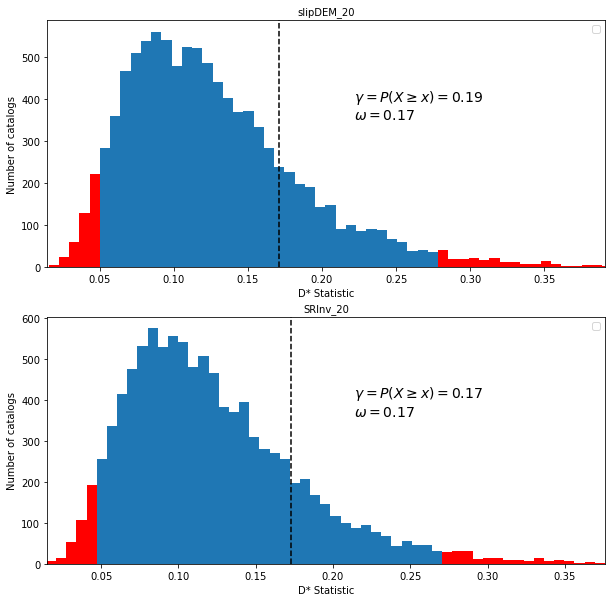

In [284]:
import csep.utils.plots as csep_plots
fig, axs = plt.subplots(2,1, figsize=(10,10))

csep_plots.plot_magnitude_test(MTestCat[0], plot_args={"title": "slipDEM_20" }, axes=axs[0], show=False, label = True)
csep_plots.plot_magnitude_test(MTestCat[1], plot_args={"title": "SRInv_20"}, axes=axs[1], show=False, label= True)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


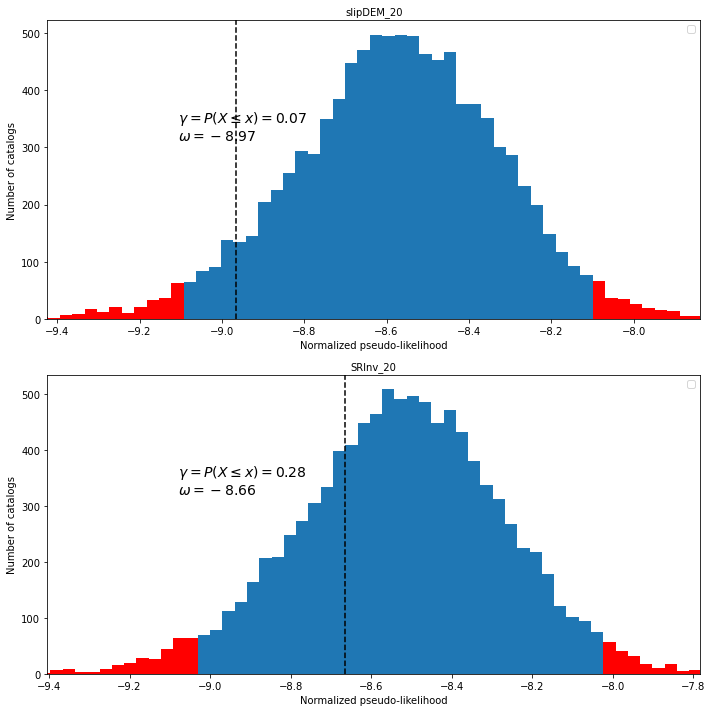

In [285]:
fig, axs = plt.subplots(2,1, figsize=(10,10))

csep_plots.plot_spatial_test(STestCat[0], plot_args={"title": "slipDEM_20" }, axes=axs[0], show=False, label = True)
csep_plots.plot_spatial_test(STestCat[1], plot_args={"title": "SRInv_20"}, axes=axs[1], show=False, label= True)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


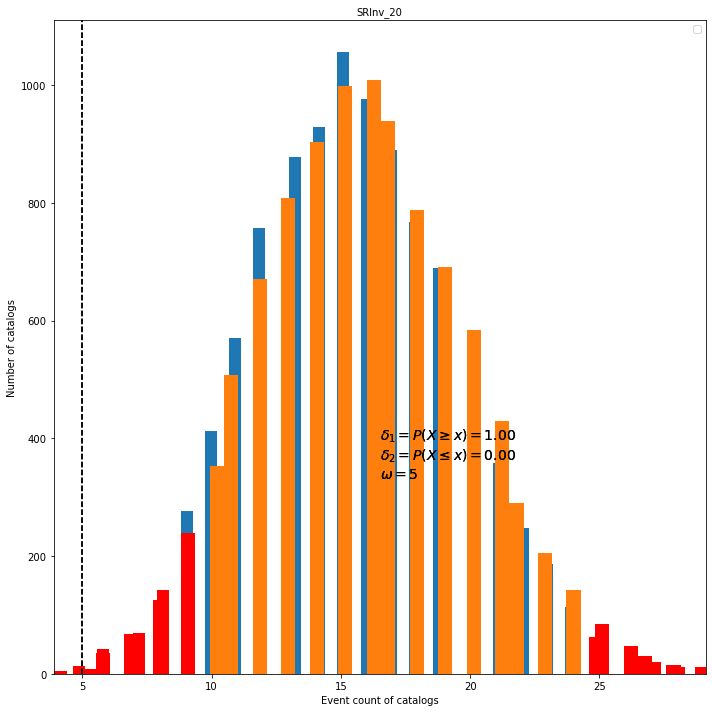

In [286]:
fig, axs = plt.subplots(1, figsize=(10,10))

#csep_plots.plot_number_test(NTestCat[0], plot_args={"title": "slipDEM_20" }, axes=axs[0], show=False, label = True)
csep_plots.plot_number_test(NTestCat[1], plot_args={"title": "SRInv_10"}, axes=axs, show=False, label= True)
csep_plots.plot_number_test(NTestCat[2], plot_args={"title": "SRInv_20"}, axes=axs, show=False, label= True)


plt.show()

SR_Inv_20 (orange) has lower event counts - hist shifted to smaller number of events

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


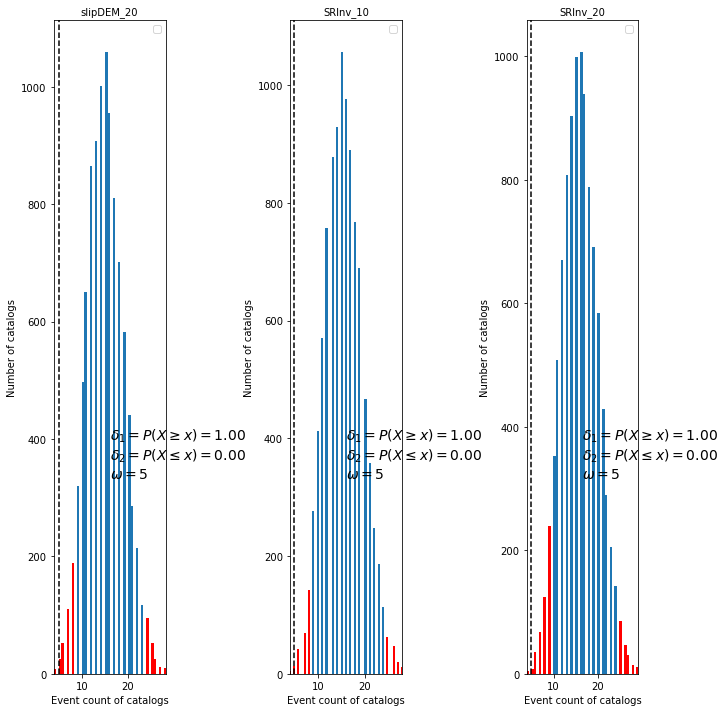

In [287]:
fig, axs = plt.subplots(1, 3, figsize=(10,10))

csep_plots.plot_number_test(NTestCat[0], plot_args={"title": "slipDEM_20" }, axes=axs[0], show=False, label = True)
csep_plots.plot_number_test(NTestCat[1], plot_args={"title": "SRInv_10"}, axes=axs[1], show=False, label= True)
csep_plots.plot_number_test(NTestCat[2], plot_args={"title": "SRInv_20"}, axes=axs[2], show=False, label= True)


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


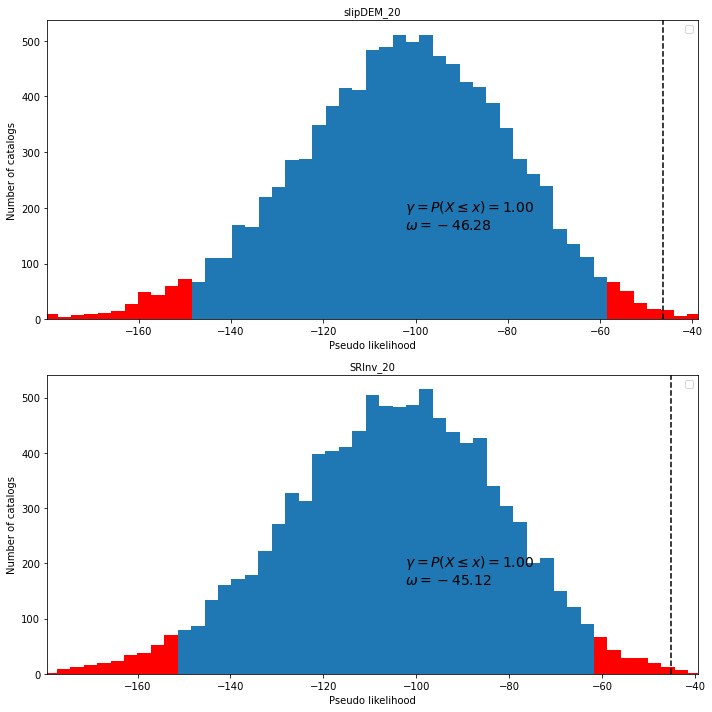

In [288]:
fig, axs = plt.subplots(2,1, figsize=(10,10))

csep_plots.plot_likelihood_test(LTestCat[0], plot_args={"title": "slipDEM_20" }, axes=axs[0], show=False, label = True)
csep_plots.plot_likelihood_test(LTestCat[1], plot_args={"title": "SRInv_20"}, axes=axs[1], show=False, label= True)

plt.show()

So we are suffering in pseudolikelihood tests when we do well in space and even magnitude but not the number of events. This isn't really surprising but it does illustrate a shortcoming of this approach similar to that of the original L-test. 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:title={'center':'SRInv_10'}, xlabel='D* Statistic', ylabel='Number of catalogs'>

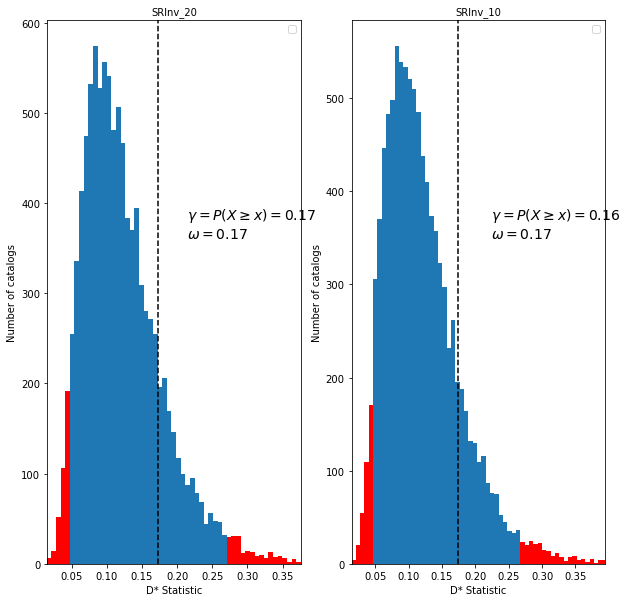

In [289]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
csep_plots.plot_magnitude_test(MTestCat[1], plot_args={"title": "SRInv_20" }, axes=axs[0], show=False, label = True)
csep_plots.plot_magnitude_test(MTestCat[2], plot_args={"title": "SRInv_10"}, axes=axs[1], show=False, label= True)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:title={'center':'SRInv_10'}, xlabel='Pseudo likelihood', ylabel='Number of catalogs'>

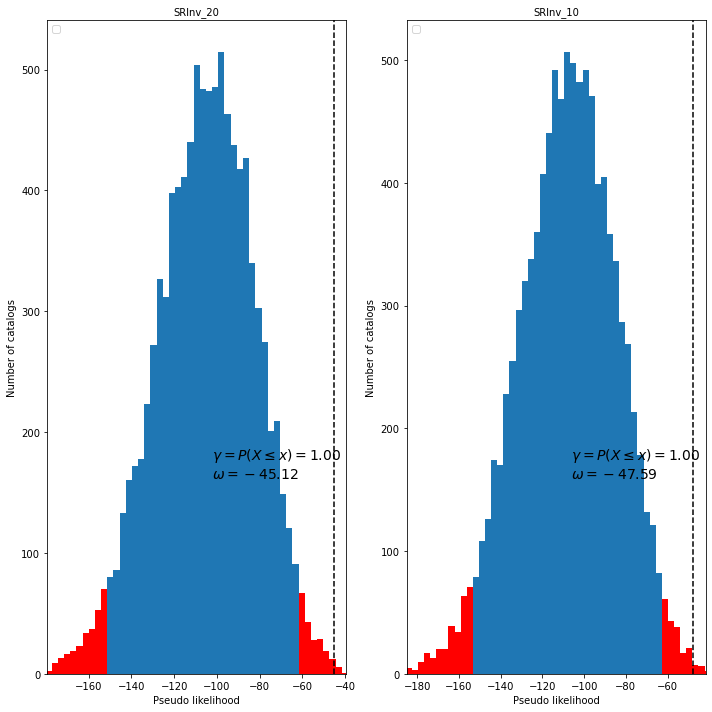

In [290]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
csep_plots.plot_likelihood_test(LTestCat[1], plot_args={"title": "SRInv_20" }, axes=axs[0], show=False, label = True)
csep_plots.plot_likelihood_test(LTestCat[2], plot_args={"title": "SRInv_10"}, axes=axs[1], show=False, label= True)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:title={'center':'SRInv_1'}, xlabel='Event count of catalogs', ylabel='Number of catalogs'>

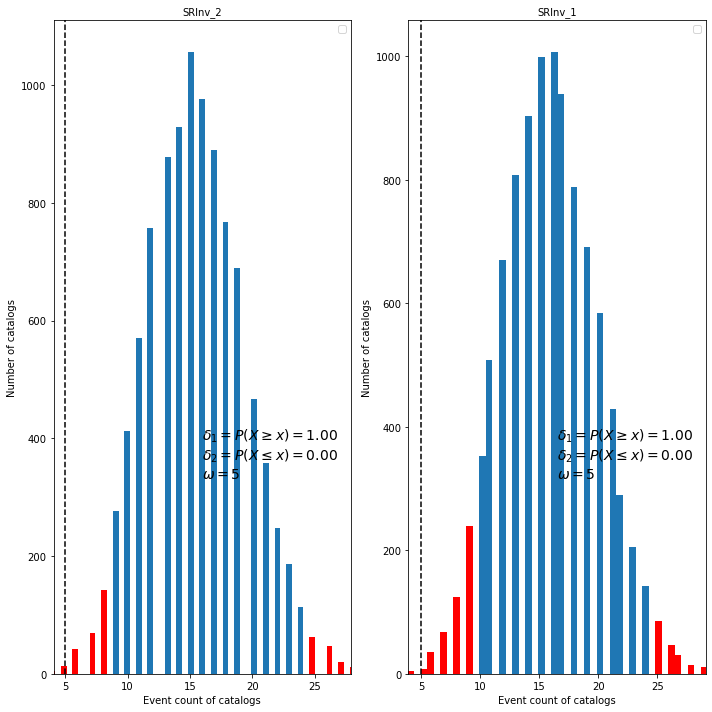

In [291]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
csep_plots.plot_number_test(NTestCat[1], plot_args={"title": "SRInv_2" }, axes=axs[0], show=False, label = True)
csep_plots.plot_number_test(NTestCat[2], plot_args={"title": "SRInv_1"}, axes=axs[1], show=False, label= True)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


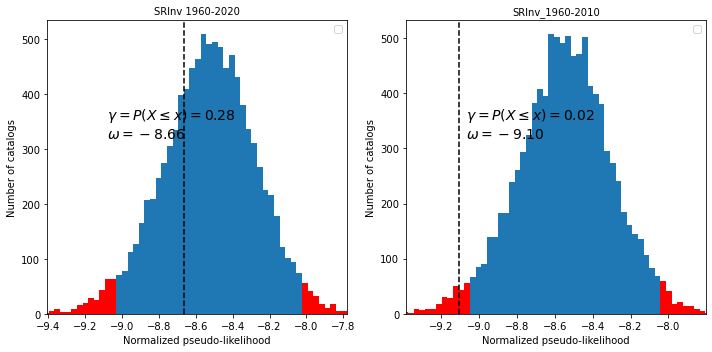

In [294]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
csep_plots.plot_spatial_test(STestCat[1], plot_args={"title": "SRInv 1960-2020" }, axes=axs[0], show=False, label = True)
csep_plots.plot_spatial_test(STestCat[2], plot_args={"title": "SRInv_1960-2010"}, axes=axs[1], show=False, label= True)
fig.savefig("Updated_SRinv_spat.pdf")

So the updated model performs better spatially and by magnitide BUT not by pseudolikelihood, because the number of events is more consistent with the distribution of the earlier model.
** Compare with SRInv with updated MMax - but the fixed one ;)

## Historic tests

In [47]:
import datetime
from csep.utils.time_utils import strptime_to_utc_datetime, strptime_to_utc_epoch, datetime_to_utc_epoch


data = pd.read_excel("~/Downloads/misc/CPTI15_v4.0.xlsx", sheet_name="catalogue", engine='openpyxl')
data.head()

#### Some messy catalog processing here...
####
## Drop events without a magnitude - these generally don't have a location either!
data = data[data['MwM'].notna()]
## Only want events < 1960 (avoid dupes with HORUS)
data = data[data['Year'] < 1960]
### Keep only M>=4
data = data[data['MwM'] >= 4]

## Missing month: set to 1
## Month should be int
data['Mo'] = data['Mo'].fillna(1)
data.Mo = data.Mo.astype(int)

## Missing day: set to 1
##day should be int
data['Da'] = data['Da'].fillna(1)
data.Da = data.Da.astype(int)

## Missing hour/minute/second: set missing times as 08:00:00
data['Ho'] = data['Ho'].fillna(1)
data.Ho = data.Ho.astype(int)

data['Mi'] = data['Mi'].fillna(0)
data.Mi = data.Mi.astype(int)

data['Se'] = data['Se'].fillna(0)
data.Se = data.Se.astype(int)

## Some individual fixes....
## Should I write code to catch these? Yes.
## Will I? 
## Also yes, but not today...

## There's an earthquake on Feb 29th 1400 that messes up datetime, so we're just going to shift it to a day earlier...
data['Da'][127] = 28

## Earthquake at 2400...
data['Ho'][286] = 0

out = []
for index, row in data.iterrows():
    #print(numpy.int(row.Mo))
    dt = datetime.datetime(np.int(row.Year), np.int(row.Mo), np.int(row.Da), np.int(row.Ho), np.int(row.Mi), np.int(row.Se))
    event_tuple = (int(row['N']),
        datetime_to_utc_epoch(dt),
        float(row["LatM"]),
        float(row["LonM"]),
        float(row["DepIns"]),
        float(row["MwM"])
                       )   
    out.append(event_tuple)

<ipython-input-47-5ece87608ce2>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Da'][127] = 28
<ipython-input-47-5ece87608ce2>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ho'][286] = 0


In [48]:
hist_df = pd.DataFrame(out, columns = ['id','origin_time','latitude','longitude', 'depth', 'magnitude'])

## Select random samples from historic catalogue
### Some loop of this where we do this a bunch of times and see how performance changes!
rand_cat = hist_df.sample(n= 20)
hist_cat_rand = csep.core.catalogs.CSEPCatalog.from_dataframe(rand_cat, region=space_magnitude_region)
hist_cat_rand = hist_cat_rand.filter_spatial(srhistDEM_MM6.region)

## Select largest historic events
large_hist = hist_df[hist_df.magnitude > 6]
hist_cat_large = csep.core.catalogs.CSEPCatalog.from_dataframe(large_hist, region=space_magnitude_region)
hist_cat_large = hist_cat_large.filter_spatial(srhistDEM_MM6.region)

In [45]:
large_hist.shape[0]

78

<AxesSubplot:>

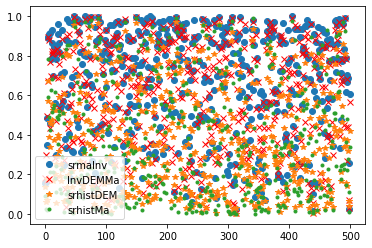

In [113]:
rhist[0][3][0].quantile[1]

keys=range(500)
    
f1 = [0]*500
f2 = [0]*500
f3 = [0]*500
f4 = [0]*500
    
for i in keys:
    f1[i] = rhist[i][3][0].quantile[1]
    f2[i] = rhist[i][3][5].quantile[1]
    f3[i] = rhist[i][3][4].quantile[1]
    f4[i] = rhist[i][3][7].quantile[1]

sample_no = [str(i) for i in range(1, 501)]
    
quants_df = pd.DataFrame(list(zip(f1, f2, f3, f4, sample_no)),
                            columns =['srmaInv','InvDEMMa','srhistDEM','srhistMa', 'sample'])

quants_df.plot(style=['o','rx', '*', '.'])


(array([ 19.,  35.,  38.,  47.,  49.,  44.,  58.,  62.,  79.,  69.]),
 array([ 0.004  ,  0.10296,  0.20192,  0.30088,  0.39984,  0.4988 ,
         0.59776,  0.69672,  0.79568,  0.89464,  0.9936 ]),
 <BarContainer object of 10 artists>)

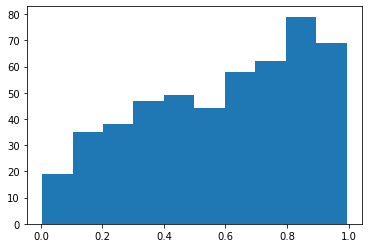

In [118]:
plt.hist(quants_df['InvDEMMa'])


In [108]:
rhist[493][3][0].quantile[1]

0.79059999999999997

In [80]:
def random_historic_tests(forecast_list, test_catalog, nsamples, nevents):
    pl_res=[]
    for i in range(nsamples):
        #print(i)
        rand_cat = test_catalog.sample(n= nevents)
        
        hist_cat_rand = csep.core.catalogs.CSEPCatalog.from_dataframe(rand_cat, region=forecast.region)
        hist_cat_rand = hist_cat_rand.filter_spatial(forecast.region)

        ## Test forecast for this dataset
        result = alphabet_tests_catalog(forecast_list, hist_cat_rand)
        pl_res.append(result)
    return pl_res

rhist = random_historic_tests(forecast_cats, hist_df, 500,15)

Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 14.0 events after removing 1.0 events.
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 14.0 events after removing 1.0 events.
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 14.0 events after removing 1.0 events.
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 14.0 events after removing 1.0 events.
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 14.0 events after removing 1.0 events.
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 14.0 events after removing 1.0 events.
Found -inf as th

In [39]:
def randhist_test_comp(multiyear_results, forecast_n, nsamples, plot_title):
    ## remember pyton ranges are a joy!
    ns = nsamples +1
    
    keys= range(nsamples)
    
    pl_dict={}
    m_dict ={}
    n_dict = {}
    s_dict = {}
    
    df_obs_pl = [0]*nsamples
    df_obs_m = [0]*nsamples
    df_obs_n = [0]*nsamples
    df_obs_s = [0]*nsamples
    
    for i in keys:
        pl_dict[i] = multiyear_results[i][0][forecast_n].test_distribution
        m_dict[i] = multiyear_results[i][1][forecast_n].test_distribution
        n_dict[i] = multiyear_results[i][2][forecast_n].test_distribution
        s_dict[i] = multiyear_results[i][3][forecast_n].test_distribution
        
        df_obs_pl[i] = multiyear_results[i][0][forecast_n].observed_statistic
        df_obs_m[i] = multiyear_results[i][1][forecast_n].observed_statistic
        df_obs_n[i] = multiyear_results[i][2][forecast_n].observed_statistic
        df_obs_s[i] = multiyear_results[i][3][forecast_n].observed_statistic
            
    df_pl = pd.DataFrame(pl_dict)
    df_m = pd.DataFrame(m_dict)
    df_n = pd.DataFrame(n_dict)
    df_s = pd.DataFrame(s_dict)
    
    sample_no = [str(i) for i in range(1, ns)]
    
    pl_obs_df = pd.DataFrame(list(zip(df_obs_pl, sample_no)),
                            columns =['obs', 'sample'])
    m_obs_df = pd.DataFrame(list(zip(df_obs_m, sample_no)),
                            columns =['obs', 'sample'])
    n_obs_df = pd.DataFrame(list(zip(df_obs_n, sample_no)),
                            columns =['obs', 'sample'])
    s_obs_df = pd.DataFrame(list(zip(df_obs_s, sample_no)),
                            columns =['obs', 'sample'])
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 5), sharex=True)

    fig.suptitle(plot_title)
   
    sns.boxenplot(ax=axes[0, 0], data=df_pl, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "Pseudolikelihood results")
    sns.stripplot(ax=axes[0, 0], x="sample", y="obs", data= pl_obs_df, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')
 
    sns.boxenplot(ax=axes[0,1], data=df_m, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "magnitude results")
    sns.stripplot(ax=axes[0,1], x="sample", y="obs", data= m_obs_df, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')
    
    sns.boxenplot(ax=axes[1, 0], data=df_n, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "number results")
    sns.stripplot(ax=axes[1, 0], x="sample", y="obs", data= n_obs_df, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

    sns.boxenplot(ax=axes[1,1], data=df_s, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results")
    sns.stripplot(ax=axes[1,1], x="sample", y="obs", data= s_obs_df, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')
    
    fig.tight_layout()

    

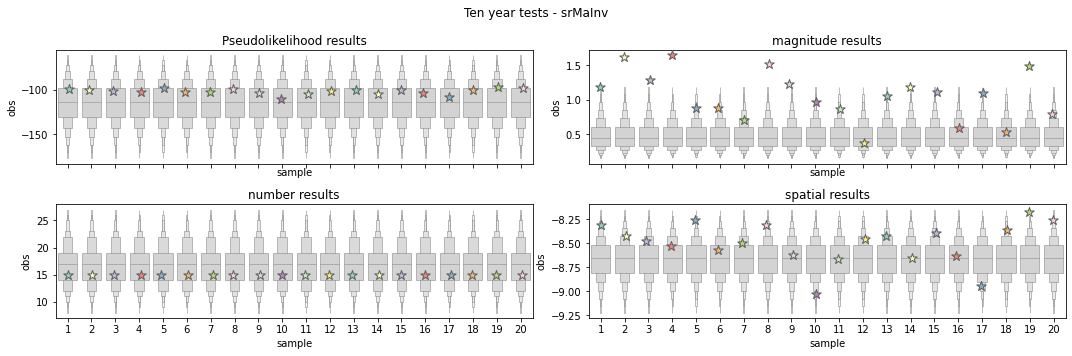

In [42]:
randhist_test_comp(rhist,0, 20, "Ten year tests - srMaInv")

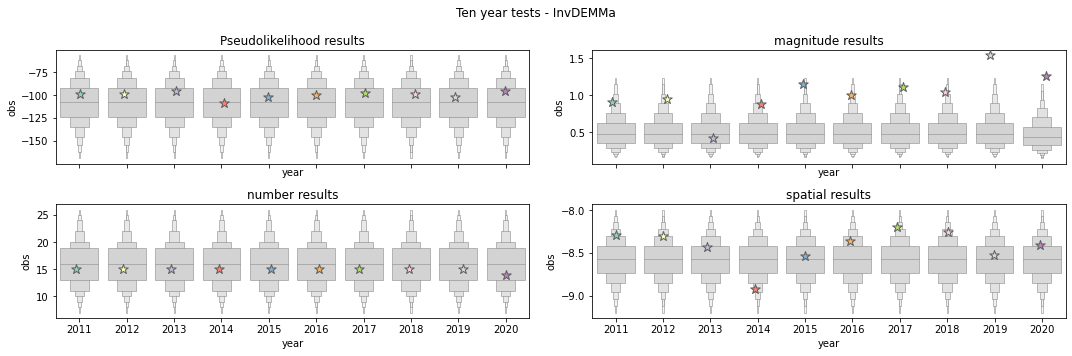

In [23]:
ten_year_test_comp(rhist,5, "Ten year tests - InvDEMMa")

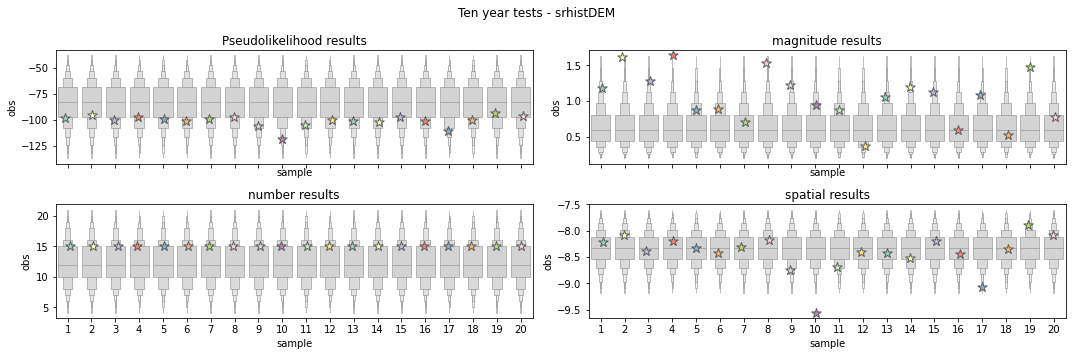

In [44]:
randhist_test_comp(rhist, 4, 20, "Ten year tests - srhistDEM")

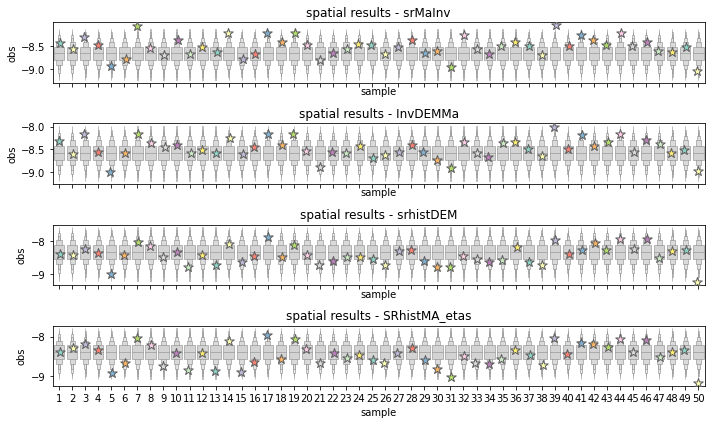

In [64]:
nsamples = 50
ns = nsamples +1
    
keys= range(nsamples)
    
s_dict_f1={}
s_dict_f2 ={}
s_dict_f3 = {}
s_dict_f4 = {}
    
df_obs_f1 = [0]*nsamples
df_obs_f2 = [0]*nsamples
df_obs_f3 = [0]*nsamples
df_obs_f4 = [0]*nsamples


for i in keys:
    
    s_dict_f1[i] = rhist[i][3][0].test_distribution
    df_obs_f1[i] = rhist[i][3][0].observed_statistic

    s_dict_f2[i] = rhist[i][3][5].test_distribution
    df_obs_f2[i] = rhist[i][3][5].observed_statistic

    s_dict_f3[i] = rhist[i][3][4].test_distribution
    df_obs_f3[i] = rhist[i][3][4].observed_statistic

    s_dict_f4[i] = rhist[i][3][7].test_distribution
    df_obs_f4[i] = rhist[i][3][7].observed_statistic
            

df_s1 = pd.DataFrame(s_dict_f1)
df_s2 = pd.DataFrame(s_dict_f2)
df_s3 = pd.DataFrame(s_dict_f3)
df_s4 = pd.DataFrame(s_dict_f4)
    
sample_no = [str(i) for i in range(1, ns)]
    
s_obs_df1 = pd.DataFrame(list(zip(df_obs_f1, sample_no)),
                        columns =['obs', 'sample'])
s_obs_df2 = pd.DataFrame(list(zip(df_obs_f2, sample_no)),
                        columns =['obs', 'sample'])
s_obs_df3 = pd.DataFrame(list(zip(df_obs_f3, sample_no)),
                        columns =['obs', 'sample'])
s_obs_df4 = pd.DataFrame(list(zip(df_obs_f4, sample_no)),
                        columns =['obs', 'sample'])
    
fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

#fig.suptitle(plot_title)

sns.boxenplot(ax=axes[0], data=df_s1, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srMaInv")
sns.stripplot(ax=axes[0], x="sample", y="obs", data= s_obs_df1, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[1], data=df_s2, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - InvDEMMa")
sns.stripplot(ax=axes[1], x="sample", y="obs", data= s_obs_df2, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')

sns.boxenplot(ax=axes[2], data=df_s3, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - srhistDEM")
sns.stripplot(ax=axes[2], x="sample", y="obs", data= s_obs_df3, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')
   
sns.boxenplot(ax=axes[3], data=df_s4, color="lightgray", linewidth=0.5, orient="v",  k_depth='proportion', outlier_prop=0.05, showfliers=False).set(title = "spatial results - SRhistMA_etas")
sns.stripplot(ax=axes[3], x="sample", y="obs", data= s_obs_df4, size=10, palette="Set3", marker="*", linewidth=1, label= 'T1_mark')
    
fig.tight_layout()

fig.savefig("HistRand_spattests.pdf")    

In [52]:
rhist[1][3][0].test_distribution


array([-8.79047242, -8.64179434, -8.66404078, ..., -8.72352648,
       -8.71921757, -8.87282402])

### Spatial tests with random historical catalogue

In [49]:
hist_cat_rand = hist_cat_rand.filter_spatial(srhistDEM_MM6.region)

LTestCatr, MTestCatr, NTestCatr, STestCatr = alphabet_tests_catalog(forecast_cats, hist_cat_rand)


Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 19.0 events after removing 1.0 events.
Found -inf as the observed likelihood score. Assuming event(s) occurred in undersampled region of forecast.
Recomputing with 19.0 events after removing 1.0 events.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


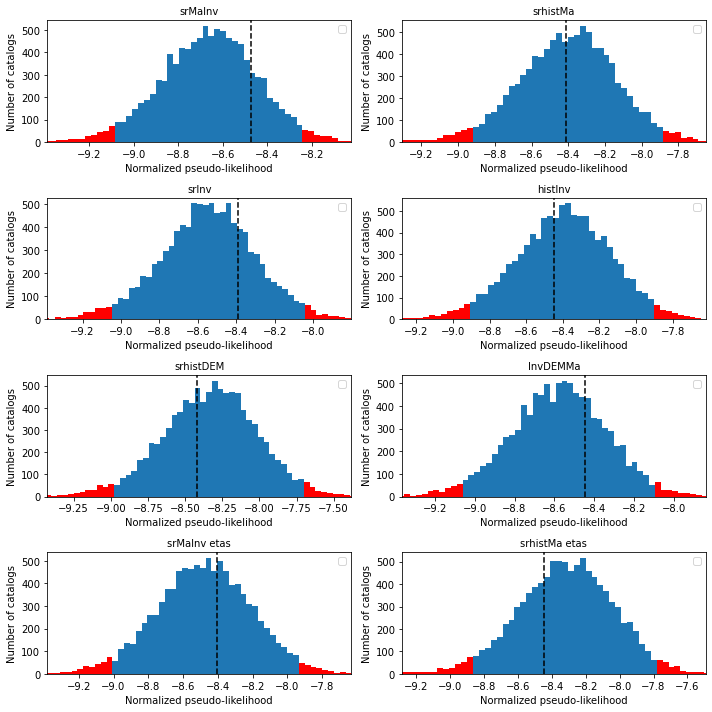

In [214]:
fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_spatial_test(STestCatr[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False, label=False)
csep_plots.plot_spatial_test(STestCatr[3], plot_args={"title": "srhistMa"}, axes=axs[0,1], show=False, label=False)
csep_plots.plot_spatial_test(STestCatr[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label=False)
csep_plots.plot_spatial_test(STestCatr[1],  plot_args={"title": "histInv"}, axes=axs[1,1], show=False, label=False)
csep_plots.plot_spatial_test(STestCatr[4], plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False, label=False)
csep_plots.plot_spatial_test(STestCatr[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False, label=False)
csep_plots.plot_spatial_test(STestCatr[6], plot_args={"title": "srMaInv etas"}, axes=axs[3,0], show=False, label=False)
csep_plots.plot_spatial_test(STestCatr[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False, label=False)

fig.tight_layout()
plt.savefig("historic_rand_tests.pdf")


All models do well spatially with this random event selection!

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


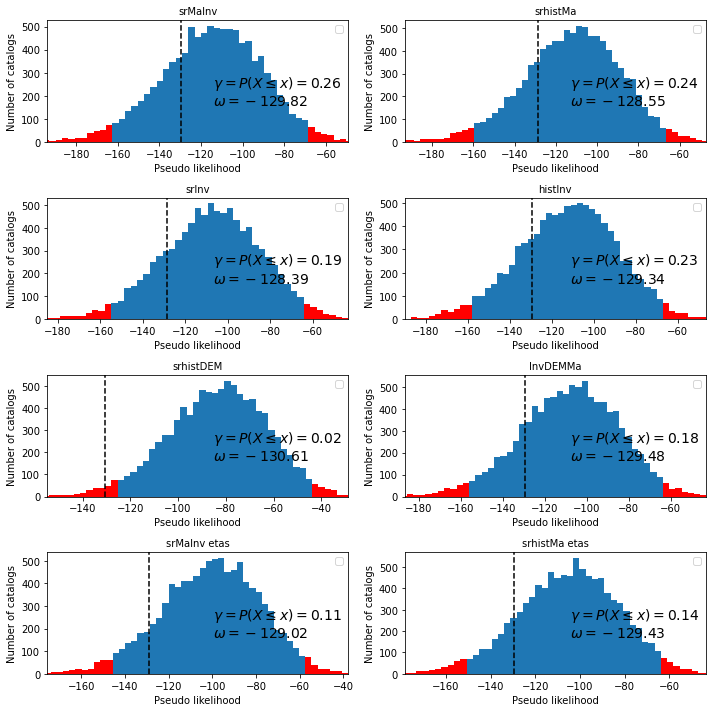

In [215]:
fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_likelihood_test(LTestCatr[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_likelihood_test(LTestCatr[3], plot_args={"title": "srhistMa"}, axes=axs[0,1], show=False)
csep_plots.plot_likelihood_test(LTestCatr[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_likelihood_test(LTestCatr[1],  plot_args={"title": "histInv"}, axes=axs[1,1], show=False)
csep_plots.plot_likelihood_test(LTestCatr[4], plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_likelihood_test(LTestCatr[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)
csep_plots.plot_likelihood_test(LTestCatr[6], plot_args={"title": "srMaInv etas"}, axes=axs[3,0], show=False)
csep_plots.plot_likelihood_test(LTestCatr[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False)

fig.tight_layout()
plt.show()

The ETAS declustered models do better in the likelihood test. historic seismicity doesn't seem to be especially helpful here.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


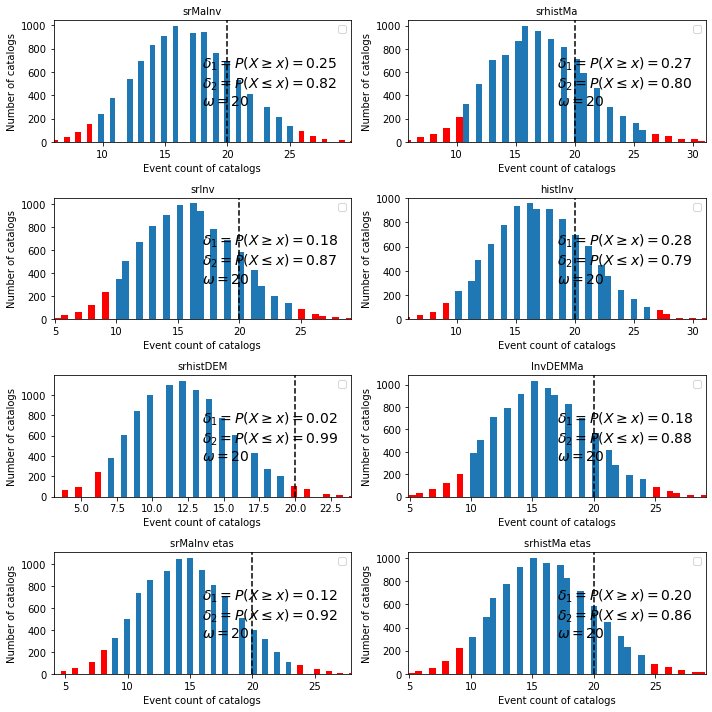

In [216]:
fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_number_test(NTestCatr[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_number_test(NTestCatr[3], plot_args={"title": "srhistMa"}, axes=axs[0,1], show=False)
csep_plots.plot_number_test(NTestCatr[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_number_test(NTestCatr[1],  plot_args={"title": "histInv"}, axes=axs[1,1], show=False)
csep_plots.plot_number_test(NTestCatr[4], plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_number_test(NTestCatr[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)
csep_plots.plot_number_test(NTestCatr[6], plot_args={"title": "srMaInv etas"}, axes=axs[3,0], show=False)
csep_plots.plot_number_test(NTestCatr[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False)

fig.tight_layout()
plt.show()

Completely meaningless N-test - I picked the number of events. 
We could (and perhaps should) pick a reasonable number here so that all models do well on the N-test, then we are only testing their spatial abilities


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


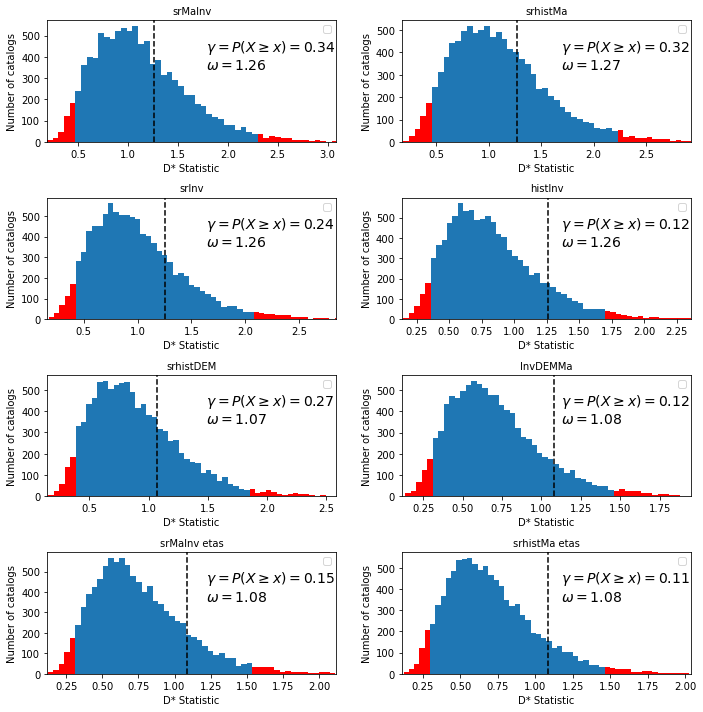

In [202]:
fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_magnitude_test(MTestCatr[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_magnitude_test(MTestCatr[1], plot_args={"title": "srhistMa"}, axes=axs[0,1], show=False)
csep_plots.plot_magnitude_test(MTestCatr[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_magnitude_test(MTestCatr[3],  plot_args={"title": "histInv"}, axes=axs[1,1], show=False)
csep_plots.plot_magnitude_test(MTestCatr[4], plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False)
csep_plots.plot_magnitude_test(MTestCatr[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False)
csep_plots.plot_magnitude_test(MTestCatr[9], plot_args={"title": "srMaInv etas"}, axes=axs[3,0], show=False)
csep_plots.plot_magnitude_test(MTestCatr[10],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False)

fig.tight_layout()
plt.show()

### Spatial test with large historic catalogue

In [46]:
LTestCath, MTestCath, NTestCath, STestCath = alphabet_tests_catalog(forecast_cats, hist_cat_large)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


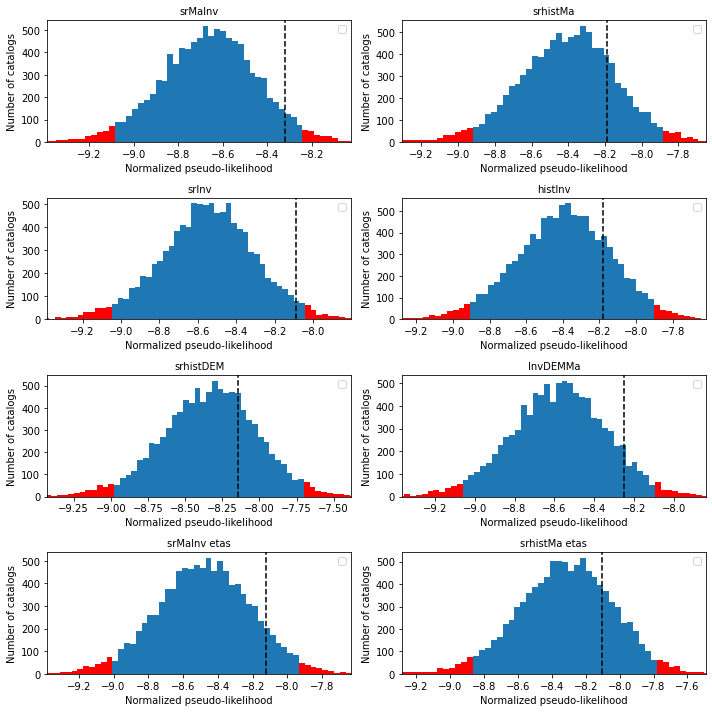

In [218]:
fig, axs = plt.subplots(4,2, figsize=(10,10))

csep_plots.plot_spatial_test(STestCath[0], plot_args={"title": "srMaInv" }, axes=axs[0,0], show=False, label=False)
csep_plots.plot_spatial_test(STestCath[3], plot_args={"title": "srhistMa"}, axes=axs[0,1], show=False, label=False)
csep_plots.plot_spatial_test(STestCath[2], plot_args={"title": "srInv"}, axes=axs[1,0], show=False, label=False)
csep_plots.plot_spatial_test(STestCath[1],  plot_args={"title": "histInv"}, axes=axs[1,1], show=False, label=False)
csep_plots.plot_spatial_test(STestCath[4], plot_args={"title": "srhistDEM"}, axes=axs[2,0], show=False, label=False)
csep_plots.plot_spatial_test(STestCath[5],  plot_args={"title": "InvDEMMa"}, axes=axs[2,1], show=False, label=False)
csep_plots.plot_spatial_test(STestCath[6], plot_args={"title": "srMaInv etas"}, axes=axs[3,0], show=False, label=False)
csep_plots.plot_spatial_test(STestCath[7],  plot_args={"title": "srhistMa etas"}, axes=axs[3,1], show=False, label=False)

fig.tight_layout()
plt.savefig("large_historic_spat.pdf")

Which says that actually we're pretty good at getting the locations of large events, even in models that do not include a historic component.
This is a retrospective test, so not as nice as prospective or pseudo-prospective tests, but looks pretty good tbh. We gave it the largest events in the Italian catalogue, and we did a good job of forecasting their spatial location.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


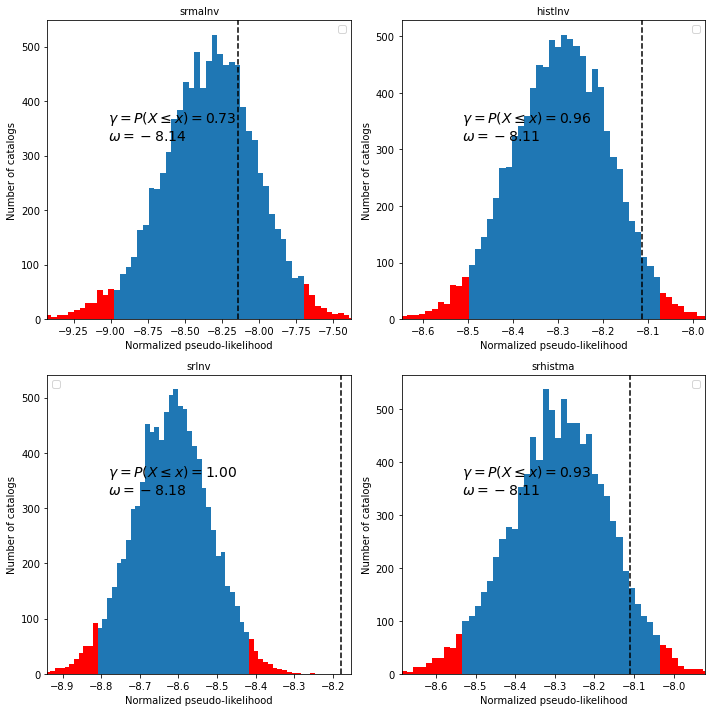

In [205]:
#hist_cat_large = csep.core.catalogs.CSEPCatalog.from_dataframe(large_hist, region=space_magnitude_region)
#hist_cat_large = hist_cat_large.filter_spatial(srmaInv_bdecvar_10.region)

spat1 = catalog_evaluations.spatial_test(srhistDEM_MM6, hist_cat_large, verbose=False)
spat2 = catalog_evaluations.spatial_test(histInv_bdecvar_10, hist_cat_large, verbose=False)
spat3 = catalog_evaluations.spatial_test(SRIFD_bdecvar_10, hist_cat_large, verbose=False)
spat4 = catalog_evaluations.spatial_test(srhistma_bdecvar_10, hist_cat_large, verbose=False)

import csep.utils.plots as csep_plots

fig, axs = plt.subplots(2,2, figsize=(10,10))

csep_plots.plot_spatial_test(spat1, plot_args={"title": "srmaInv" }, axes=axs[0,0], show=False)
csep_plots.plot_spatial_test(spat2, plot_args={"title": "histInv"}, axes=axs[0,1], show=False)
csep_plots.plot_spatial_test(spat3, plot_args={"title": "srInv"}, axes=axs[1,0], show=False)
csep_plots.plot_spatial_test(spat4,  plot_args={"title": "srhistma"}, axes=axs[1,1], show=False)

plt.show()

But wtf is going on here? Results should be the same as above... Check!

# Voronoi tests

In [50]:
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords, coords_to_points
import geopandas as gpd
## This function takes an exceptionally long time to run because of how it's filling up pandas dataframes
## Should try to get the magnitudes associated directly with the polygons rather than filling these in (in a super time-inefficient way) later.

def voronoi_tests(forecast, catalog, boundary_poly):
    ##
    ### Set up Voronoi tesselation from observed catalog
    ## Convert cat -> Geodataframe 
    cat = pd.DataFrame(catalog.data)
    points = gpd.GeoDataFrame(cat, geometry=gpd.points_from_xy(cat.longitude, cat.latitude))
    points = points.set_crs(epsg=4326)
    
    ## Make voronoi tesselation with call to geovorornoi
    poly_shapes, poly_to_pt_assignments = voronoi_regions_from_coords(np.column_stack((points.longitude, points.latitude)), boundary_poly.iloc[0].geometry)
    
    ## Make voronoi polygons into geoDataFrame object
    catvordf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly_shapes))
    catvordf.crs = "EPSG:4326"
    catvordf['name'] = pd.Series(range(0,len(catvordf)))
    catvordf['magnitude'] = 0
    
    ## Take magnitides for cells from catalog - there is almost definitely a neater way to do this - suggestions welcome!
    fs = gpd.sjoin(points, catvordf, predicate="within")
    print(fs.head())
    ## magnitude column for events in the catalog
    for j in range(0,len(catvordf)):
    #catvordf.loc[j, 'magnitudes'] = fs[fs['name_right'] == j]['magnitude']
        catvordf.loc[j, 'magnitude'] = fs.loc[fs['index_right'] == j, 'magnitude_left'].iloc[0]
    
    ### Set up cat_mag column to hold max mag in each cell for all forecasts (keeps only largest event over all simulated cats)
    catvordf['cat_mag'] = 0
    ### Set up cat_avg column to hold average mag in each cell for all forecasts 
    catvordf['cat_avg'] = 0
    ### set up counts column to store counts in each voronoi cell (cumulative over all catalogues)
    catvordf['counts'] = 0
    ### Count number of catalogs in forecast -- TODO: should take this from forecast object!!
    ncat=0

    for i, forecast in enumerate(forecast):
        ncat += 1
        fcat = pd.DataFrame(forecast.data)
    
        # Make dataset into geopandas dataframe
        points = gpd.GeoDataFrame(fcat, geometry=gpd.points_from_xy(fcat.longitude, fcat.latitude))
        points = points.set_crs(epsg=4326)
    
        joined = gpd.sjoin(points,catvordf[['geometry', 'name']], predicate="within")
    
        
        for j in range(0,len(catvordf)):
            num = sum(joined.name == j)
            
            if num > 0:
            # Average magnitude in cell from this catalogue forecast
                mag_tot = sum(joined[joined.name == j]['magnitude'])
                catvordf.loc[j, 'cat_avg'] = catvordf.cat_avg[j] + mag_tot
            
            ## Add number of events from this catalogue to total count 
            catvordf.loc[j, 'counts'] = catvordf.counts[j] + num
            
            ## Find maximum magnitude in cell and check of this is the largest we have seen so far
            m_max = np.max(joined[joined.name == j]['magnitude'])
            if m_max > catvordf.loc[j, 'cat_mag']:
                catvordf.loc[j, 'cat_mag'] = m_max
            
            

    ## Normalise count over number of catalogss 
    catvordf['cat_avg'] = catvordf['cat_avg']/ncat
    catvordf['norm_count'] = catvordf['counts']/ncat
    catvordf['cat_diff'] = catvordf['magnitude'] - catvordf['cat_mag']
    
    
    return(catvordf)

/home/kbayliss/anaconda3/envs/csep-dev/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


        id     origin_time  latitude  longitude  depth  magnitude_left  \
0  b'1988'  -1906923600000    41.584     13.772    NaN            4.16   
1   b'459' -10399100400000    38.632     16.491    NaN            5.80   
2    b'51' -21795519600000    44.130     11.919    NaN            5.52   
3  b'1569'  -2480262300000    44.714      8.669    NaN            4.13   
4  b'2318'  -1431829200000    37.132     14.879    NaN            4.44   

                    geometry  index_right  name  magnitude_right  
0  POINT (13.77200 41.58400)           11    11                0  
1  POINT (16.49100 38.63200)            3     3                0  
2  POINT (11.91900 44.13000)            9     9                0  
3   POINT (8.66900 44.71400)            4     4                0  
4  POINT (14.87900 37.13200)            0     0                0  
        id     origin_time  latitude  longitude  depth  magnitude_left  \
0  b'1988'  -1906923600000    41.584     13.772    NaN            4.16   
1   b

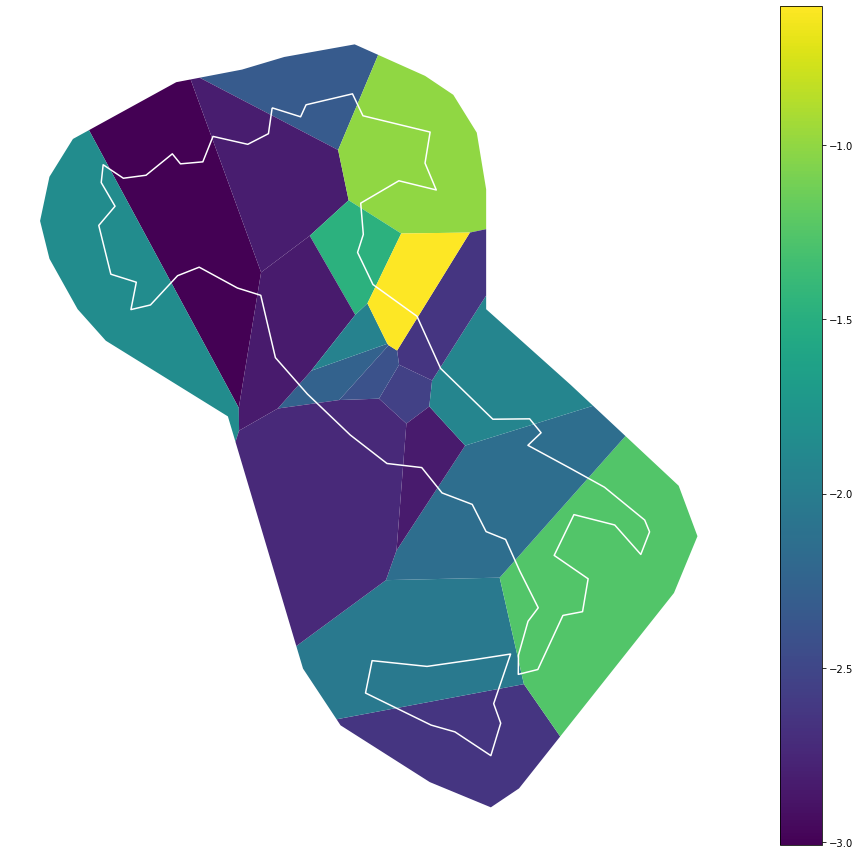

In [51]:
poly_list = pd.read_csv("~/pycsep/csep/artifacts/Regions/Polygons/Italy/ItalyTestingPolygon.txt", header=None, delim_whitespace=True)

from shapely.geometry import Polygon
polygon_geom = Polygon(zip(poly_list[0],poly_list[1]))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom]) 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
italy = world[world.name == 'Italy']
## TODO: This is quite low res, look for a better shapefile!


srhistdemvor = voronoi_tests(srhistDEM_MM6, hist_cat_rand, polygon)
InvDEMMavor = voronoi_tests(InvDEMMa_MM6, hist_cat_rand, polygon)

fig, ax = plt.subplots(figsize=(14,12))
srhistdemvor.plot(ax=ax, column='cat_diff', legend=True)
italy.boundary.plot(ax=ax, color='white')
ax.axis("off")
plt.tight_layout()
plt.show()

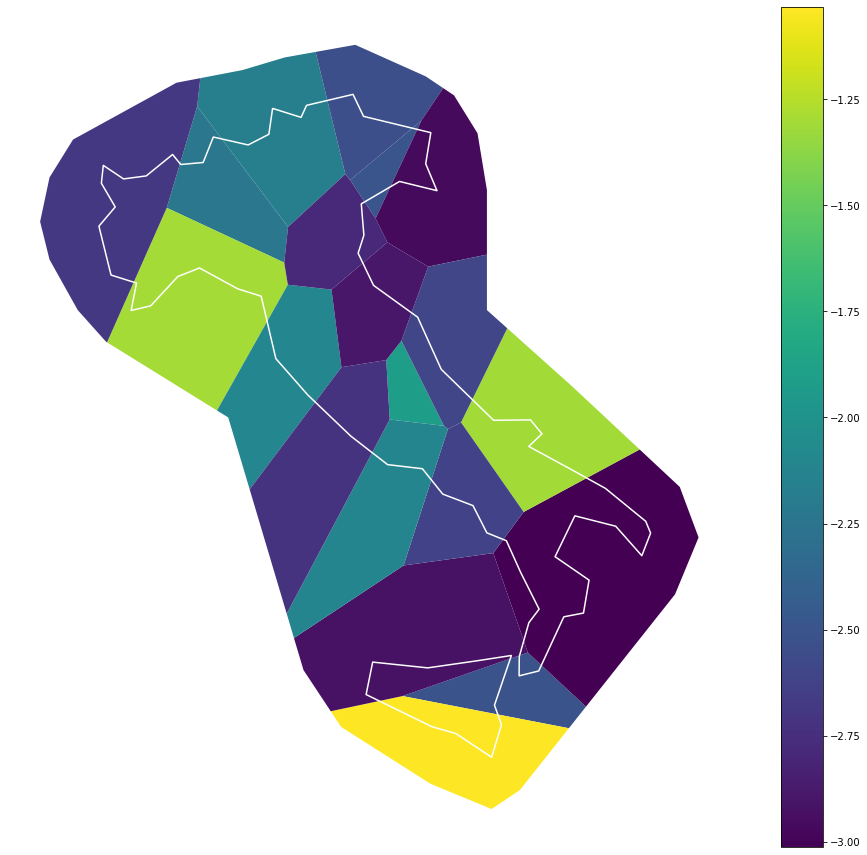

In [223]:
fig, ax = plt.subplots(figsize=(14,12))
InvDEMMavor.plot(ax=ax, column='cat_diff', legend=True)
italy.boundary.plot(ax=ax, color='white')
ax.axis("off")
plt.tight_layout()
plt.savefig("InvDEMMa_voronoi_hist.pdf")

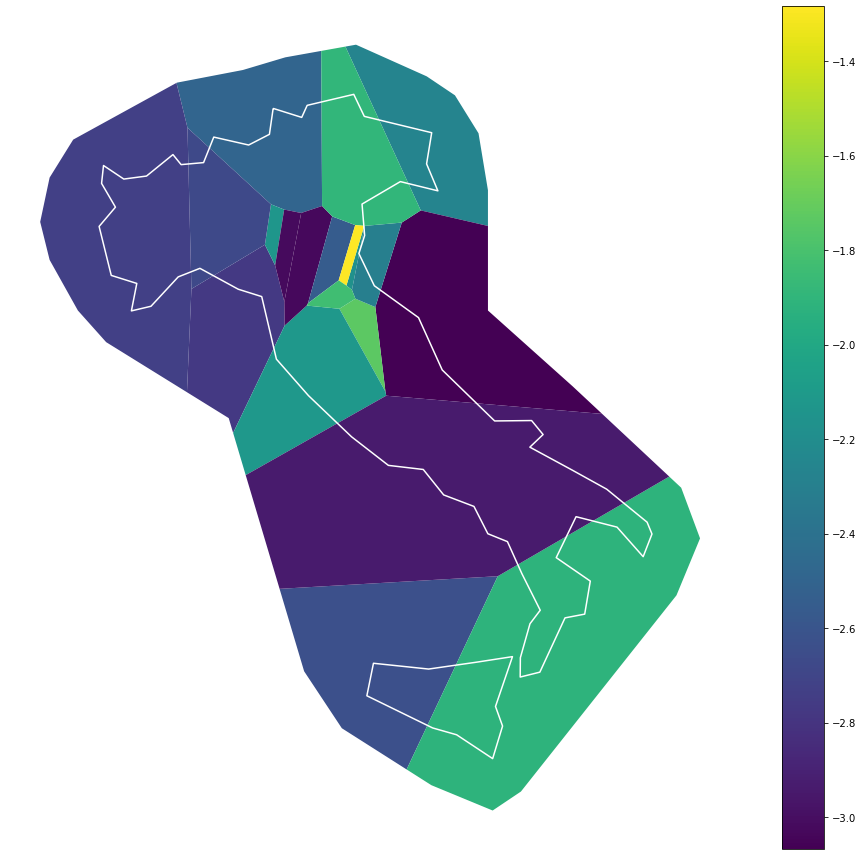

In [214]:
fig, ax = plt.subplots(figsize=(14,12))
InvDEMMavor.plot(ax=ax, column='cat_diff', legend=True)
italy.boundary.plot(ax=ax, color='white')
ax.axis("off")
plt.tight_layout()
plt.show()

In [224]:
srhistdem_hist_vor = voronoi_tests(srhistDEM_MM6, hist_cat_large, polygon)

      id     origin_time  latitude  longitude  depth  magnitude_left  \
0  b'11' -26917865100000    45.267     11.015    NaN            6.52   
1  b'21' -25274134800000    37.215     14.949    NaN            6.50   
2  b'27' -24791353200000    39.395     16.193    NaN            6.75   
3  b'50' -21795458400000    43.093     12.872    NaN            6.20   
4  b'63' -21177327600000    42.575     12.902    NaN            6.26   

                    geometry  index_right  name  magnitude_right  
0  POINT (11.01500 45.26700)            5     5                0  
1  POINT (14.94900 37.21500)           15    15                0  
2  POINT (16.19300 39.39500)           54    54                0  
3  POINT (12.87200 43.09300)           22    22                0  
4  POINT (12.90200 42.57500)           33    33                0  


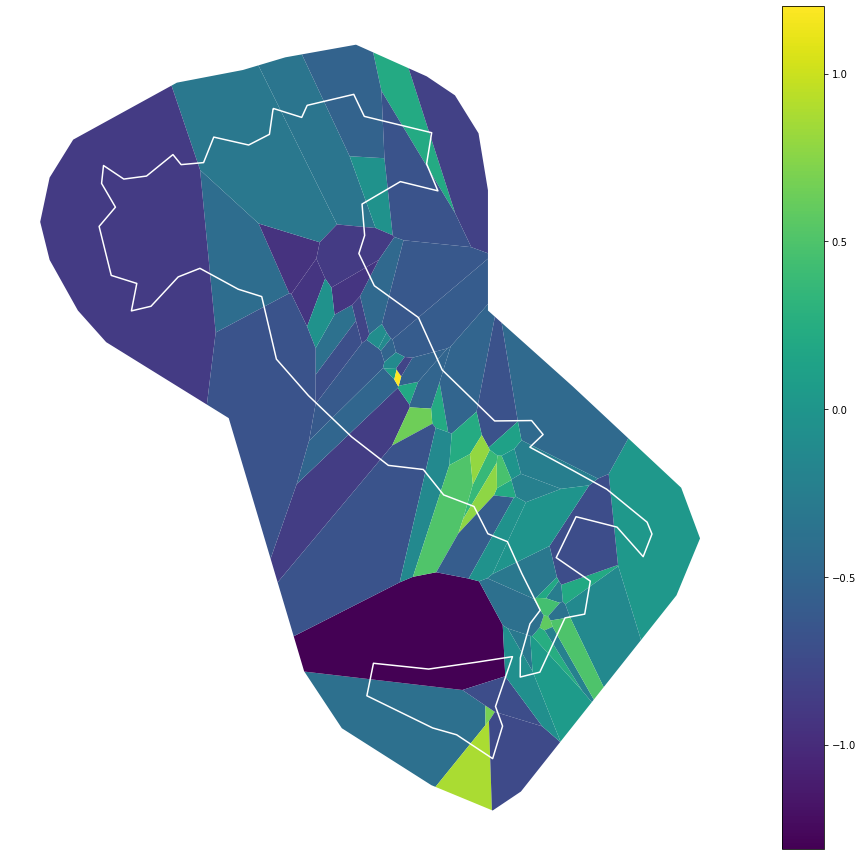

In [226]:
fig, ax = plt.subplots(figsize=(14,12))
srhistdem_hist_vor.plot(ax=ax, column='cat_diff', legend=True)
italy.boundary.plot(ax=ax, color='white')
ax.axis("off")
plt.tight_layout()
plt.savefig("srhistdem_voronoi_hist.pdf")

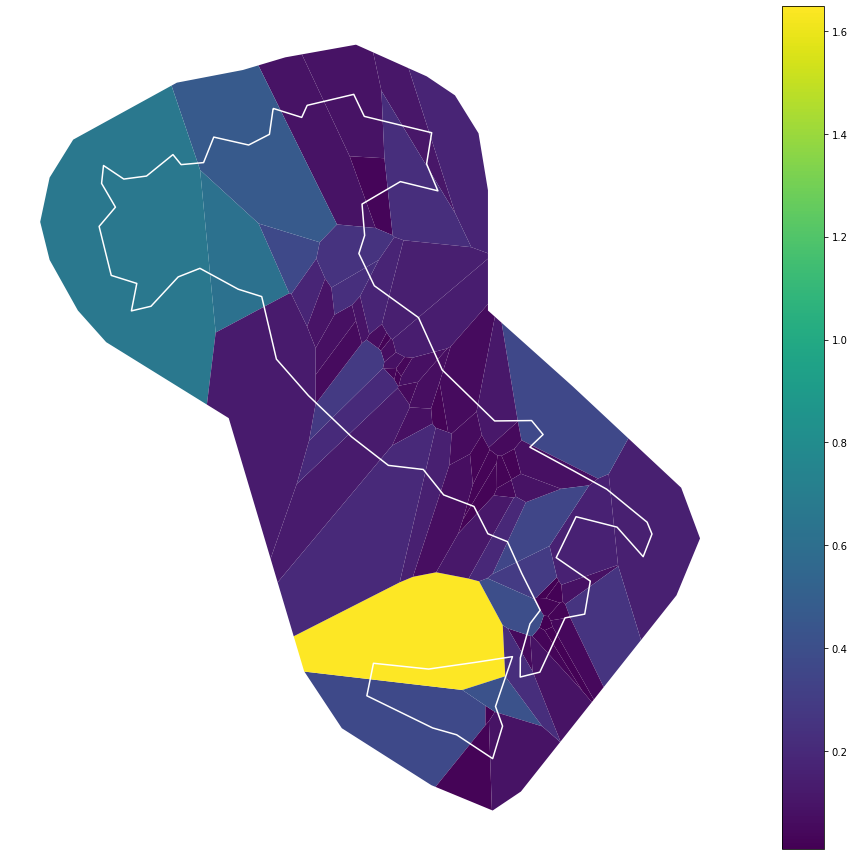

In [228]:
fig, ax = plt.subplots(figsize=(14,12))
srhistdem_hist_vor.plot(ax=ax, column='norm_count', legend=True)
italy.boundary.plot(ax=ax, color='white')
ax.axis("off")
plt.tight_layout()
plt.savefig("srhistdem_voronoi_hist.pdf")

In [52]:
InvDemMa_hist_large_vor = voronoi_tests(InvDEMMa_MM6, hist_cat_large, polygon)

      id     origin_time  latitude  longitude  depth  magnitude_left  \
0  b'11' -26917865100000    45.267     11.015    NaN            6.52   
1  b'21' -25274134800000    37.215     14.949    NaN            6.50   
2  b'27' -24791353200000    39.395     16.193    NaN            6.75   
3  b'50' -21795458400000    43.093     12.872    NaN            6.20   
4  b'63' -21177327600000    42.575     12.902    NaN            6.26   

                    geometry  index_right  name  magnitude_right  
0  POINT (11.01500 45.26700)            5     5                0  
1  POINT (14.94900 37.21500)           15    15                0  
2  POINT (16.19300 39.39500)           54    54                0  
3  POINT (12.87200 43.09300)           22    22                0  
4  POINT (12.90200 42.57500)           33    33                0  


In [53]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

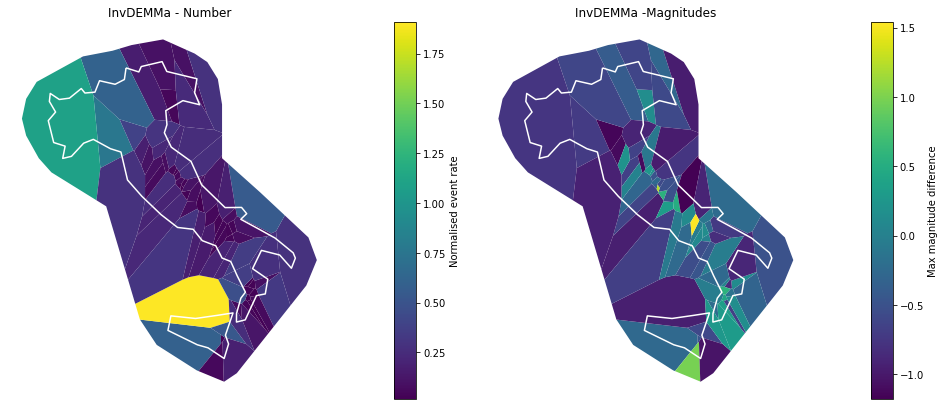

In [54]:

fig, axs = plt.subplots(1,2, figsize=(14,12))

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDemMa_hist_large_vor.plot(ax=axs[0], column='norm_count', legend=True, cax=cax, legend_kwds={'label': "Normalised event rate"})
italy.boundary.plot(ax=axs[0], color='white')
axs[0].set_title("InvDEMMa - Number")
axs[0].axis("off")

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDemMa_hist_large_vor.plot(ax=axs[1], column='cat_diff', legend=True, cax=cax,legend_kwds={'label': "Max magnitude difference"})
italy.boundary.plot(ax=axs[1], color='white')
axs[1].set_title("InvDEMMa -Magnitudes")
axs[1].axis("off")

plt.tight_layout()
plt.savefig("InvDemMa_hist_plots2.pdf")

NameError: name 'srhistdem_hist_vor' is not defined

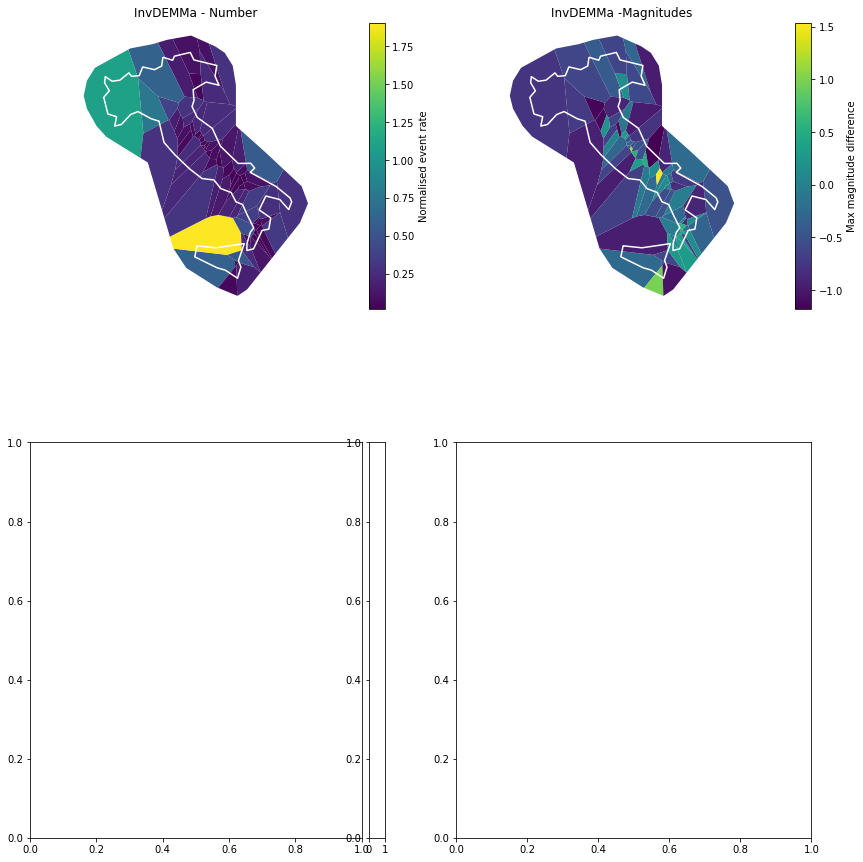

In [57]:
fig, axs = plt.subplots(2,2, figsize=(14,16))

divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDemMa_hist_large_vor.plot(ax=axs[0,0], column='norm_count', legend=True, cax=cax, legend_kwds={'label': "Normalised event rate"})
italy.boundary.plot(ax=axs[0,0], color='white')
axs[0,0].set_title("InvDEMMa - Number")
axs[0,0].axis("off")

divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDemMa_hist_large_vor.plot(ax=axs[0,1], column='cat_diff', legend=True, cax=cax,legend_kwds={'label': "Max magnitude difference"})
italy.boundary.plot(ax=axs[0,1], color='white')
axs[0,1].set_title("InvDEMMa -Magnitudes")
axs[0,1].axis("off")

###########
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes("right", size="5%", pad=0.1)

srhistdem_hist_vor.plot(ax=axs[1,0], column='norm_count', legend=True, cax=cax, legend_kwds={'label': "Normalised event rate"})
italy.boundary.plot(ax=axs[1,0], color='white')
axs[1,0].set_title("srhistDEM - Number")
axs[1,0].axis("off")

divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes("right", size="5%", pad=0.1)

srhistdem_hist_vor.plot(ax=axs[1,1], column='cat_diff', legend=True, cax=cax,legend_kwds={'label': "Max magnitude difference"})
italy.boundary.plot(ax=axs[1,1], color='white')
axs[1,1].set_title("srhistDEM -Magnitudes")
axs[1,1].axis("off")


plt.tight_layout()
#plt.savefig("voronoi_comps_InvDEMMa_srhistdem.pdf")

In [ ]:
### Event magnitudes reshuffled
histInv_faults = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/histInv_6010_1yr_faultMags.txt",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

histInv_faults_vor = voronoi_tests(histInv_faults, hist_cat_large, polygon)

      id     origin_time  latitude  longitude  depth  magnitude_left  \
0  b'11' -26917865100000    45.267     11.015    NaN            6.52   
1  b'21' -25274134800000    37.215     14.949    NaN            6.50   
2  b'27' -24791353200000    39.395     16.193    NaN            6.75   
3  b'50' -21795458400000    43.093     12.872    NaN            6.20   
4  b'63' -21177327600000    42.575     12.902    NaN            6.26   

                    geometry  index_right  name  magnitude_right  
0  POINT (11.01500 45.26700)            5     5                0  
1  POINT (14.94900 37.21500)           15    15                0  
2  POINT (16.19300 39.39500)           54    54                0  
3  POINT (12.87200 43.09300)           22    22                0  
4  POINT (12.90200 42.57500)           33    33                0  


In [56]:
### normalised # of events
InvDemMa78 = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/IvDMMa_78.txt",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

InvDemMa78_vor = voronoi_tests(InvDemMa78, hist_cat_large, polygon)

      id     origin_time  latitude  longitude  depth  magnitude_left  \
0  b'11' -26917865100000    45.267     11.015    NaN            6.52   
1  b'21' -25274134800000    37.215     14.949    NaN            6.50   
2  b'27' -24791353200000    39.395     16.193    NaN            6.75   
3  b'50' -21795458400000    43.093     12.872    NaN            6.20   
4  b'63' -21177327600000    42.575     12.902    NaN            6.26   

                    geometry  index_right  name  magnitude_right  
0  POINT (11.01500 45.26700)            5     5                0  
1  POINT (14.94900 37.21500)           15    15                0  
2  POINT (16.19300 39.39500)           54    54                0  
3  POINT (12.87200 43.09300)           22    22                0  
4  POINT (12.90200 42.57500)           33    33                0  


/home/kbayliss/anaconda3/envs/csep-dev/lib/python3.8/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
/home/kbayliss/anaconda3/envs/csep-dev/lib/python3.8/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
/home/kbayliss/anaconda3/envs/csep-dev/lib/python3.8/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


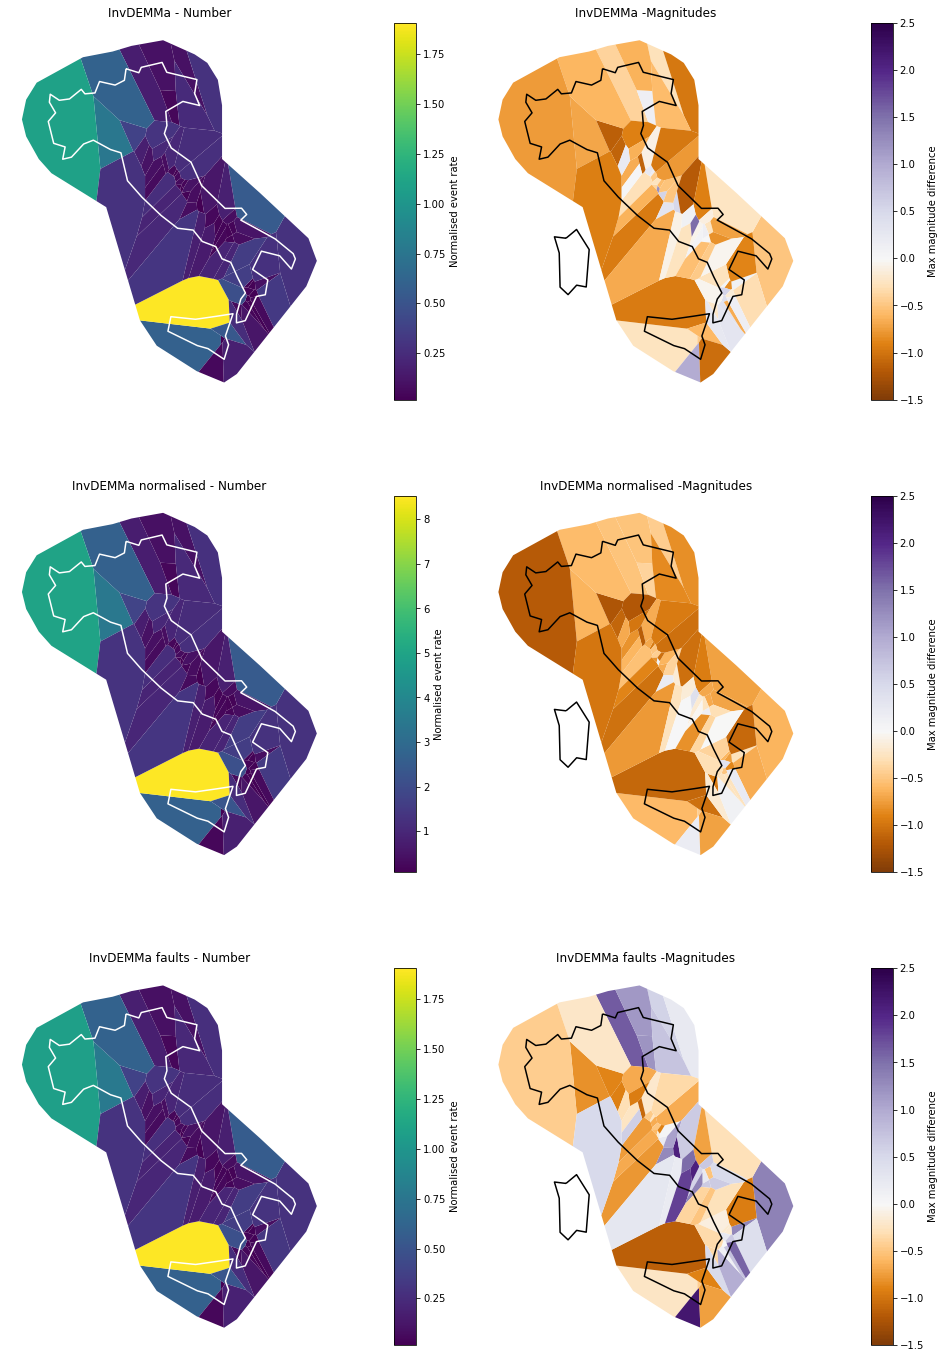

In [68]:
import matplotlib.colors as colors

Mmin = -1.5
Mmax = 2.5
Mnorm = colors.TwoSlopeNorm(vmin=Mmin, vcenter=0, vmax=Mmax)
    
fig, axs = plt.subplots(3,2, figsize=(14,20))

divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDemMa_hist_large_vor.plot(ax=axs[0,0], column='norm_count', legend=True, cax=cax, legend_kwds={'label': "Normalised event rate"})
italy.boundary.plot(ax=axs[0,0], color='white')
axs[0,0].set_title("InvDEMMa - Number")
axs[0,0].axis("off")

divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDemMa_hist_large_vor.plot(ax=axs[0,1], column='cat_diff', legend=True, cax=cax,legend_kwds={'label': "Max magnitude difference"}, colormap="PuOr", norm=Mnorm)
italy.boundary.plot(ax=axs[0,1], color='black')
axs[0,1].set_title("InvDEMMa -Magnitudes")
axs[0,1].axis("off")

###########
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDemMa78_vor.plot(ax=axs[1,0], column='norm_count', legend=True, cax=cax, legend_kwds={'label': "Normalised event rate"})
italy.boundary.plot(ax=axs[1,0], color='white')
axs[1,0].set_title("InvDEMMa normalised - Number")
axs[1,0].axis("off")

divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDemMa78_vor.plot(ax=axs[1,1], column='cat_diff', legend=True, cax=cax,legend_kwds={'label': "Max magnitude difference"}, colormap="PuOr", norm=Mnorm)
italy.boundary.plot(ax=axs[1,1], color='black')
axs[1,1].set_title("InvDEMMa normalised -Magnitudes")
axs[1,1].axis("off")

###########
divider = make_axes_locatable(axs[2,0])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDEMnorm_faults_vor.plot(ax=axs[2,0], column='norm_count', legend=True, cax=cax, legend_kwds={'label': "Normalised event rate"})
italy.boundary.plot(ax=axs[2,0], color='white')
axs[2,0].set_title("InvDEMMa faults - Number")
axs[2,0].axis("off")

divider = make_axes_locatable(axs[2,1])
cax = divider.append_axes("right", size="5%", pad=0.1)

InvDEMnorm_faults_vor.plot(ax=axs[2,1], column='cat_diff', legend=True, cax=cax,legend_kwds={'label': "Max magnitude difference"}, colormap="PuOr", norm=Mnorm)
italy.boundary.plot(ax=axs[2,1], color='black')
axs[2,1].set_title("InvDEMMa faults -Magnitudes")
axs[2,1].axis("off")


plt.tight_layout()
plt.savefig("voronoi_comps_InvDEMMa_3.pdf")

In [59]:
InvDEMnorm_faults = csep.load_catalog_forecast("../forecasts/Updated_Mc_May22/IvDMMa_6010_1yr_id.dat",
                                      start_time = start_date, end_time = end_date, filter_spatial=True,
                                      region = space_magnitude_region, apply_filters=True)

InvDEMnorm_faults_vor = voronoi_tests(InvDEMnorm_faults, hist_cat_large, polygon)

      id     origin_time  latitude  longitude  depth  magnitude_left  \
0  b'11' -26917865100000    45.267     11.015    NaN            6.52   
1  b'21' -25274134800000    37.215     14.949    NaN            6.50   
2  b'27' -24791353200000    39.395     16.193    NaN            6.75   
3  b'50' -21795458400000    43.093     12.872    NaN            6.20   
4  b'63' -21177327600000    42.575     12.902    NaN            6.26   

                    geometry  index_right  name  magnitude_right  
0  POINT (11.01500 45.26700)            5     5                0  
1  POINT (14.94900 37.21500)           15    15                0  
2  POINT (16.19300 39.39500)           54    54                0  
3  POINT (12.87200 43.09300)           22    22                0  
4  POINT (12.90200 42.57500)           33    33                0  


Processed 1 catalogs in 5.745887756347656e-05 seconds
Processed 2 catalogs in 0.0011479854583740234 seconds
Processed 3 catalogs in 0.0025818347930908203 seconds
Processed 4 catalogs in 0.0032808780670166016 seconds
Processed 5 catalogs in 0.003868579864501953 seconds
Processed 6 catalogs in 0.004426717758178711 seconds
Processed 7 catalogs in 0.004918336868286133 seconds
Processed 8 catalogs in 0.0054607391357421875 seconds
Processed 9 catalogs in 0.005945920944213867 seconds
Processed 10 catalogs in 0.006631135940551758 seconds
Processed 20 catalogs in 0.007177114486694336 seconds
Processed 30 catalogs in 0.007756948471069336 seconds
Processed 40 catalogs in 0.008414030075073242 seconds
Processed 50 catalogs in 0.008944988250732422 seconds
Processed 60 catalogs in 0.009525299072265625 seconds
Processed 70 catalogs in 0.010199785232543945 seconds
Processed 80 catalogs in 0.01114654541015625 seconds
Processed 90 catalogs in 0.012164831161499023 seconds
Processed 100 catalogs in 0.01326

No handles with labels found to put in legend.


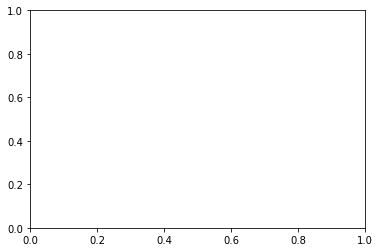

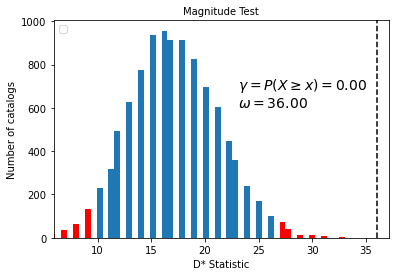

<AxesSubplot:title={'center':'Magnitude Test'}, xlabel='D* Statistic', ylabel='Number of catalogs'>

In [260]:
mag_test_faults = catalog_evaluations.number_test(histInv_faults, italy_cat_2012)
csep_plots.plot_magnitude_test(mag_test_faults)

Processed 1 catalogs in 0.0012516975402832031 seconds
Processed 2 catalogs in 0.00434565544128418 seconds
Processed 3 catalogs in 0.00724029541015625 seconds
Processed 4 catalogs in 0.010011911392211914 seconds
Processed 5 catalogs in 0.01299595832824707 seconds
Processed 6 catalogs in 0.01605391502380371 seconds
Processed 7 catalogs in 0.019004344940185547 seconds
Processed 8 catalogs in 0.02189779281616211 seconds
Processed 9 catalogs in 0.02526259422302246 seconds
Processed 10 catalogs in 0.028612852096557617 seconds
Processed 20 catalogs in 0.04561758041381836 seconds
Processed 30 catalogs in 0.06739139556884766 seconds
Processed 40 catalogs in 0.08810186386108398 seconds
Processed 50 catalogs in 0.10622286796569824 seconds
Processed 60 catalogs in 0.13195562362670898 seconds
Processed 70 catalogs in 0.14780926704406738 seconds
Processed 80 catalogs in 0.1641542911529541 seconds
Processed 90 catalogs in 0.17995905876159668 seconds
Processed 100 catalogs in 0.2007436752319336 second

<GeoAxesSubplot:>

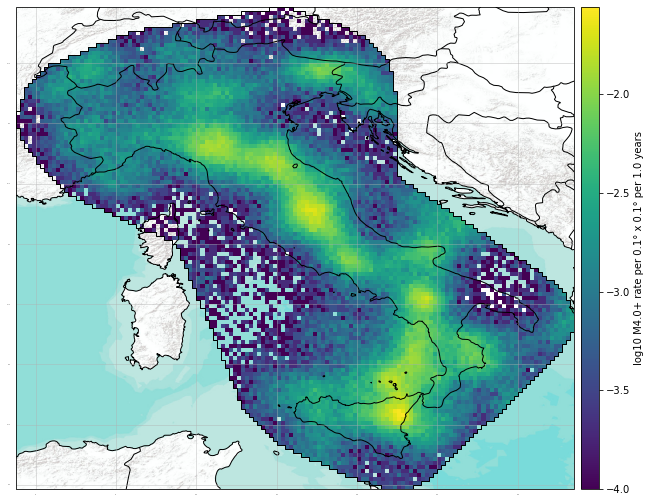

In [276]:
histInv_faults.plot()

In [298]:
cat_copy = copy.deepcopy(italy_cat_1121)
## Update time
start_epoch1 = csep.utils.time_utils.strptime_to_utc_epoch('2013-01-01 00:00:00.0')
end_epoch2 = csep.utils.time_utils.strptime_to_utc_epoch('2014-01-01 00:00:00.0')
## filter catalog
filters = [f'origin_time >= {start_epoch1}', f'origin_time < {end_epoch2}']
test_cat = cat_copy.filter(filters)
cat_copy = cat_copy.filter_spatial(forecast.region)
cat_copy.filter('magnitude >= 4')


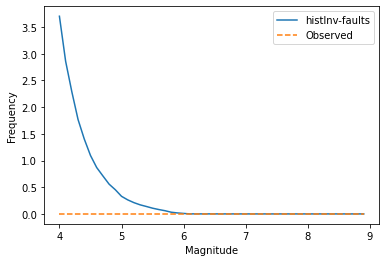

In [296]:
magnitude_comps([histInv_faults], ["histInv-faults"], cat_copy, "histInv_faults_2014.pdf")

Processed 1 catalogs in 4.839897155761719e-05 seconds
Processed 2 catalogs in 0.0010638236999511719 seconds
Processed 3 catalogs in 0.0015823841094970703 seconds
Processed 4 catalogs in 0.0020122528076171875 seconds
Processed 5 catalogs in 0.002399444580078125 seconds
Processed 6 catalogs in 0.002779722213745117 seconds
Processed 7 catalogs in 0.003165006637573242 seconds
Processed 8 catalogs in 0.003567218780517578 seconds
Processed 9 catalogs in 0.0040283203125 seconds
Processed 10 catalogs in 0.004433870315551758 seconds
Processed 20 catalogs in 0.004899024963378906 seconds
Processed 30 catalogs in 0.005373954772949219 seconds
Processed 40 catalogs in 0.005896091461181641 seconds
Processed 50 catalogs in 0.0063800811767578125 seconds
Processed 60 catalogs in 0.006857156753540039 seconds
Processed 70 catalogs in 0.007325172424316406 seconds
Processed 80 catalogs in 0.007838726043701172 seconds
Processed 90 catalogs in 0.008306741714477539 seconds
Processed 100 catalogs in 0.008883714

No handles with labels found to put in legend.


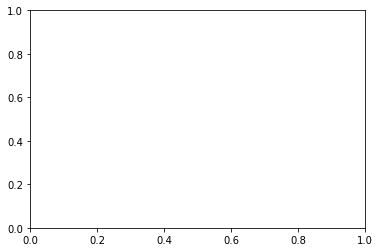

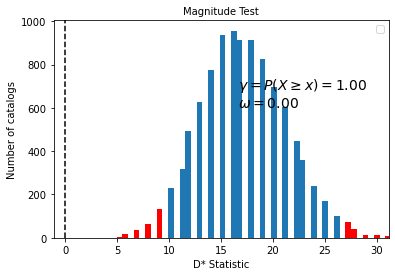

<AxesSubplot:title={'center':'Magnitude Test'}, xlabel='D* Statistic', ylabel='Number of catalogs'>

In [297]:
mag_test_faults = catalog_evaluations.number_test(histInv_faults, cat_copy)
csep_plots.plot_magnitude_test(mag_test_faults)